In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [49]:
df = pd.read_csv("parallelRandomizedCPGCResults_PSC.csv")
seq_df = pd.read_csv("sequentialRandomizedCPGCResults_PSC.csv")
list(df.columns)

['graphNodes',
 'density',
 'expNo',
 'delta',
 'compressionRatio',
 'executionTime',
 'readTime',
 'writeTime',
 'mergeTime',
 'cores']

In [3]:
nodes = list(df['graphNodes'].unique())
density = list(df['density'].unique())
expNo = list(df['expNo'].unique())
cores = list(df['cores'].unique())
delta = list(df['delta'].unique())
nodes.remove(32768)
nodes

[2048, 4096, 8192, 16384]

In [4]:
density

[80, 85, 90, 95, 98]

In [5]:
cores

[8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128]

In [6]:
delta

[0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [7]:
color = ['gainsboro', 'silver', 'darkgrey', 'grey', 'dimgrey']

In [8]:
node_map = {
    2048: r'$2^{11}$',
    4096: r'$2^{12}$',
    8192: r'$2^{13}$',
    16384: r'$2^{14}$'
}
node_map
nodes1 = [node_map[n] if n in node_map else n for n in nodes]
nodes1

['$2^{11}$', '$2^{12}$', '$2^{13}$', '$2^{14}$']

In [9]:
def remove_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    filtered_data = [x for x in data if (x >= lower_bound and x <= upper_bound)]
    return filtered_data # round(np.mean(filtered_data), 2)

In [58]:
avgCompRatio = {}
avgExeTime = {}
avgWriteTime = {} 
avgReadTime =  {}
avgMergeTime =  {}
seq_avgExeTime = {}

for n in nodes:
    for d in density:
        for e in expNo:
            for de in delta:
                seq_avgExeTime[(n,d,e,de)] = remove_outliers(seq_df[(seq_df['graphNodes'] == n) & (seq_df['density'] == d) & (seq_df['expNo'] == e) & 
                                  (seq_df['delta'] == de)].executionTime.tolist())
                for c in cores:
                    avgCompRatio[(n,d,e,c,de)] = remove_outliers(df[(df['graphNodes'] == n) & (df['density'] == d) & (df['expNo'] == e) & 
                                      (df['cores'] == c)  & (df['delta'] == de)].compressionRatio.tolist())
                    avgExeTime[(n,d,e,c,de)] = remove_outliers(df[(df['graphNodes'] == n) & (df['density'] == d) & (df['expNo'] == e) & 
                                      (df['cores'] == c)  & (df['delta'] == de)].executionTime.tolist())
                    avgWriteTime[(n,d,e,c,de)] = remove_outliers(df[(df['graphNodes'] == n) & (df['density'] == d) & (df['expNo'] == e) & 
                                      (df['cores'] == c)  & (df['delta'] == de)].writeTime.tolist())
                    avgReadTime[(n,d,e,c,de)] = remove_outliers(df[(df['graphNodes'] == n) & (df['density'] == d) & (df['expNo'] == e) & 
                                      (df['cores'] == c)  & (df['delta'] == de)].readTime.tolist())
                    avgMergeTime[(n,d,e,c,de)] = remove_outliers(df[(df['graphNodes'] == n) & (df['density'] == d) & (df['expNo'] == e) & 
                                      (df['cores'] == c)  & (df['delta'] == de)].mergeTime.tolist())

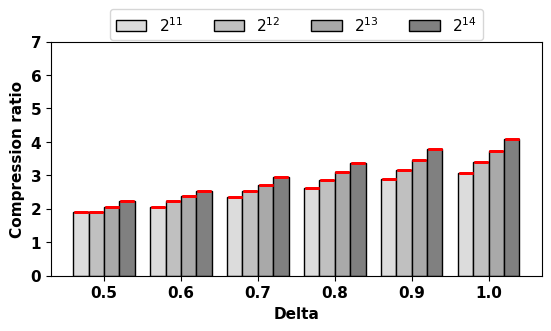

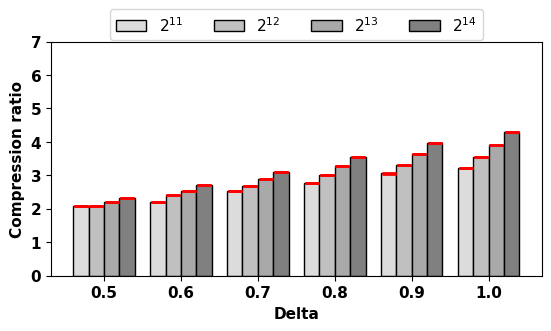

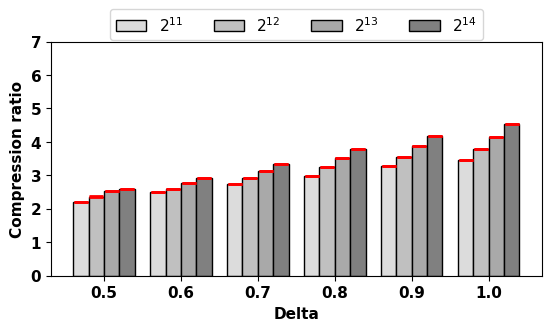

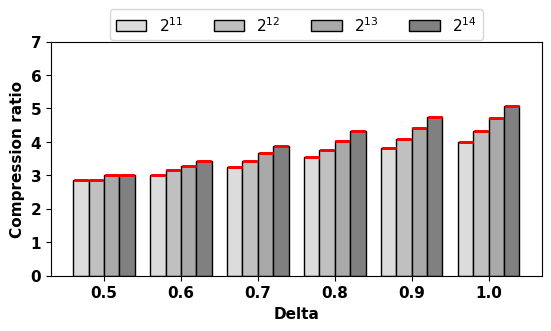

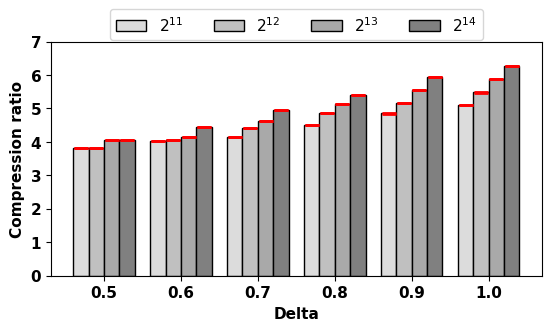

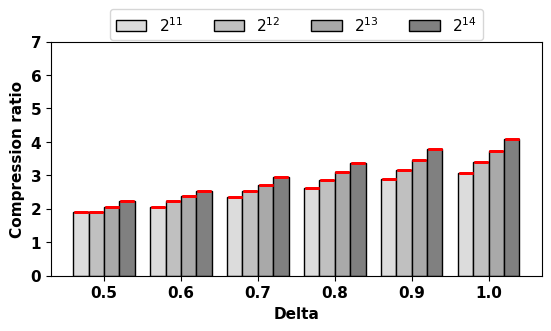

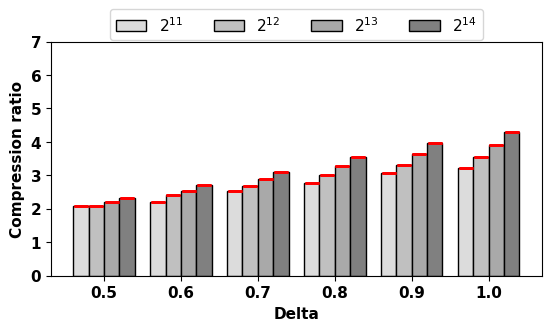

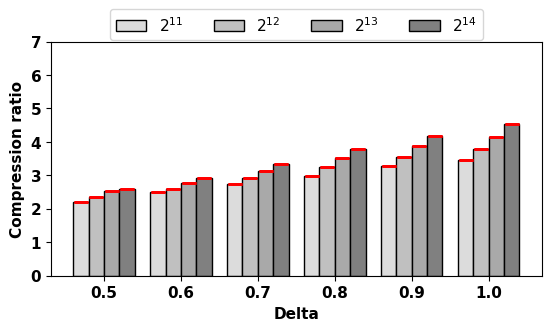

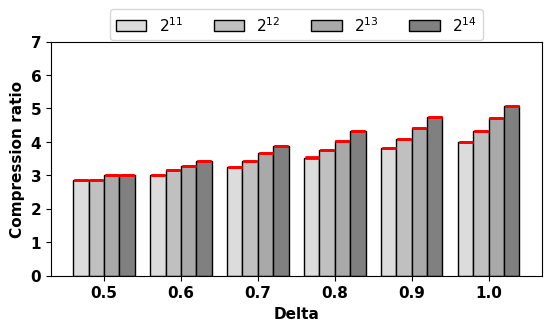

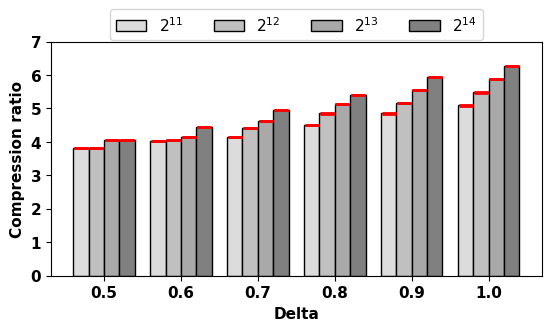

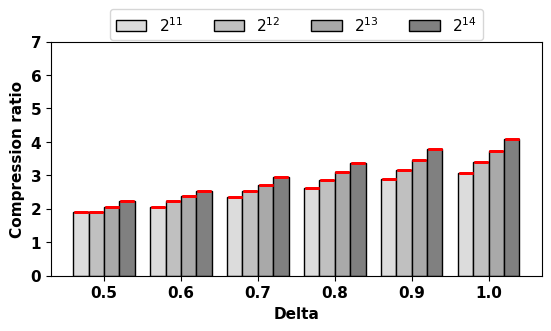

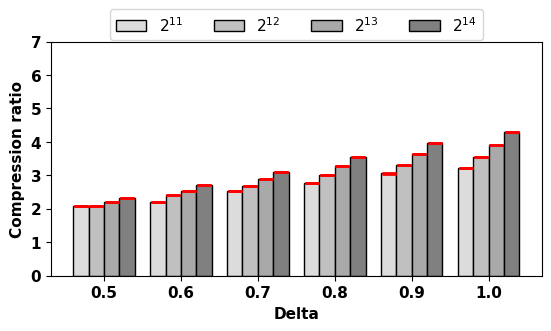

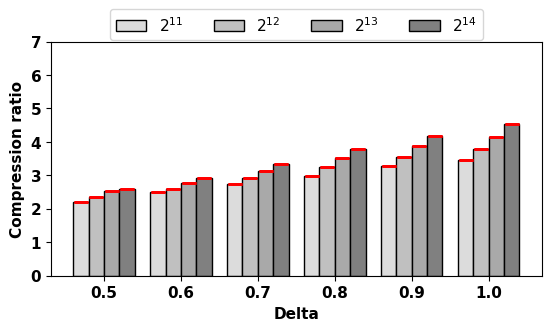

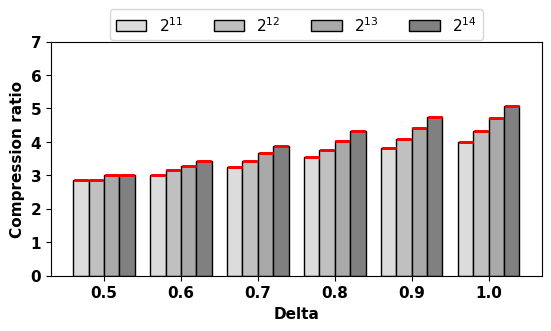

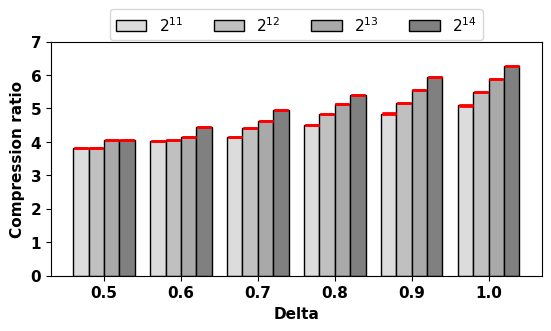

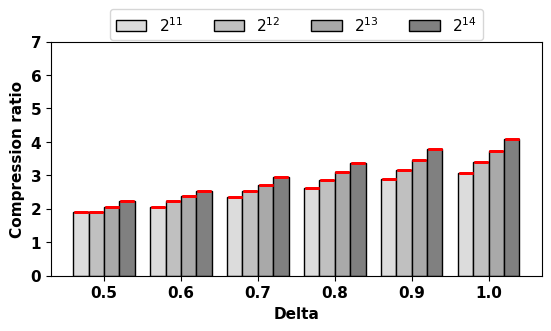

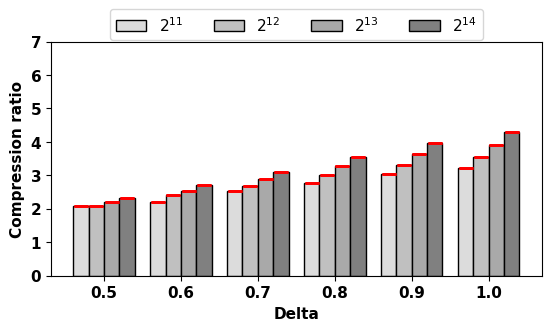

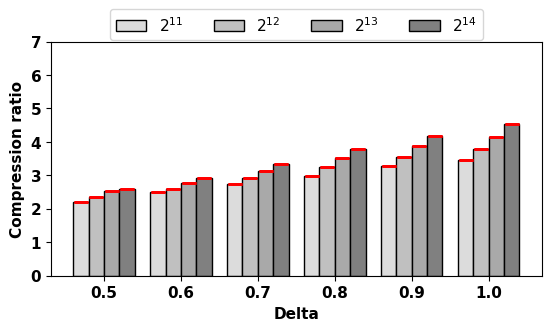

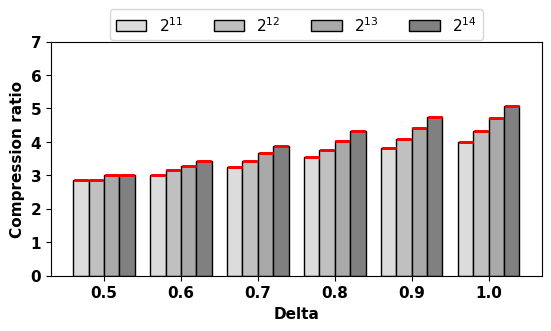

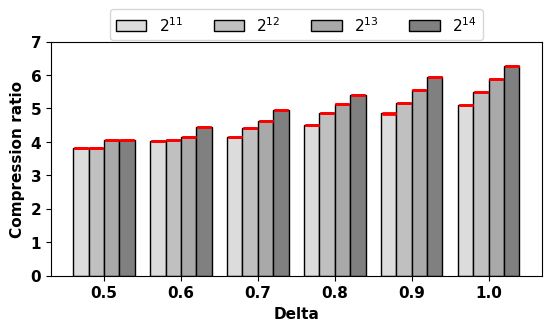

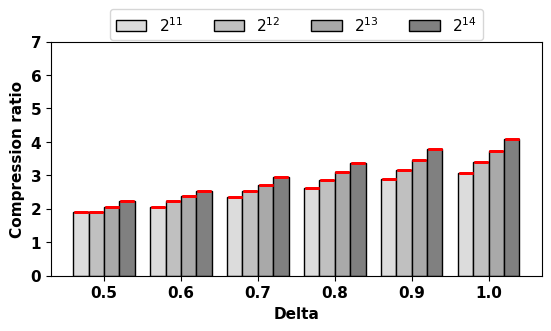

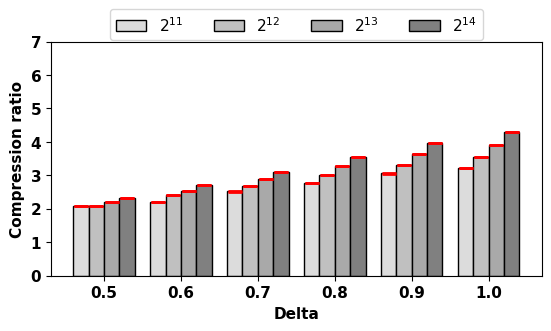

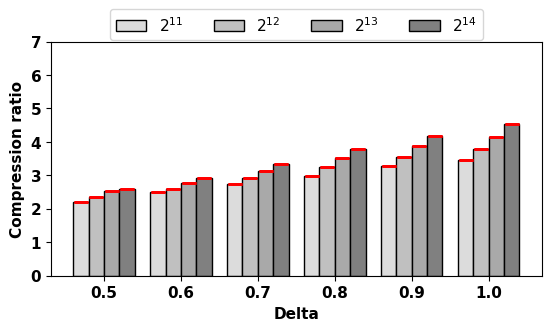

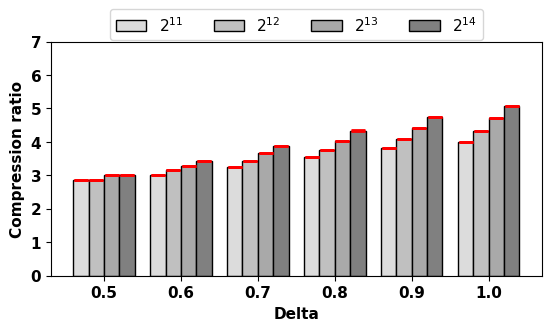

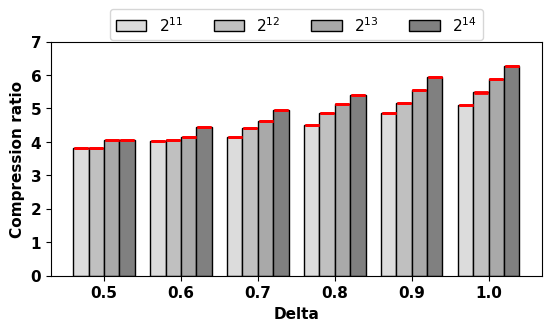

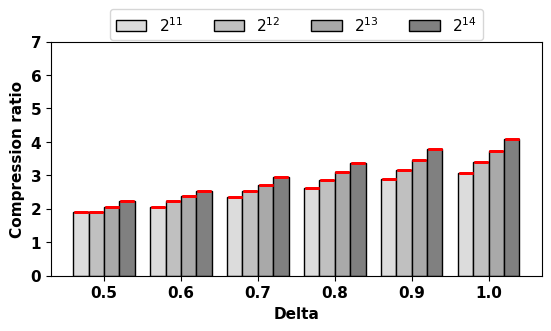

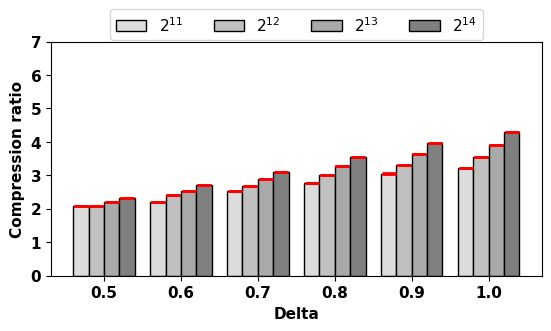

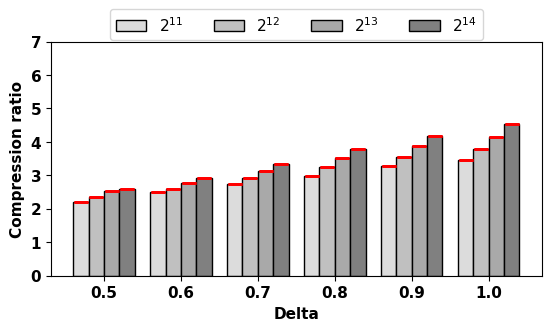

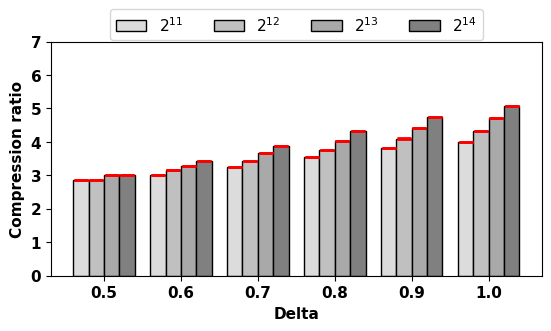

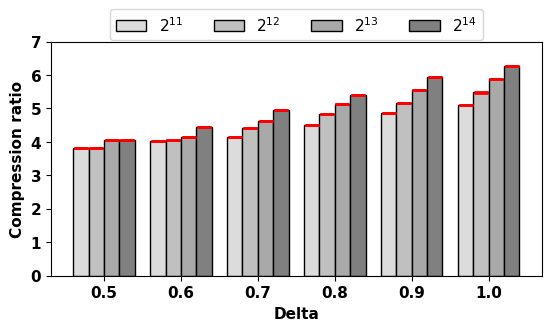

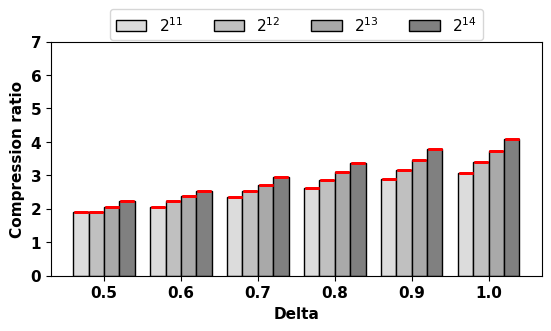

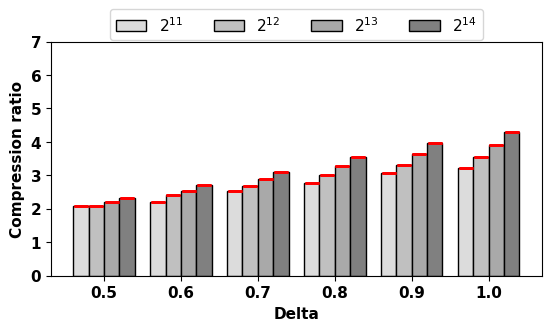

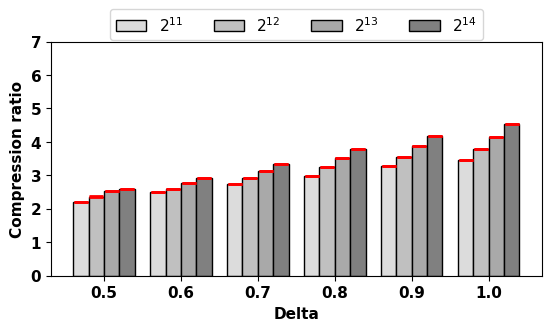

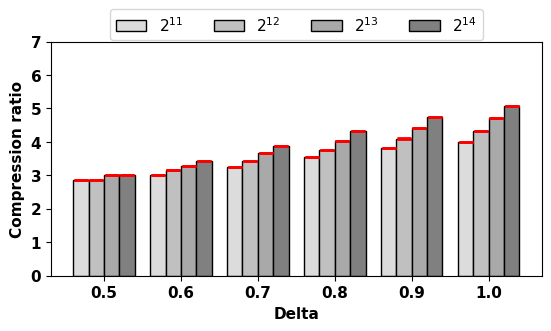

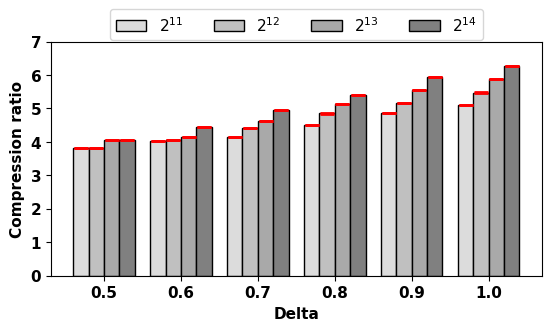

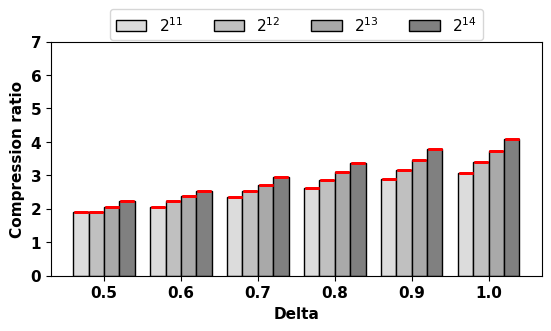

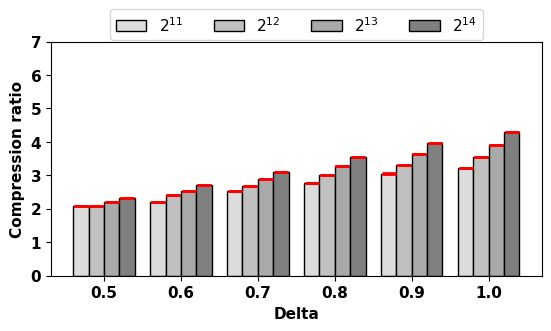

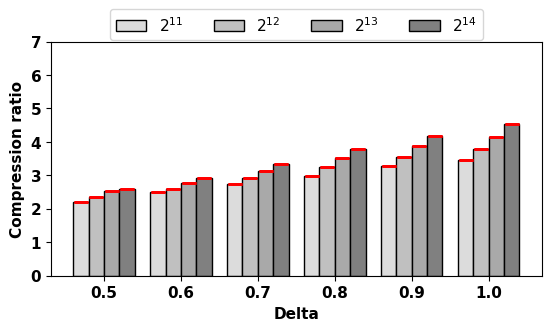

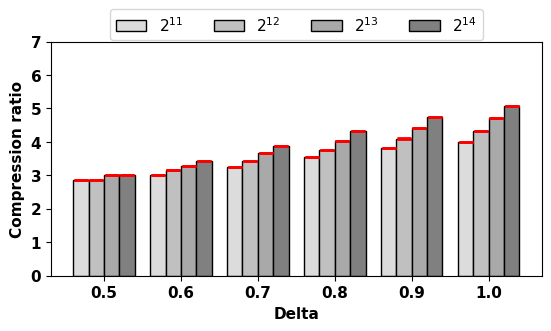

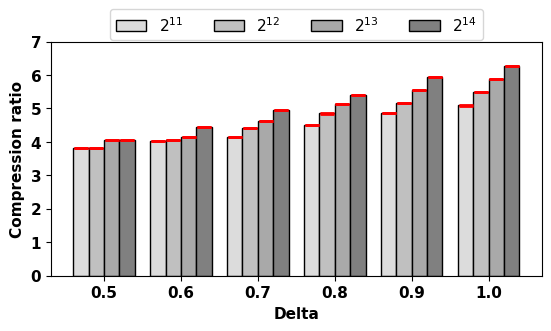

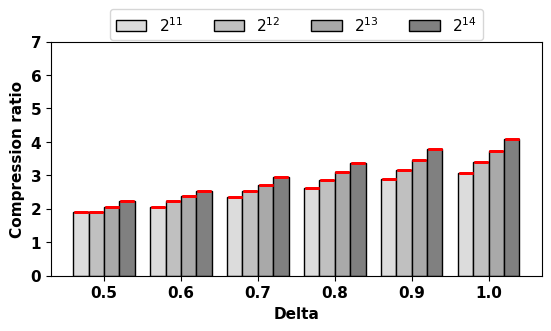

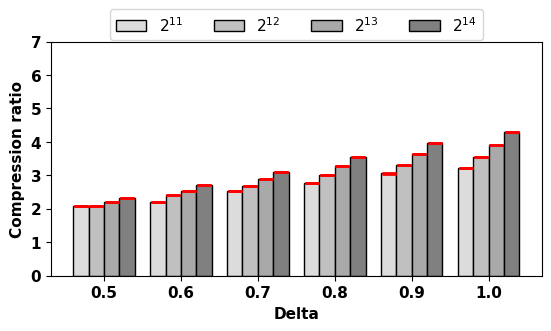

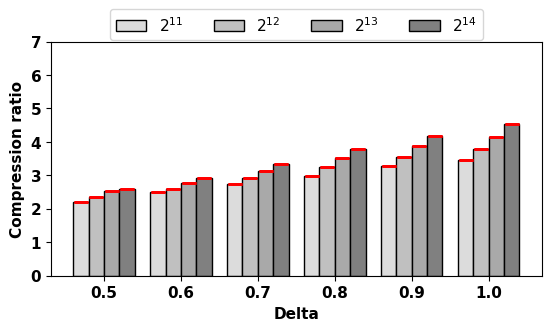

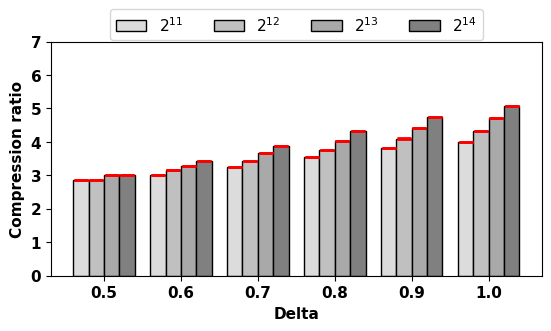

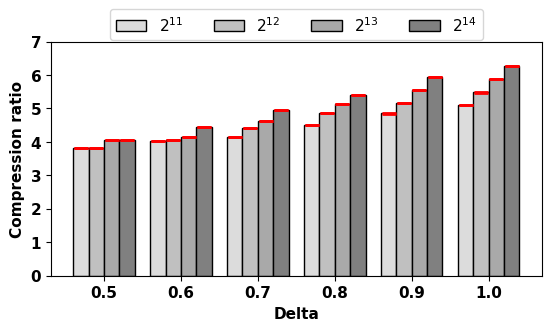

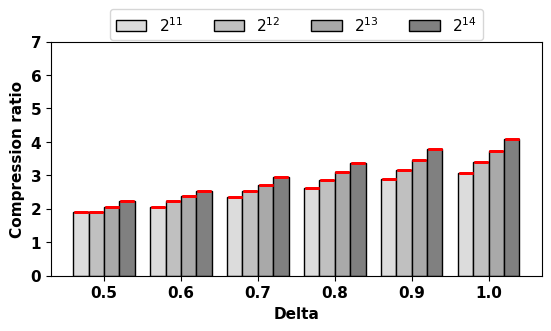

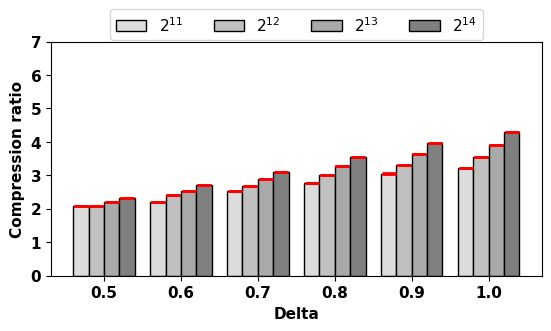

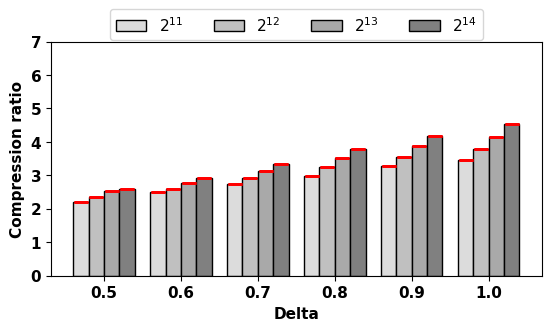

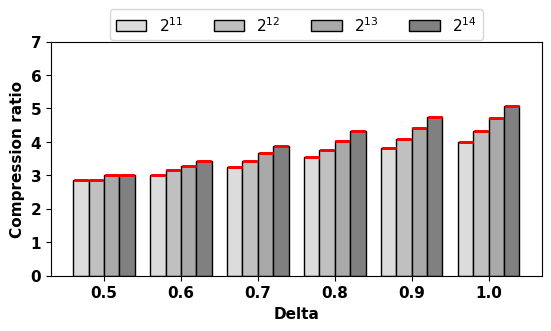

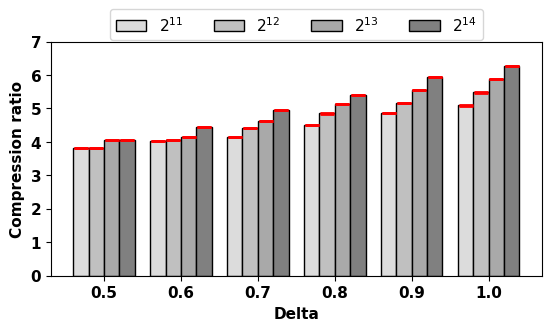

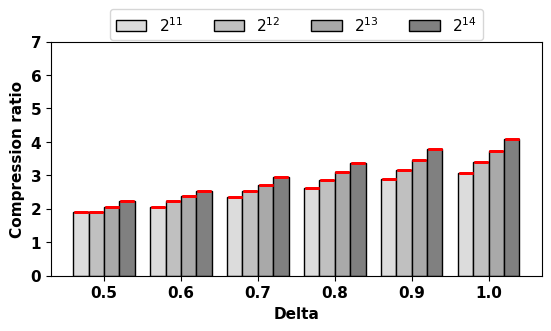

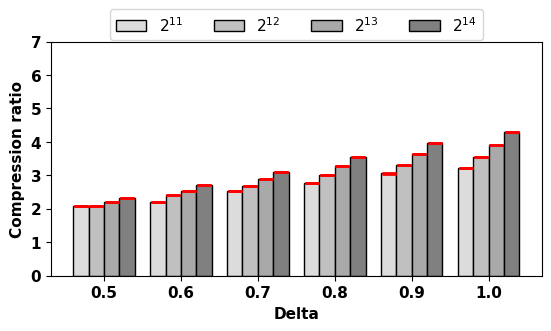

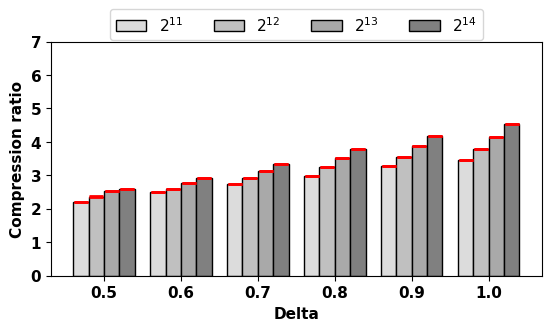

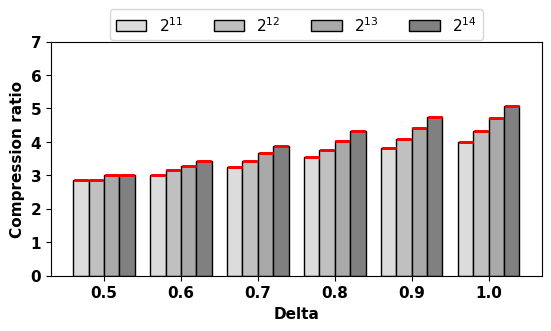

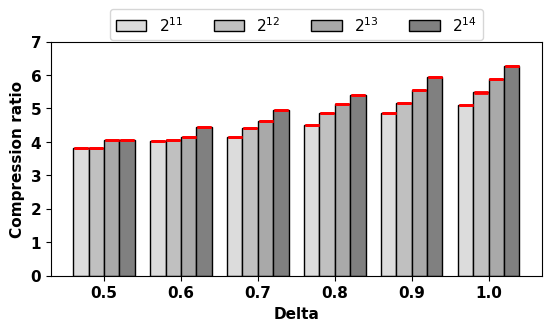

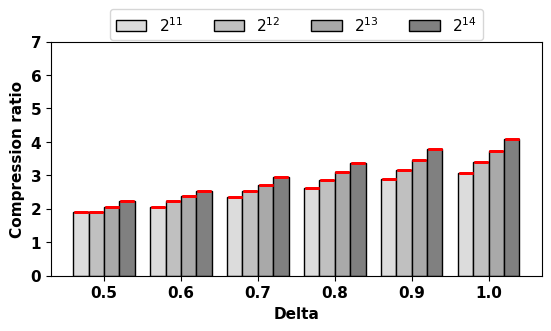

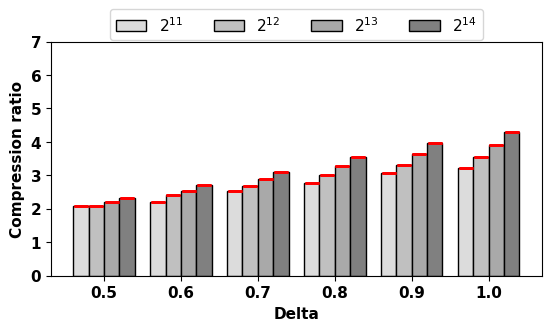

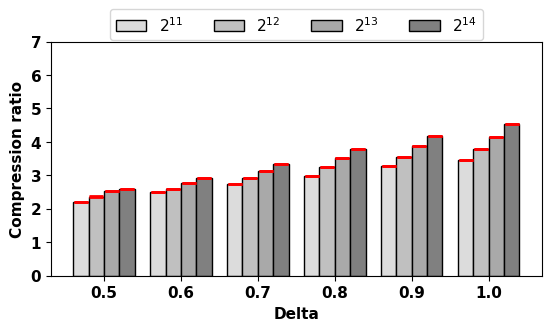

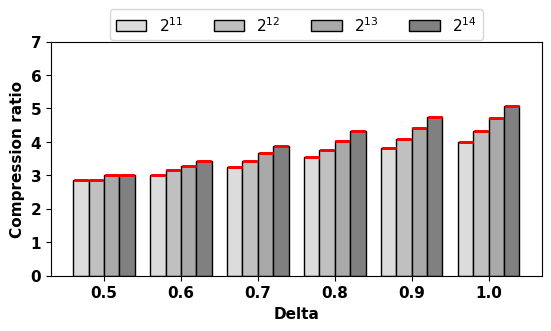

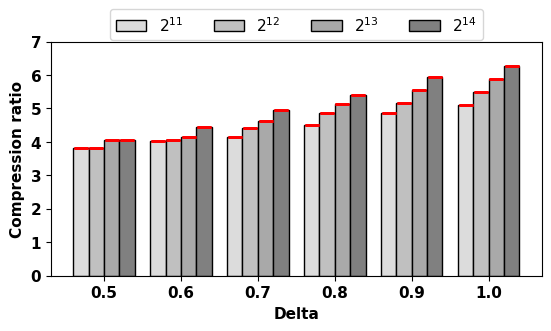

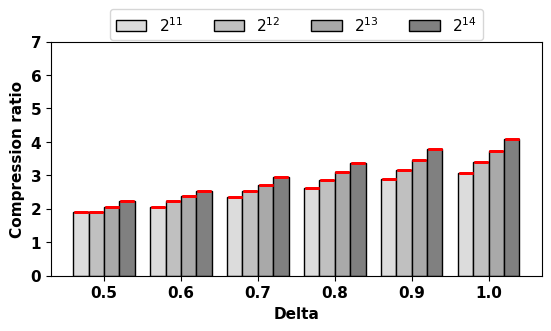

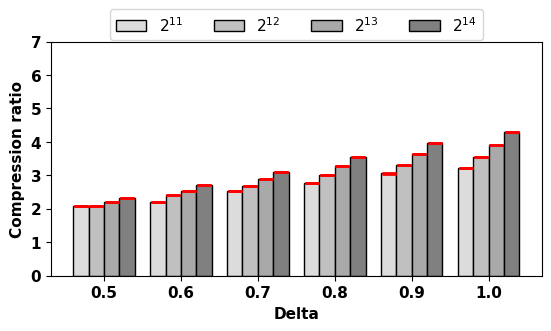

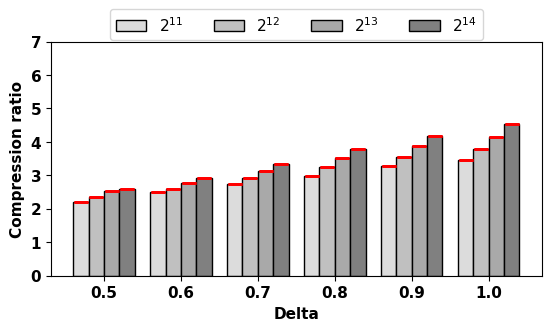

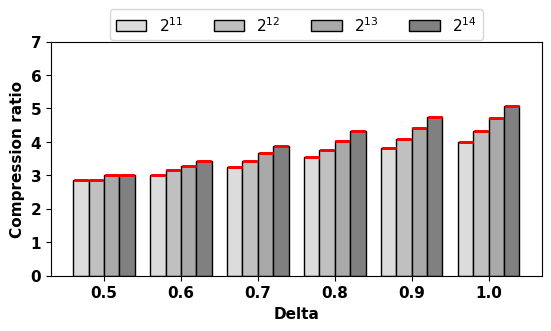

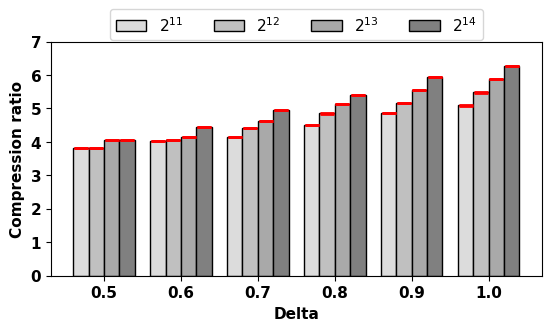

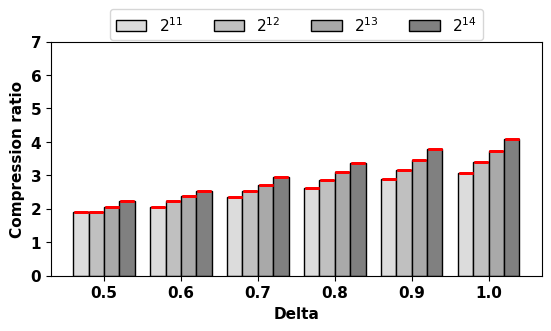

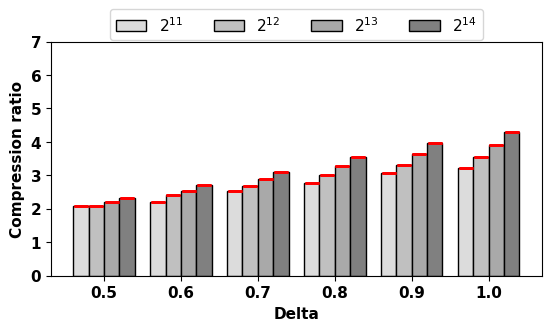

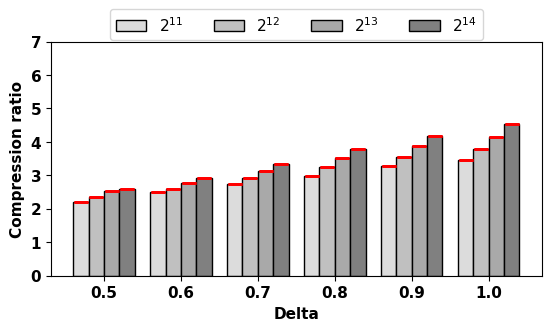

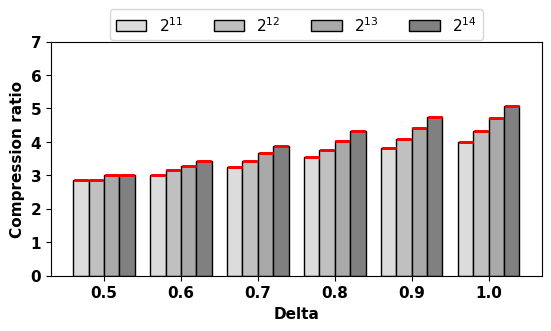

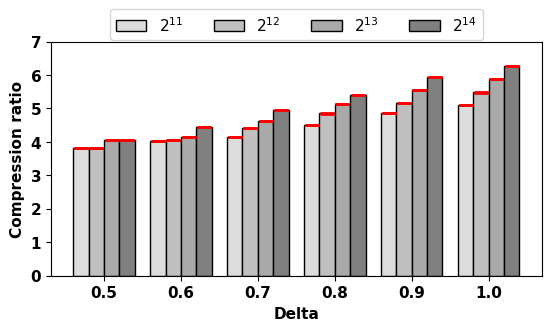

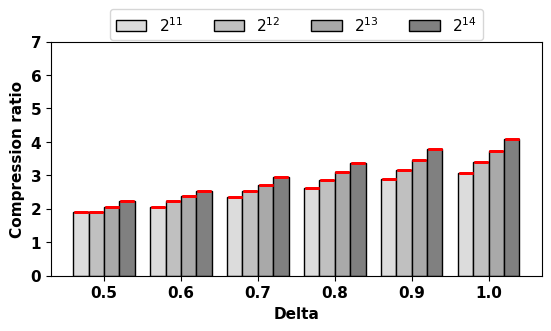

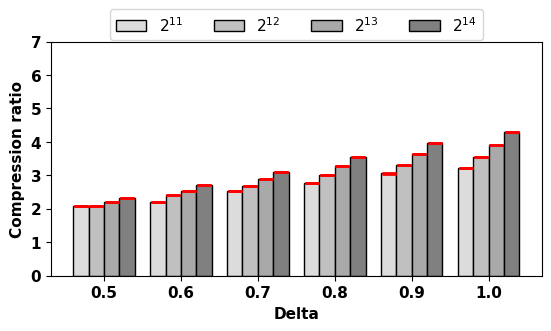

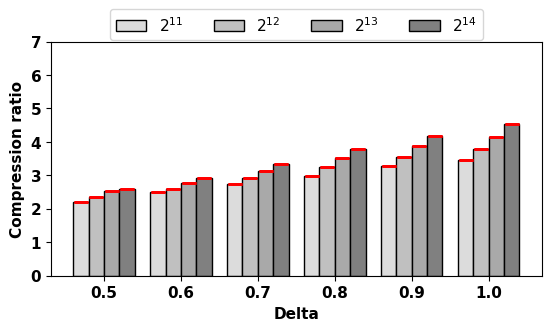

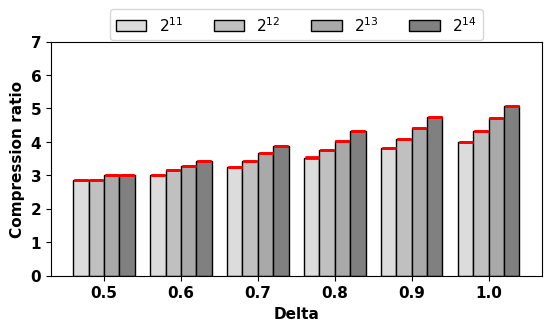

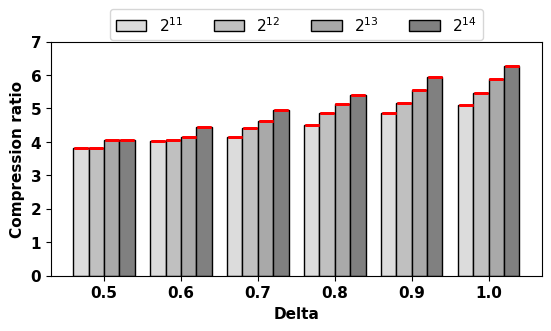

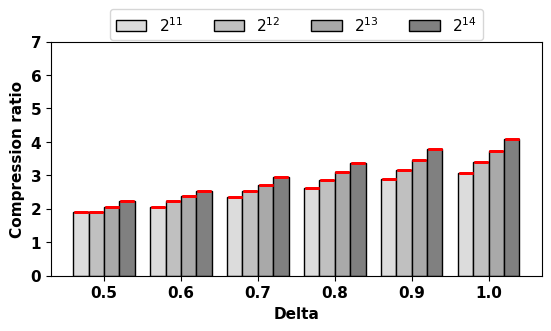

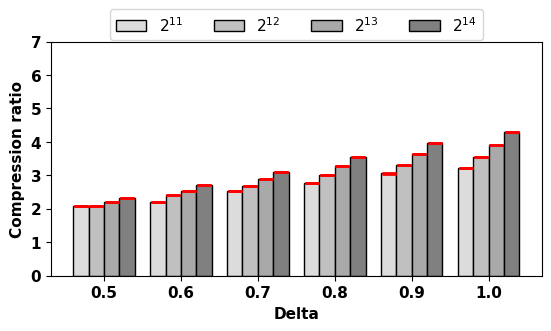

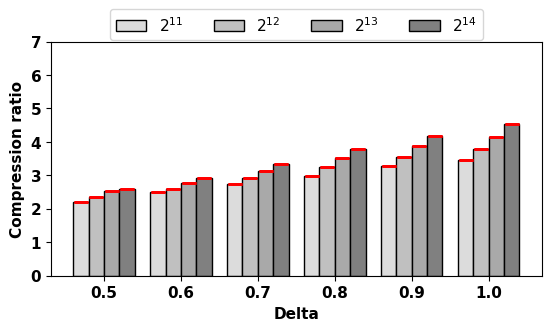

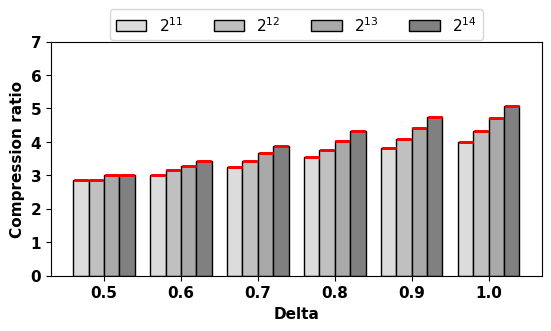

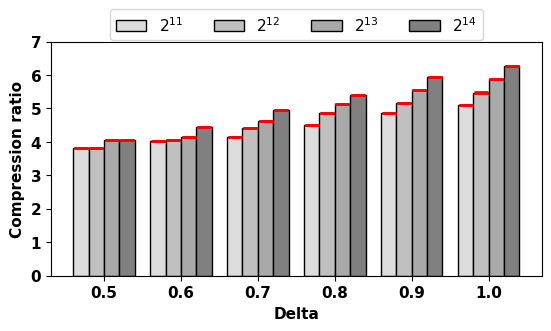

In [36]:
# we want to show that increasing delta increases the compression rate therefore we plot for fixed density and fixed cores
# x axis is delta and y axis is compression ratio for 3 different nodes

for c in cores:
    for d in density:
        e = 1
        plotData = {}
        plotStd = {}
        for n in nodes:
            plotData[n] = []
            plotStd[n] = []
            for de in delta:
                plotData[n].append(np.mean(avgCompRatio[(n,d,e,c,de)]))
                plotStd[n].append(statistics.stdev(avgCompRatio[(n,d,e,c,de)]))

        bar_width = 0.2  # Width of each bar
        x = np.arange(len(delta))  # X-axis values
        f, axes = plt.subplots(constrained_layout=True, figsize=[5.4, 3.2])
        i = 0
        
        for n in nodes:
            power = nodes1[i]
            plt.bar(x + i * bar_width - (0.5 * bar_width), plotData[n], width=bar_width, label= f"{power}", color = color[i], edgecolor = 'k', yerr=plotStd[n], error_kw=dict(elinewidth=5, capsize=5, capthick=2, ecolor = 'red'))
            i = i + 1

        fc = 11
        # Adding labels, title, and legend
        plt.xlabel('Delta', fontsize=11, weight = 'bold')
        plt.ylabel('Compression ratio', fontsize=11, weight = 'bold')
#         plt.title(f'For {d}% density and {c} cores', fontsize=11, weight = 'bold')
        plt.xticks(x + bar_width, delta, fontsize=11, weight = 'bold')
        plt.yticks(fontsize=11, weight = 'bold')
        plt.legend(ncol = 6, fontsize=11, loc = 'upper center', bbox_to_anchor = (0.5, 1.17))
        plt.ylim(0,7)
        plt.savefig(f'plots/compression_ratio_vs_delta_with_density_{d}_for_cores_{c}.pdf', dpi=300)
        plt.show()

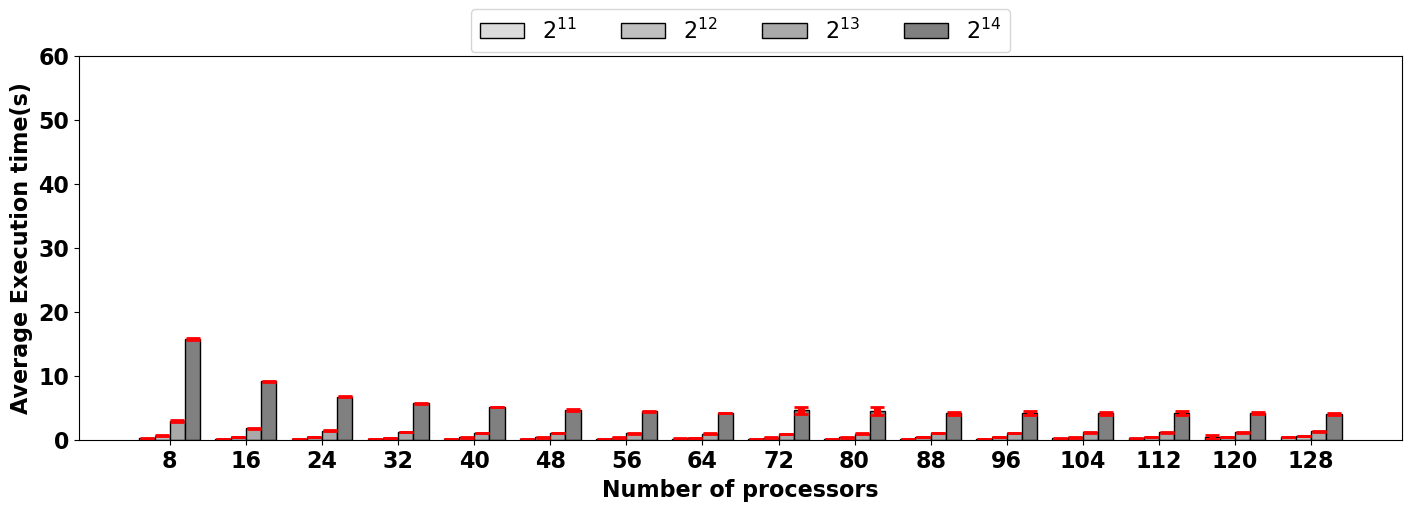

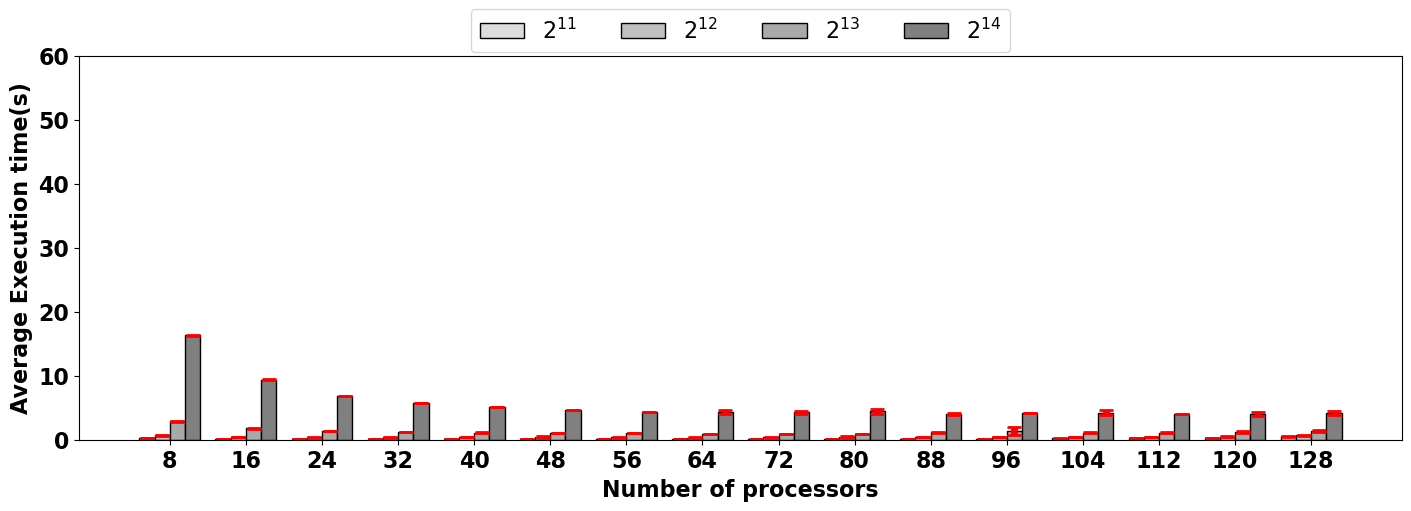

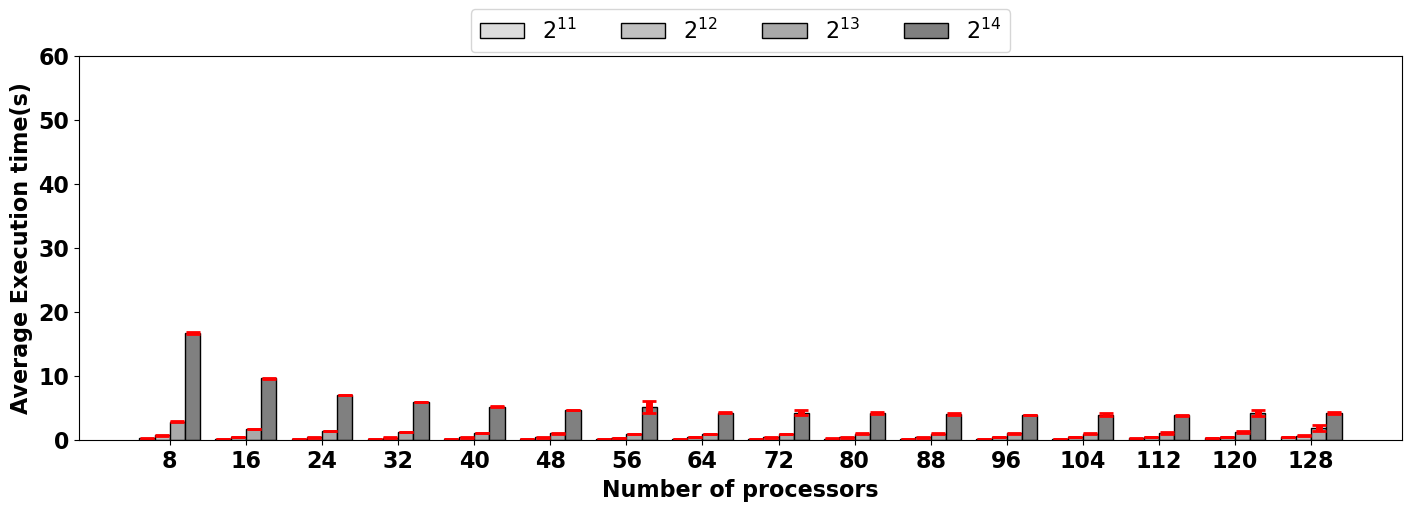

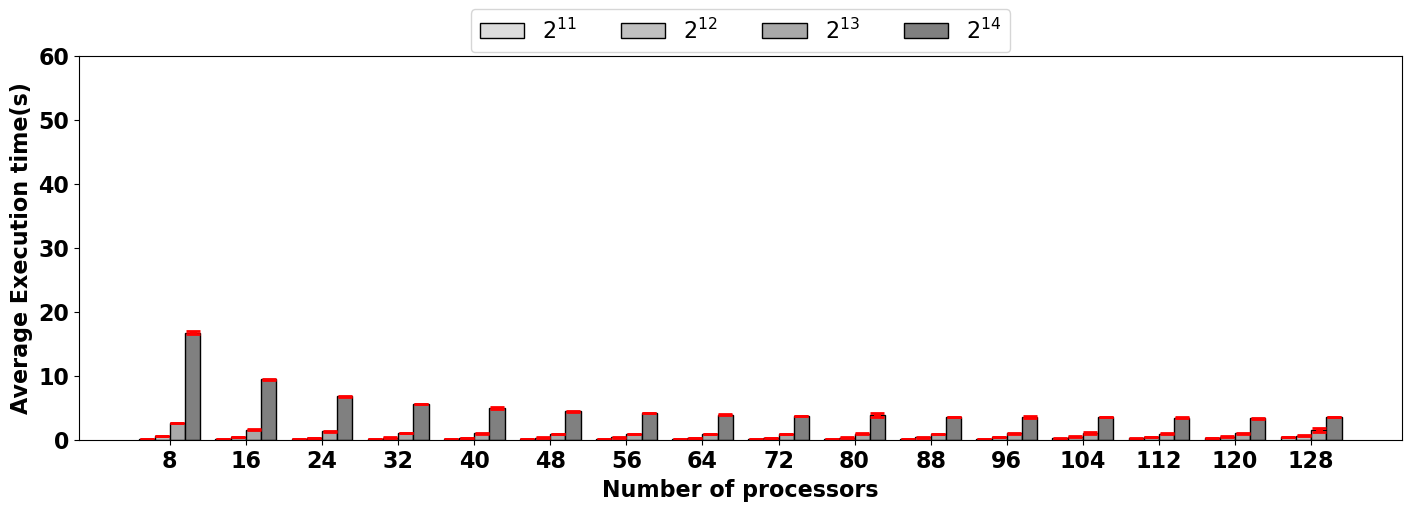

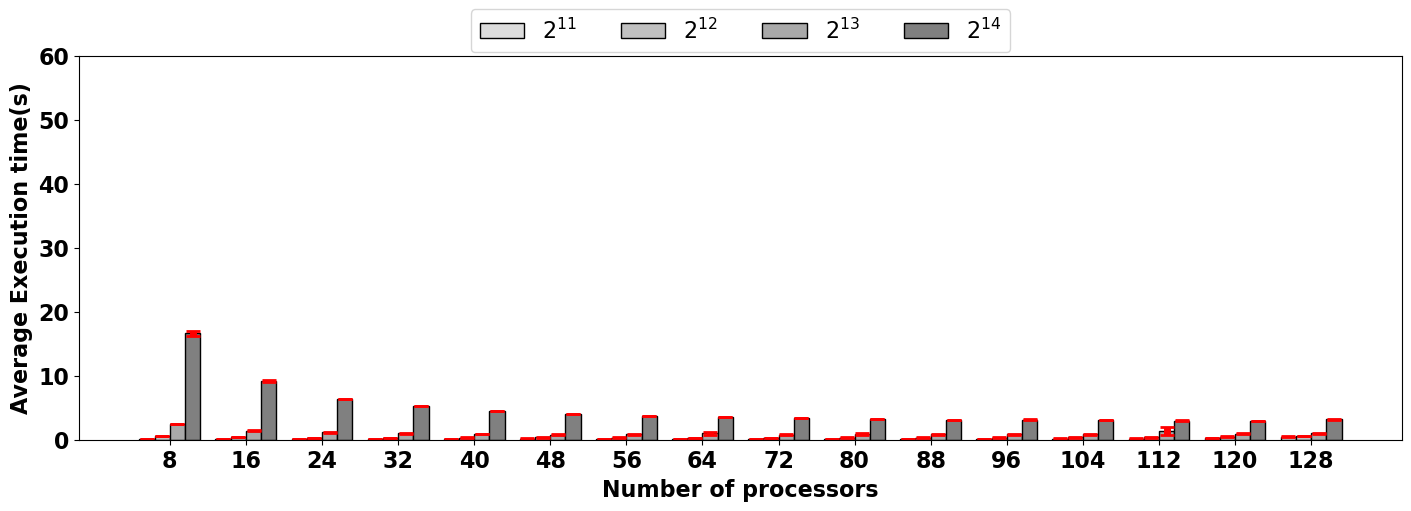

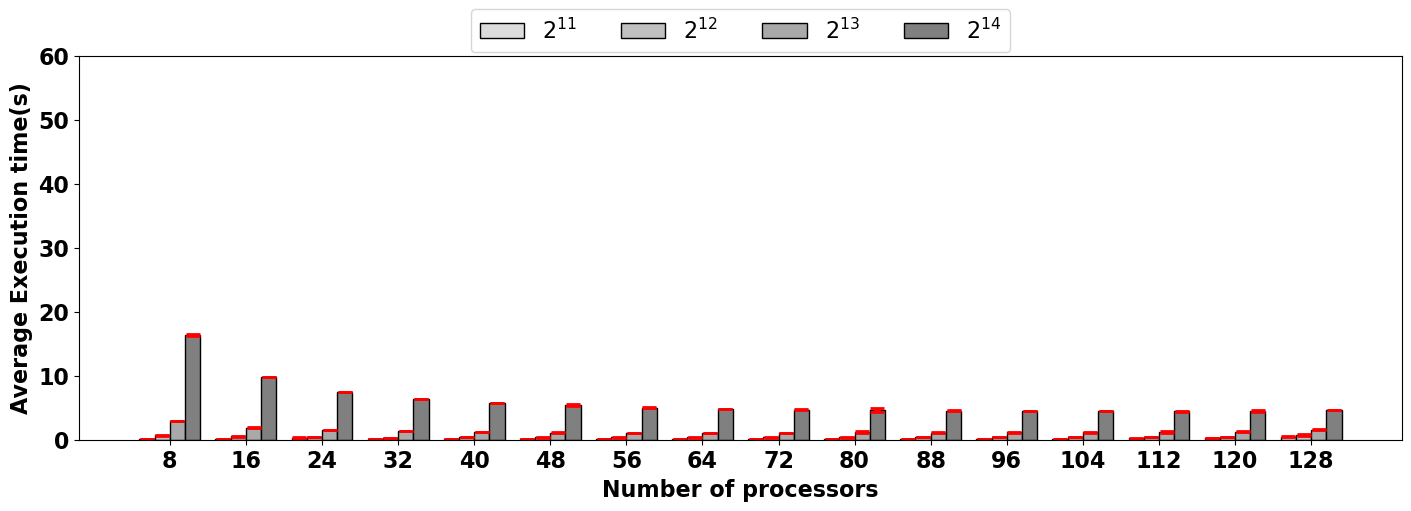

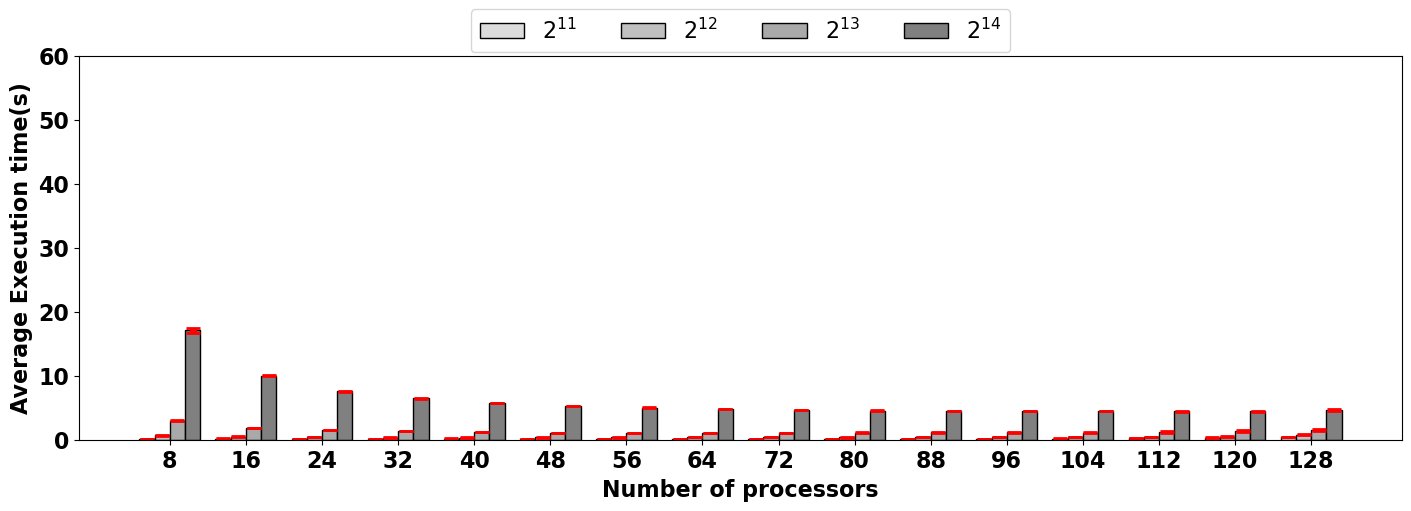

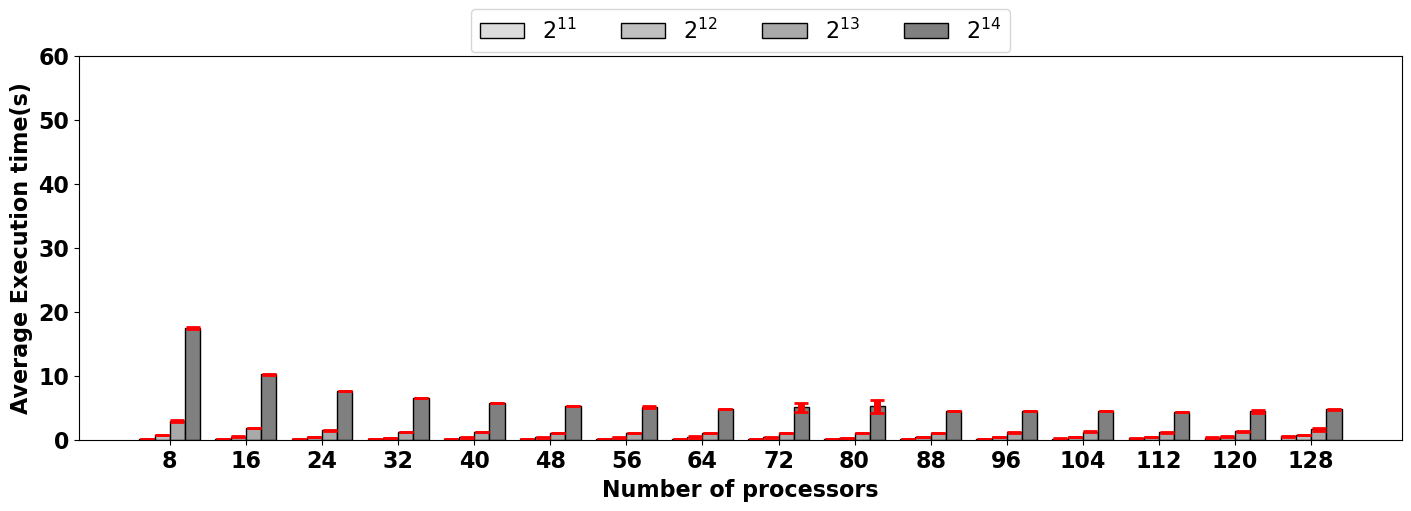

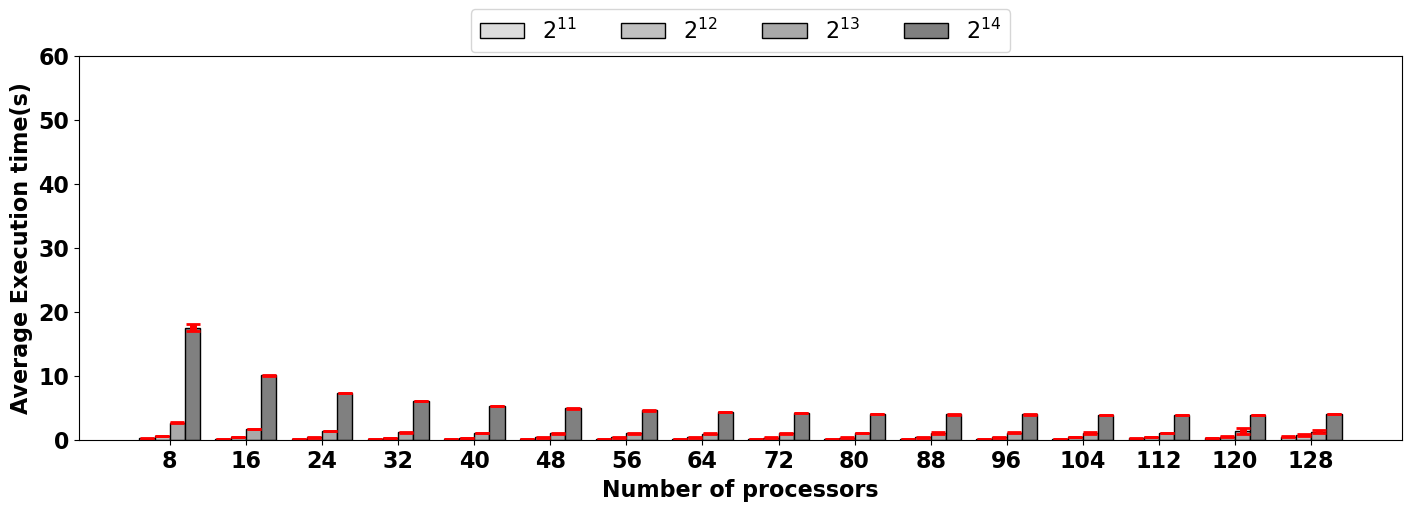

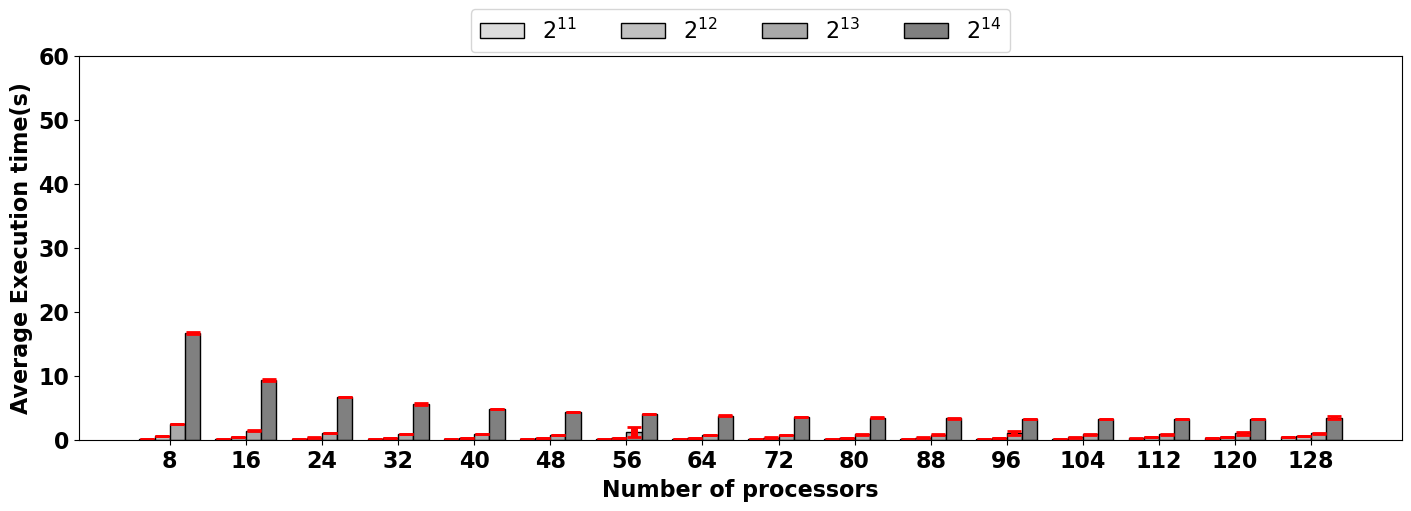

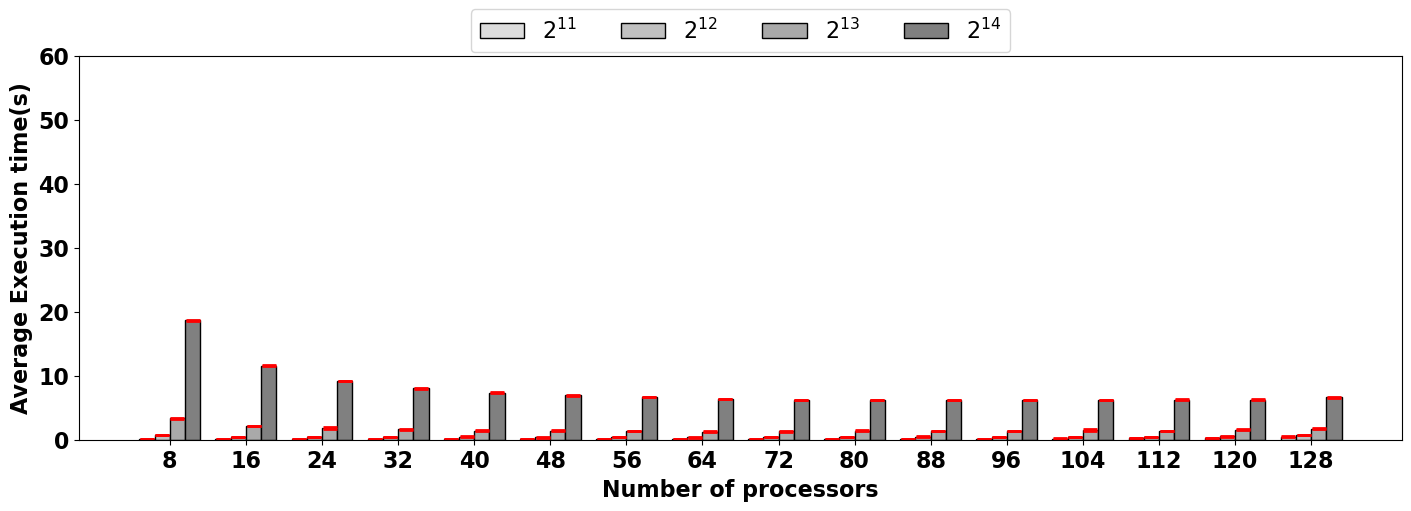

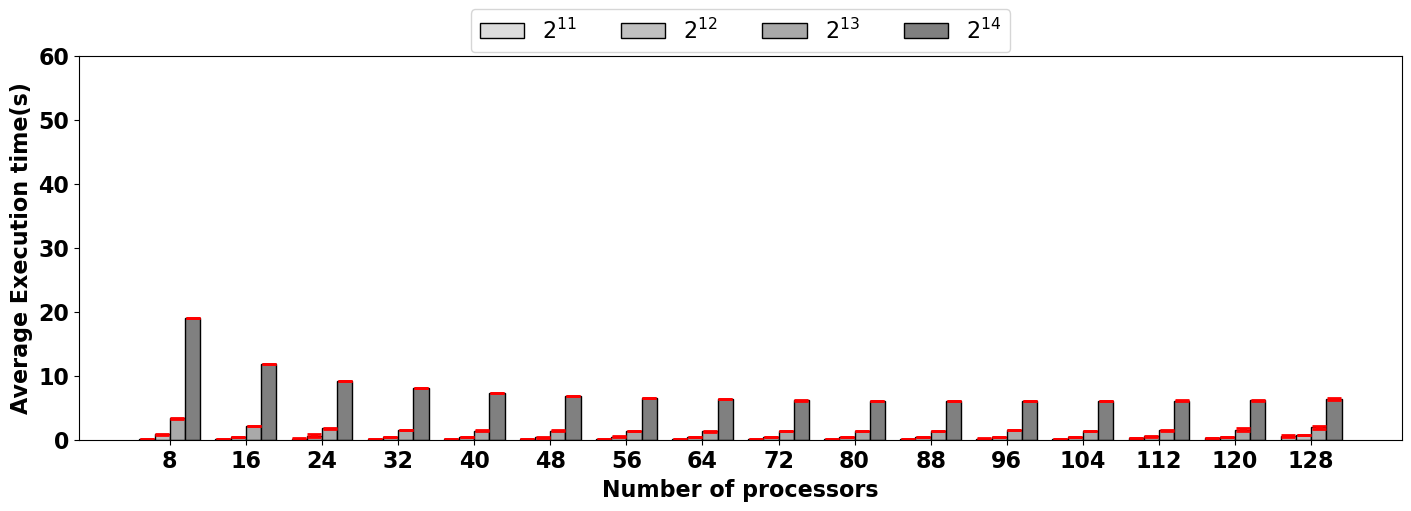

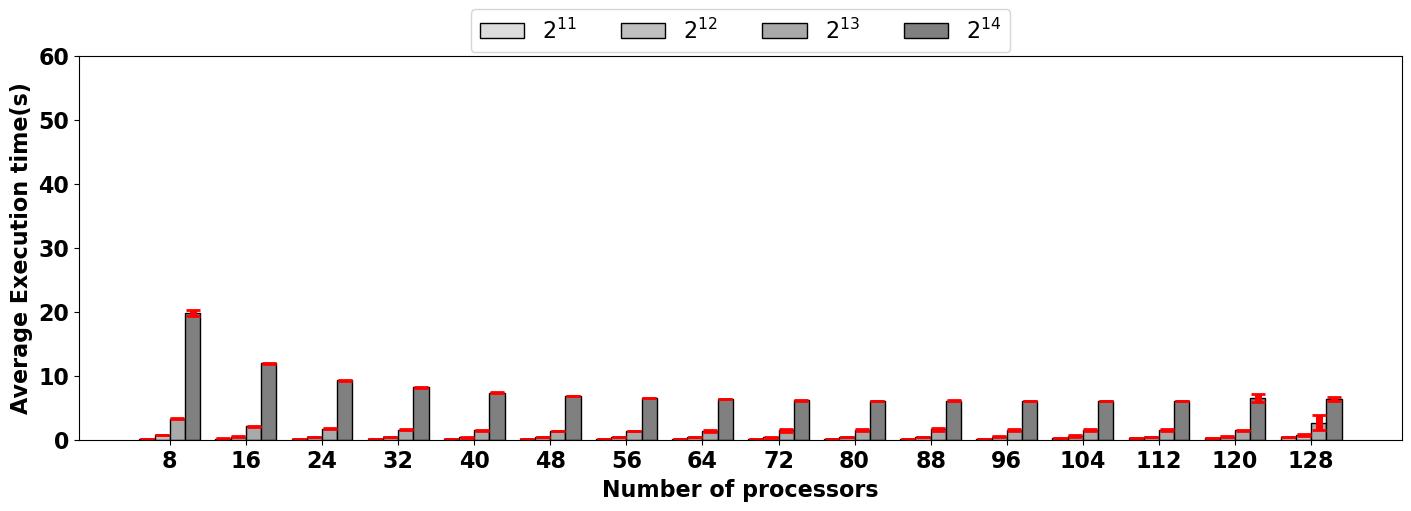

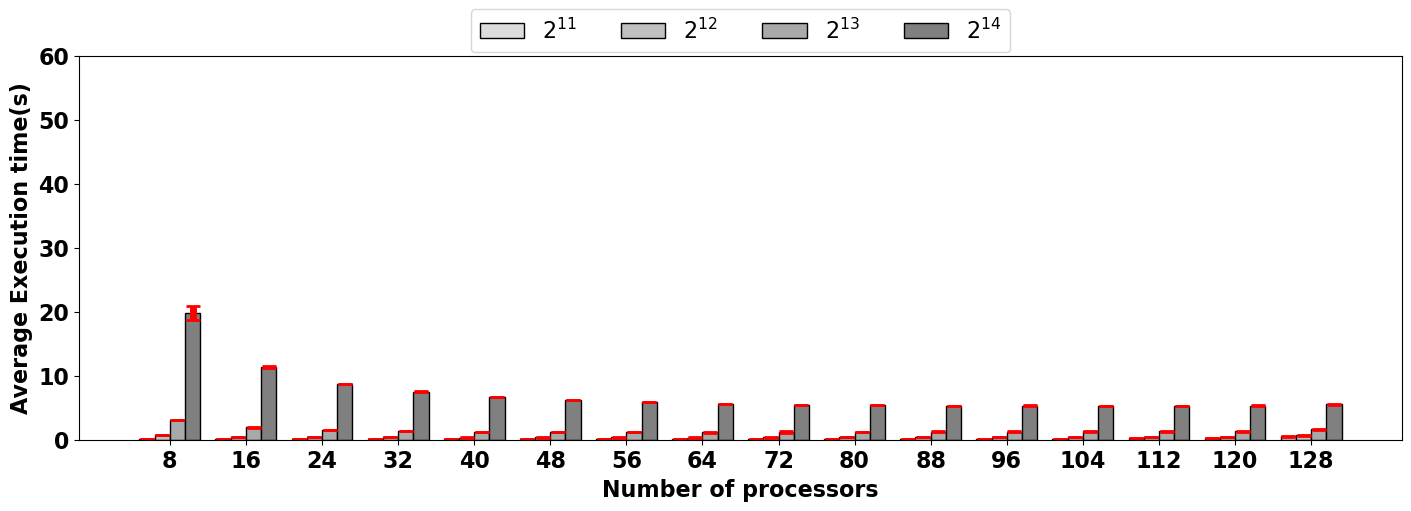

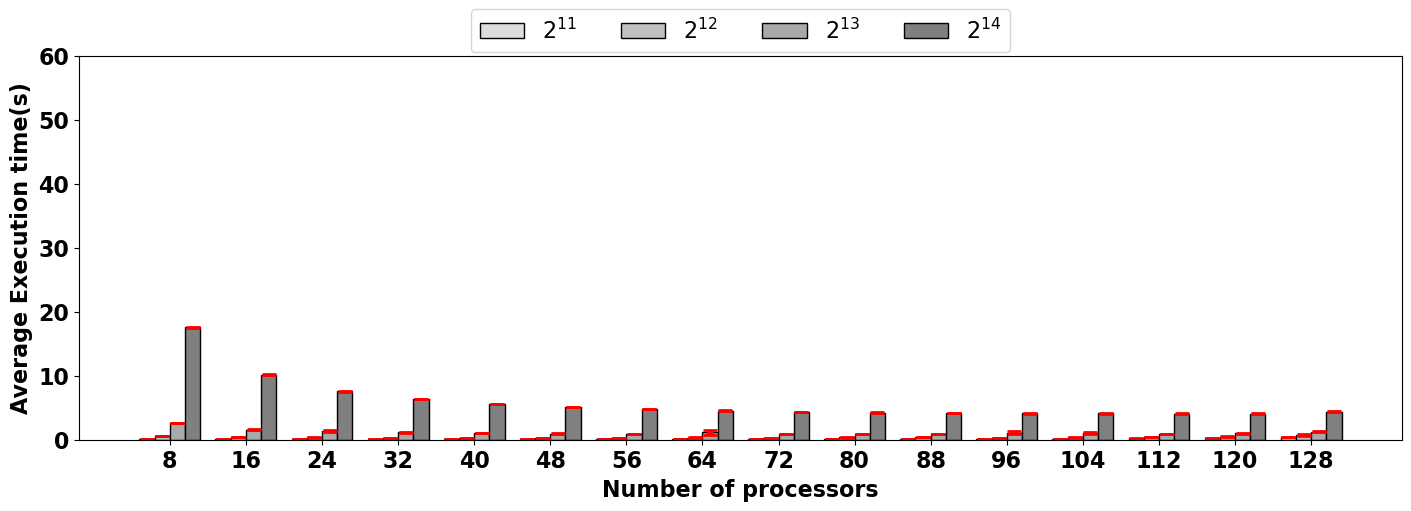

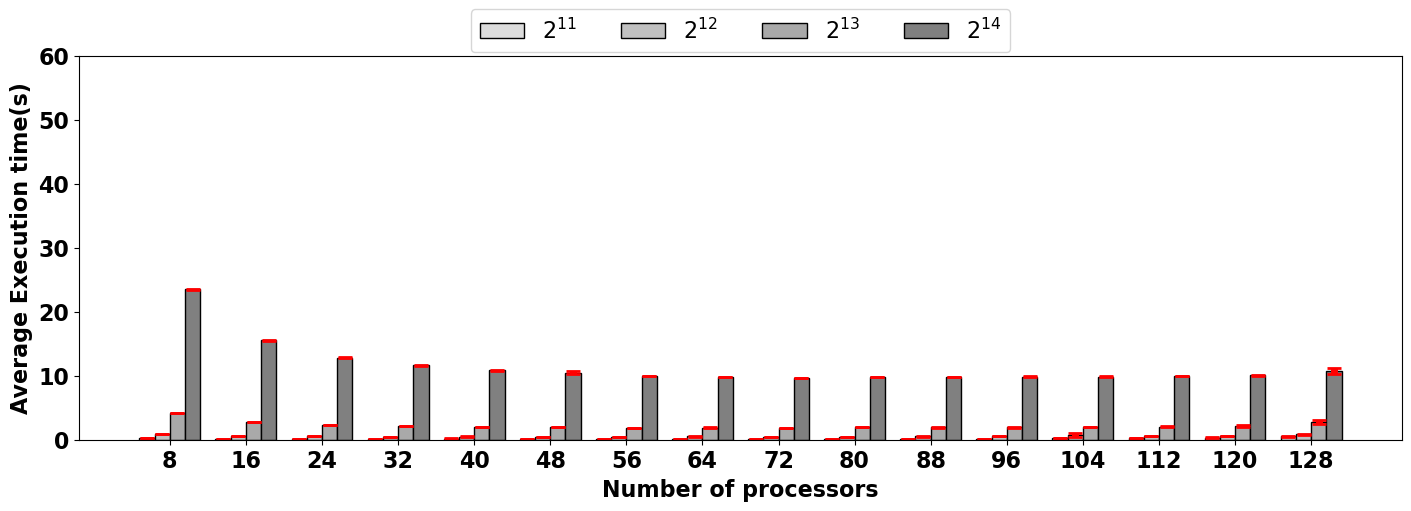

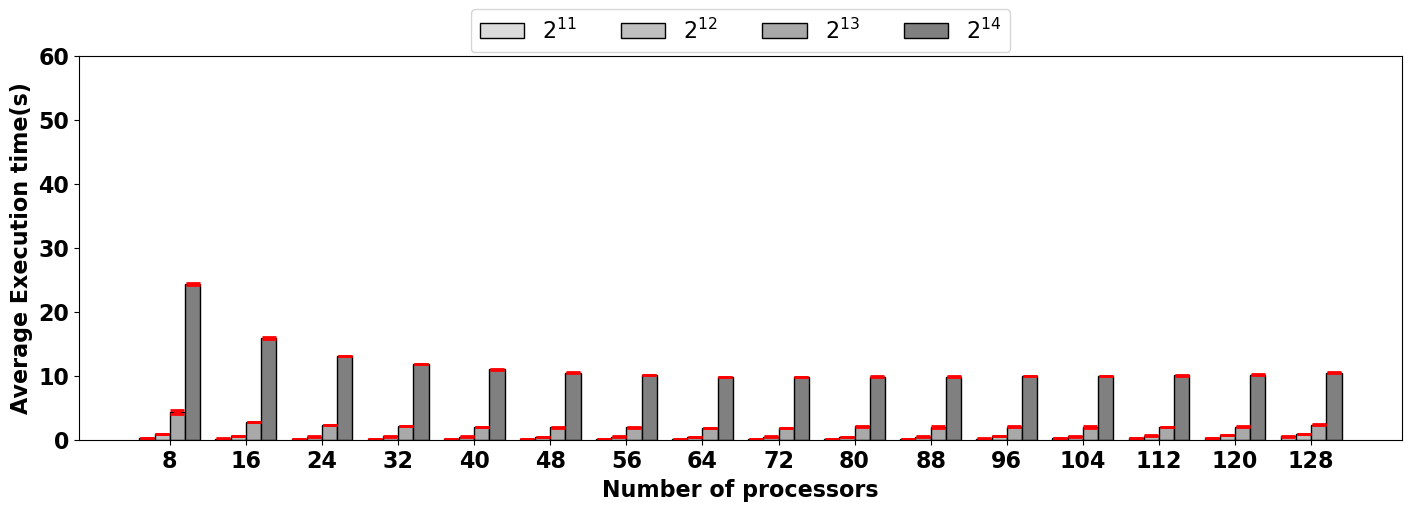

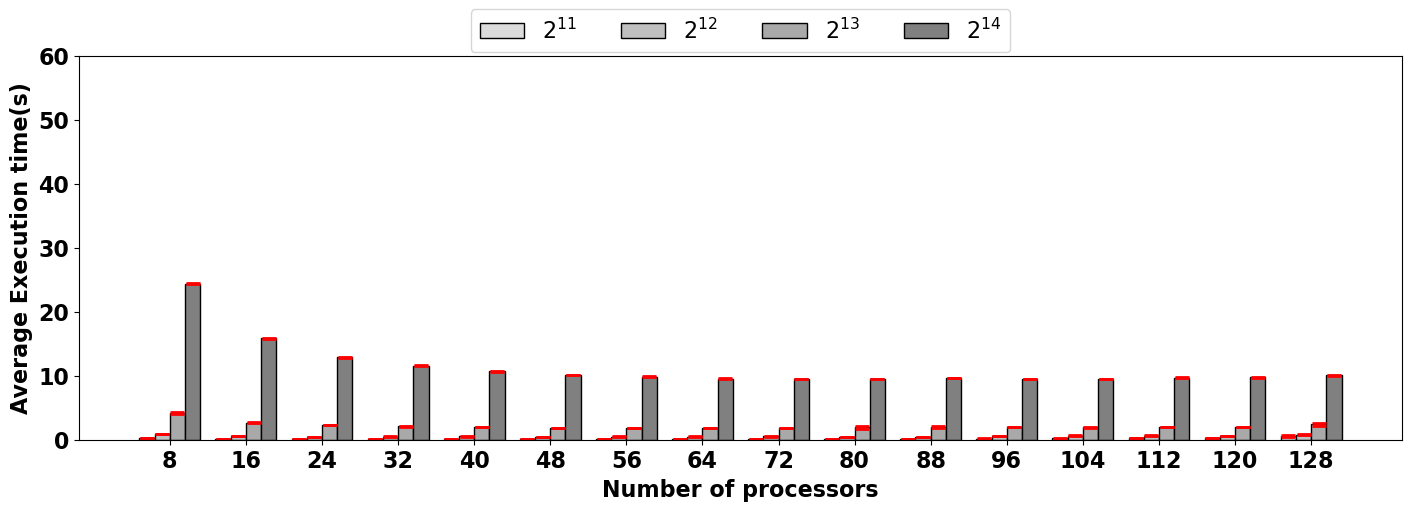

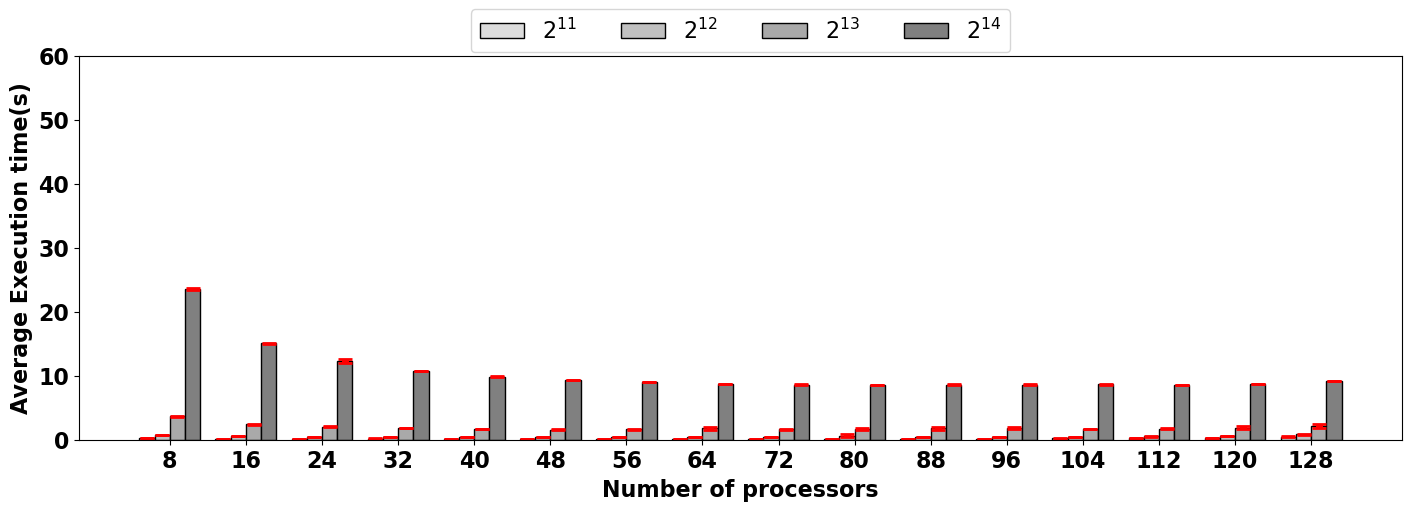

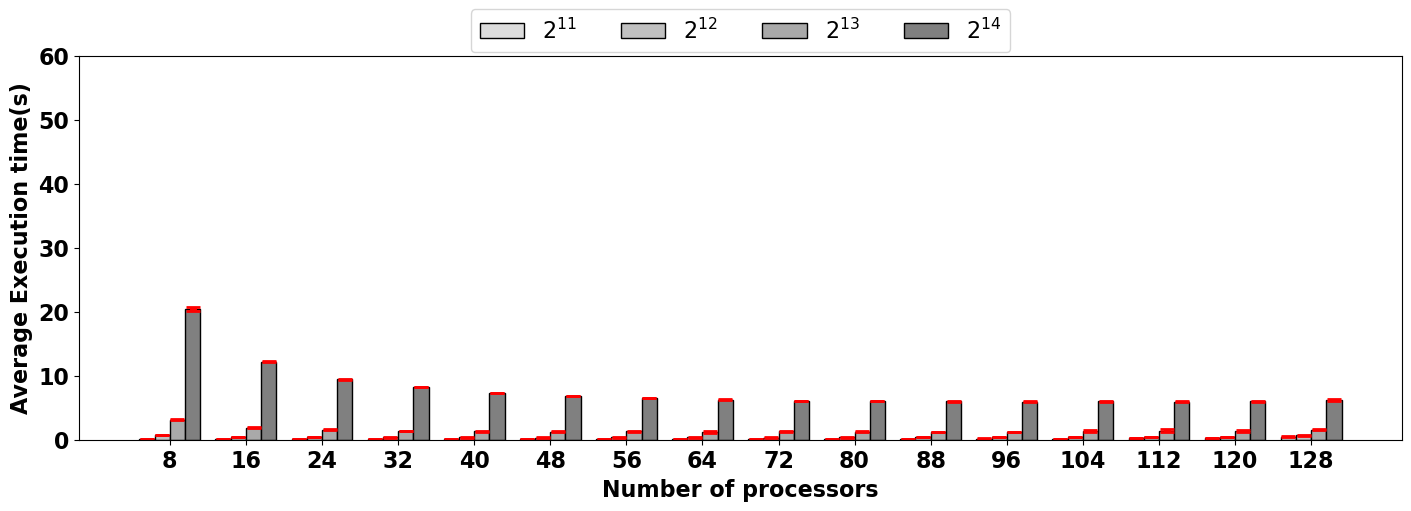

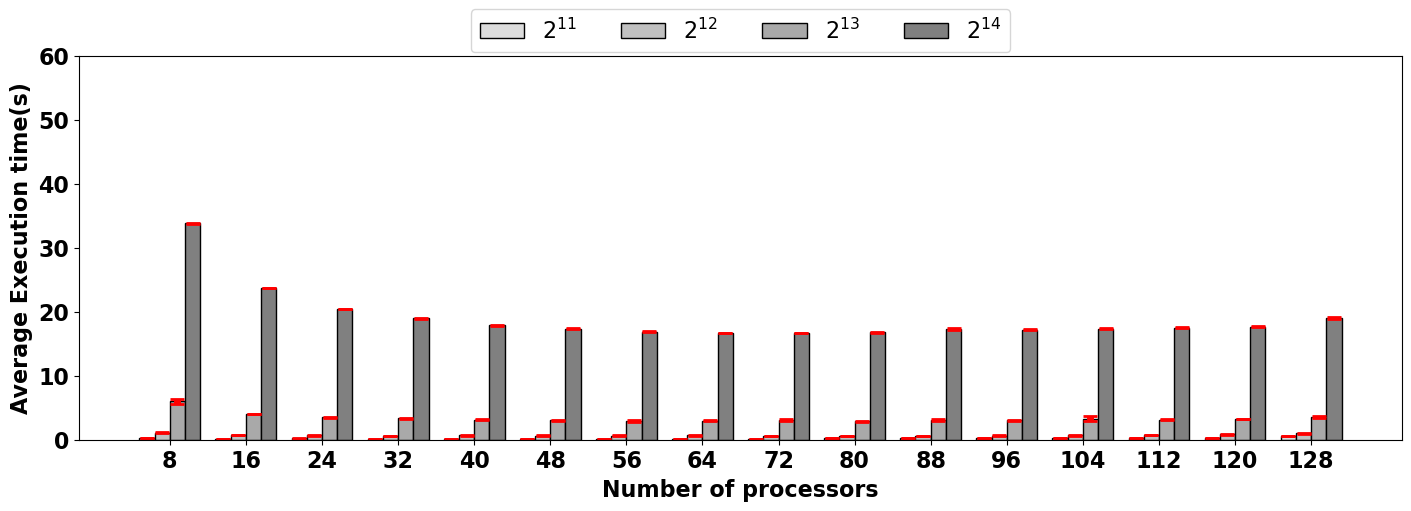

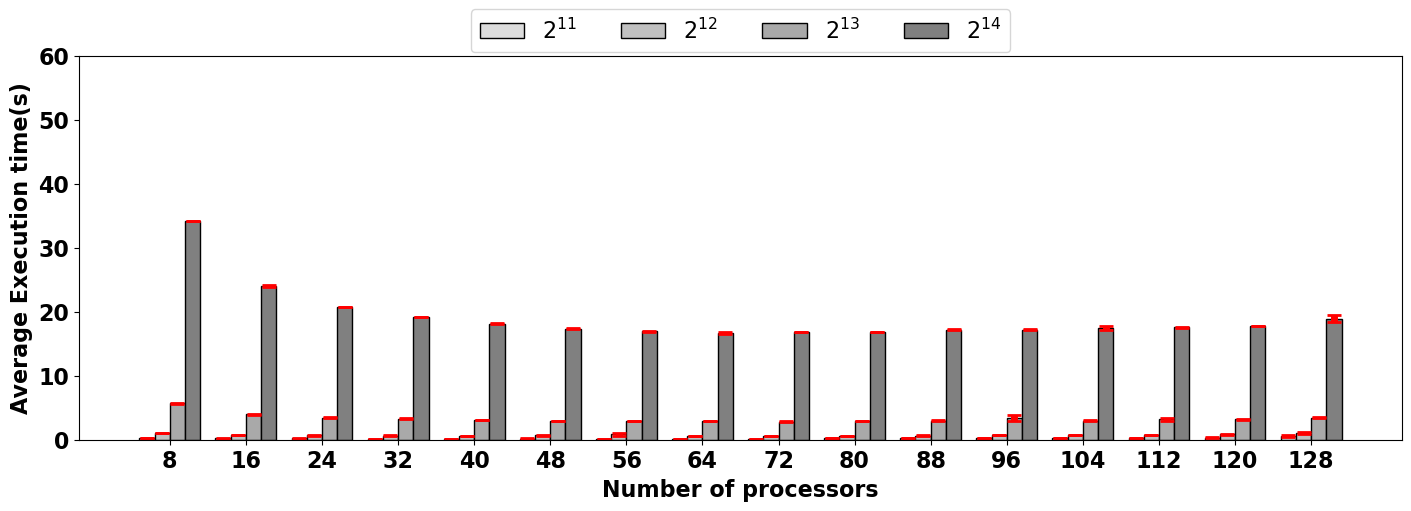

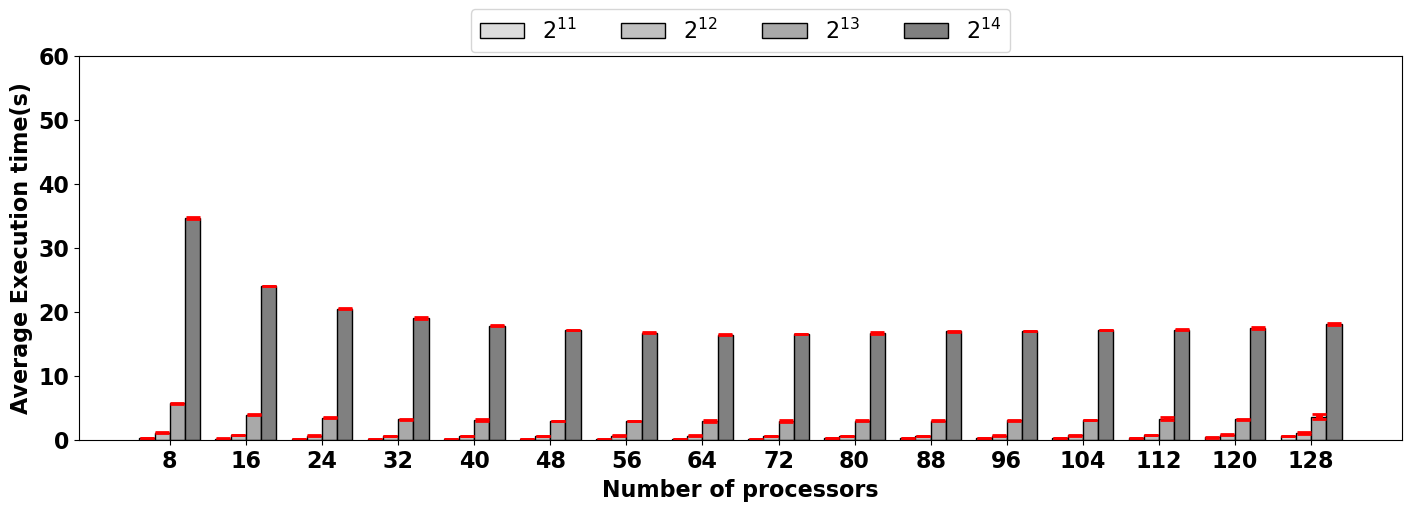

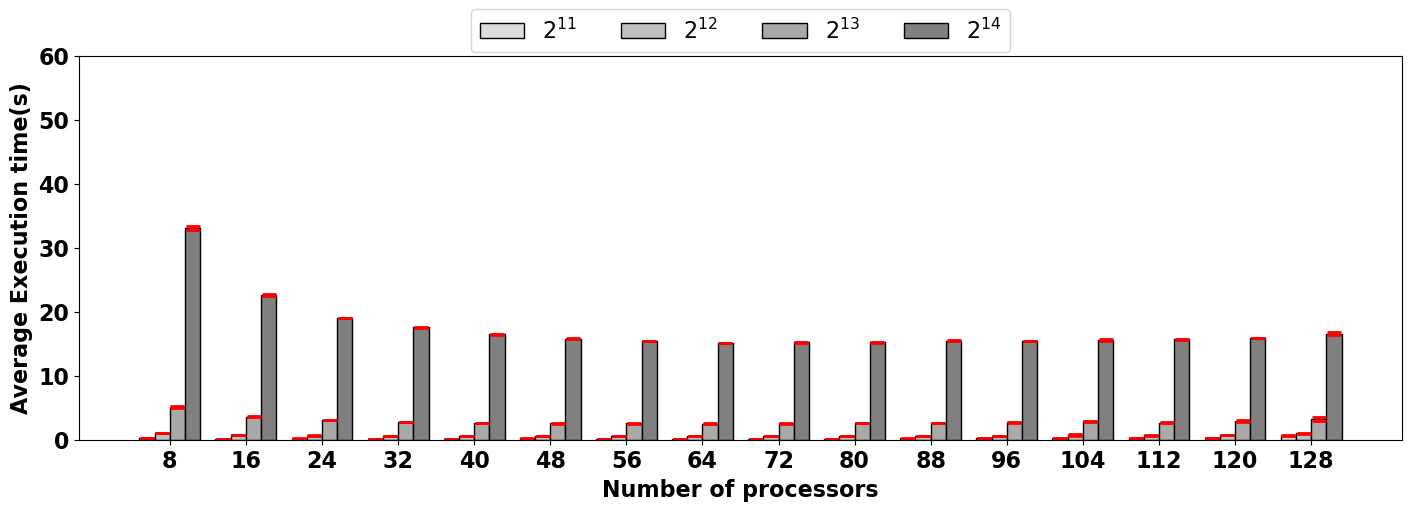

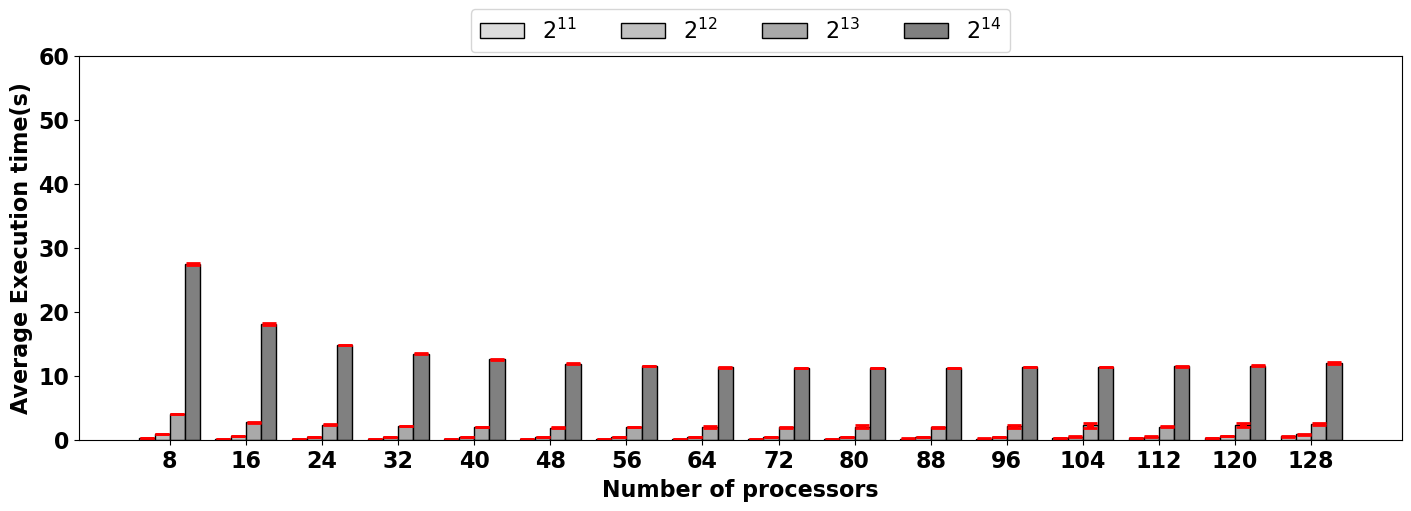

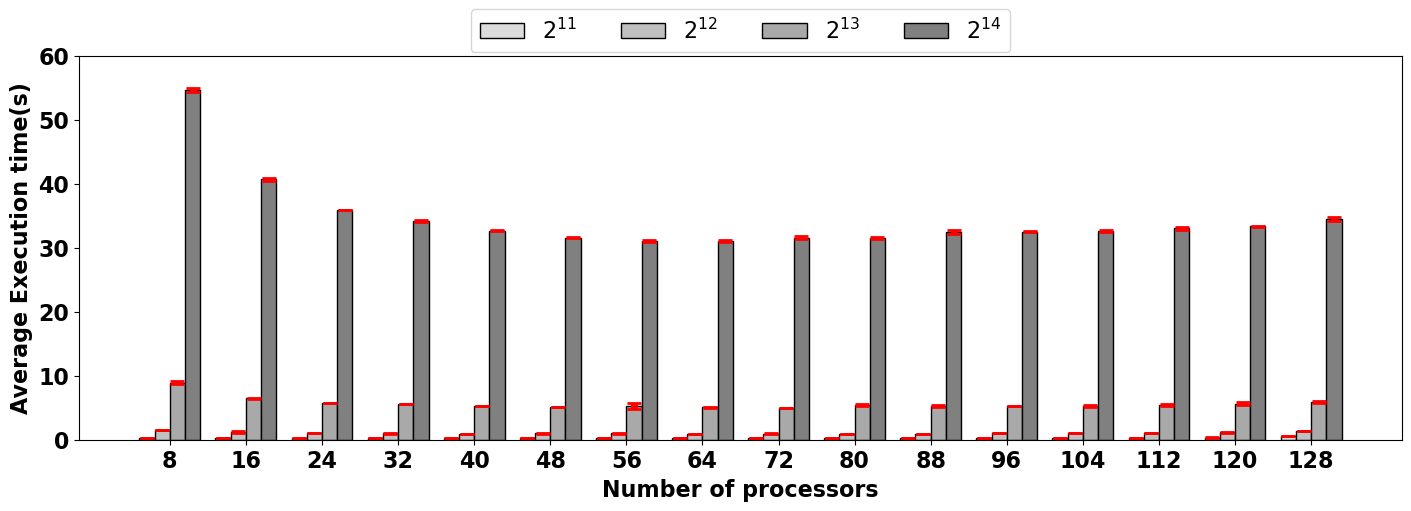

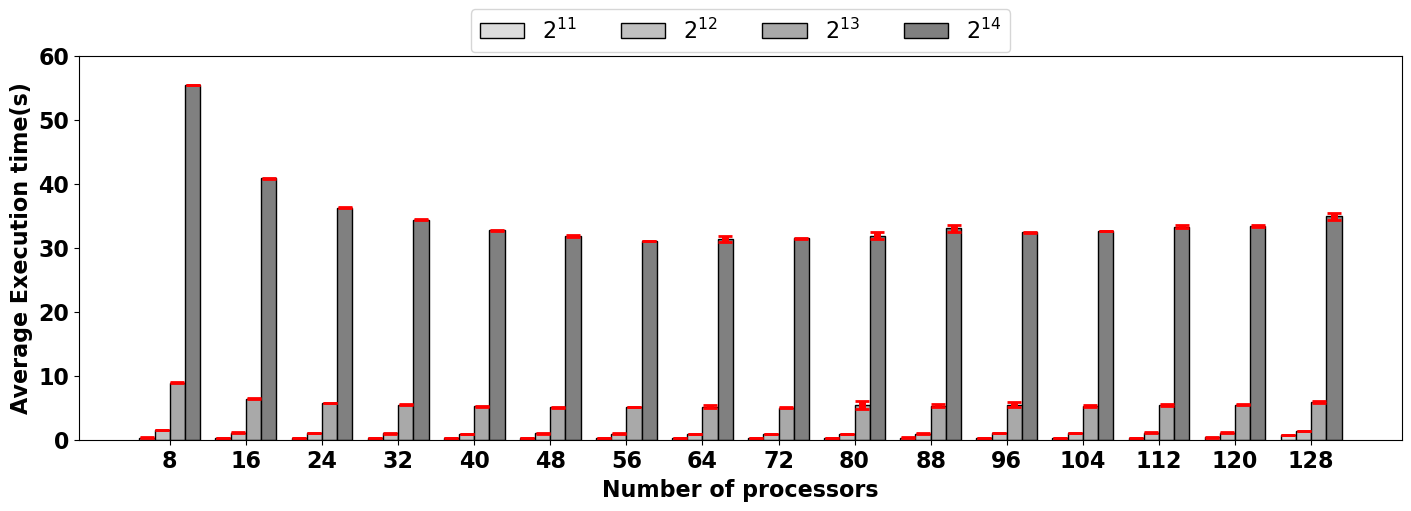

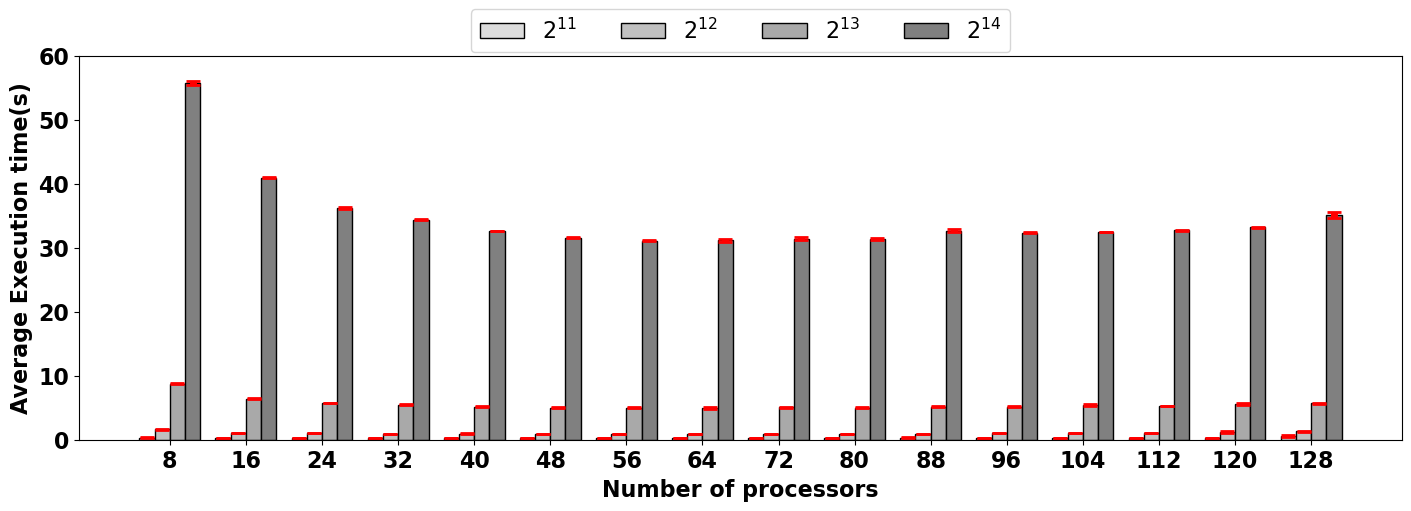

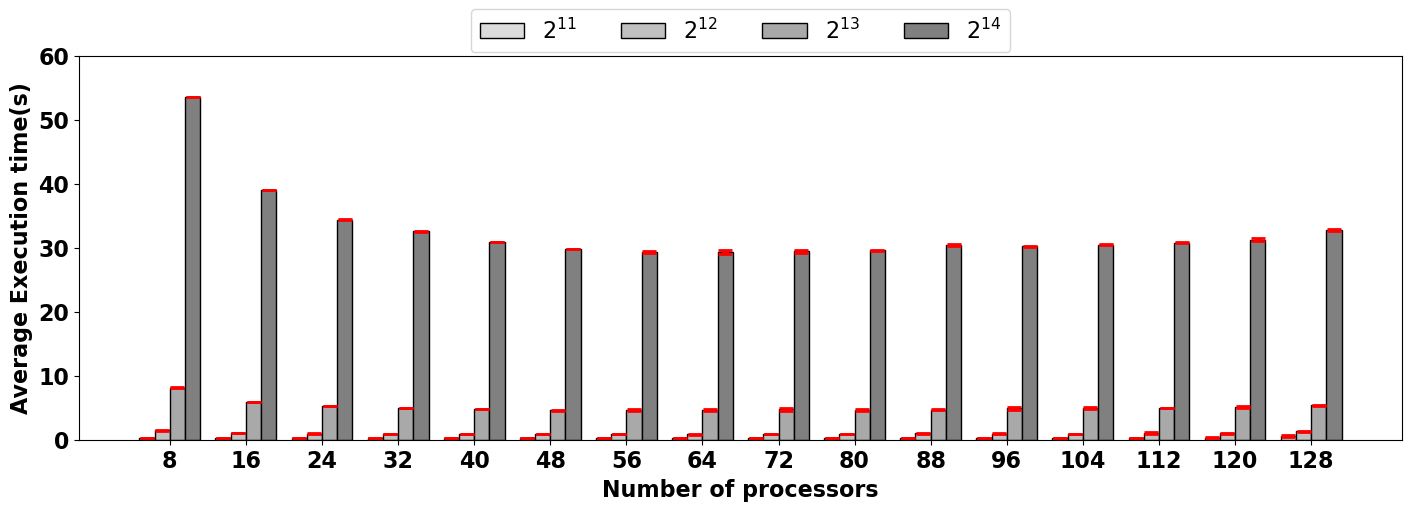

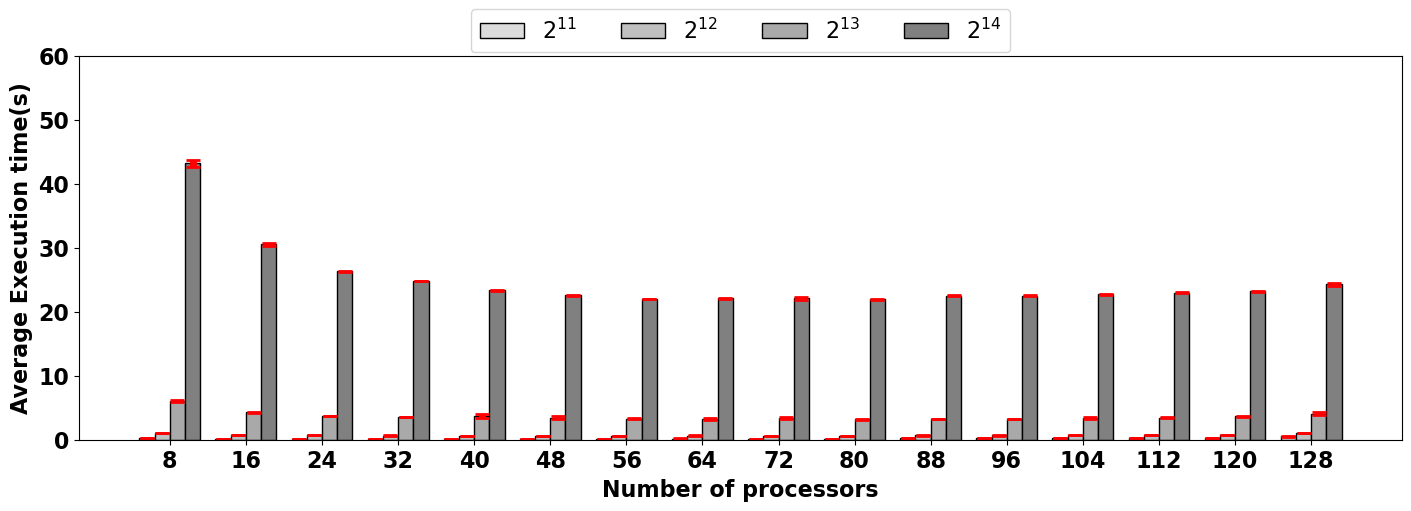

In [41]:
# we want to show that with increasing cores decreses the execution time therefore we plot for fixed density and fixed delta
# x axis is cores and y axis is execution time for 3 different nodes

e = 1
density2 = density
# density2.remove(100)
for de in delta:
    for d in density2:
        plotData = {}
        plotStd = {}
        for n in nodes:
            plotData[n] = []   
            plotStd[n] = []
            for c in cores:
                plotData[n].append(np.mean(avgExeTime[(n,d,e,c,de)]))
                plotStd[n].append(statistics.stdev(avgExeTime[(n,d,e,c,de)]))

        bar_width = 0.2  # Width of each bar
        x = np.arange(len(cores))  # X-axis values
        f, axes = plt.subplots(constrained_layout=True, figsize=[14, 5])
        i = 0
        
        for n in nodes:
            power = nodes1[i]
            plt.bar(x + i * bar_width - (0.5 * bar_width), plotData[n], width=bar_width, label= f"{power}", color = color[i], edgecolor = 'k', yerr=plotStd[n], error_kw=dict(elinewidth=5, capsize=5, capthick=2, ecolor = 'red'))
            i = i + 1

        fc = 11
        # Adding labels, title, and legend
        plt.xlabel('Number of processors', fontsize=16, weight = 'bold')
        plt.ylabel('Average Execution time(s)', fontsize=16, weight = 'bold')
#         plt.title(f'For {d}% density and {de} delta', fontsize=16, weight = 'bold')
        plt.xticks(x + bar_width, cores, fontsize=16, weight = 'bold')
        plt.yticks(fontsize=16, weight = 'bold')
        plt.legend(ncol = 6, fontsize=16, loc = 'upper center', bbox_to_anchor = (0.5, 1.15))
        plt.ylim(0, 60)
        plt.savefig(f'plots/avg_execution_time_vs_cores_density_{d}_delta_{de}.pdf', dpi=300)
        plt.show()

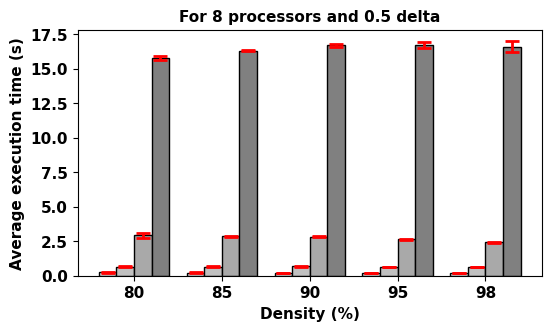

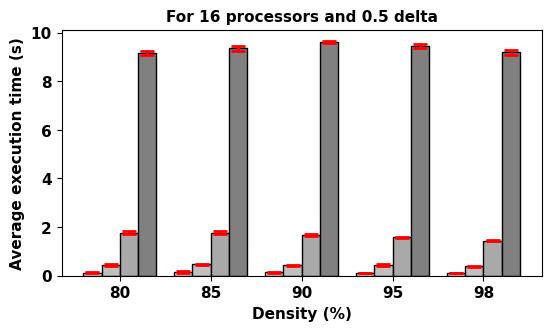

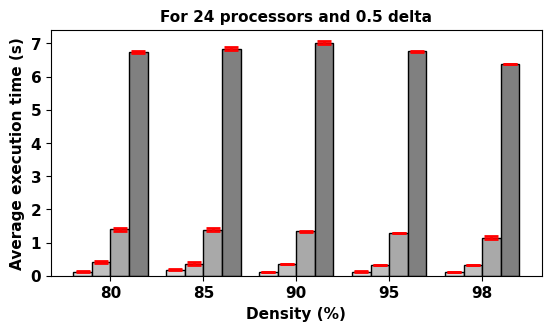

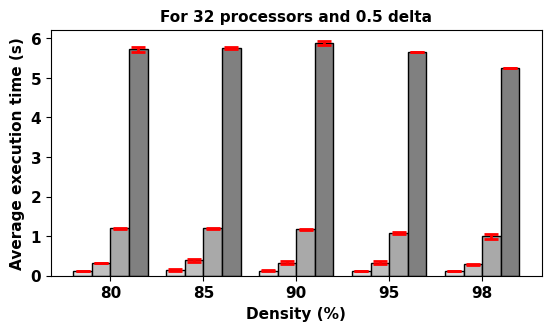

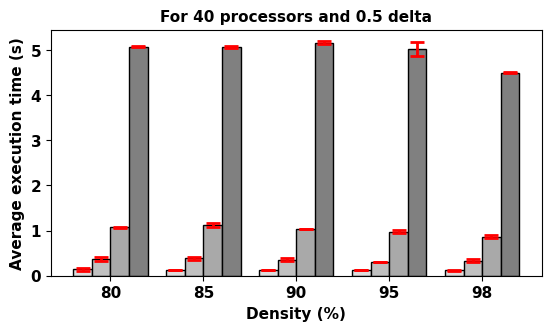

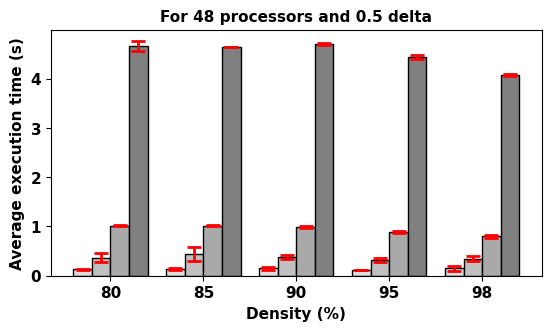

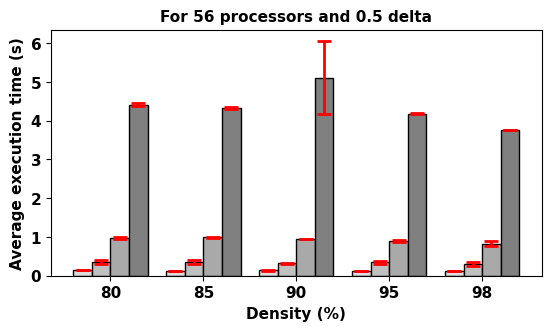

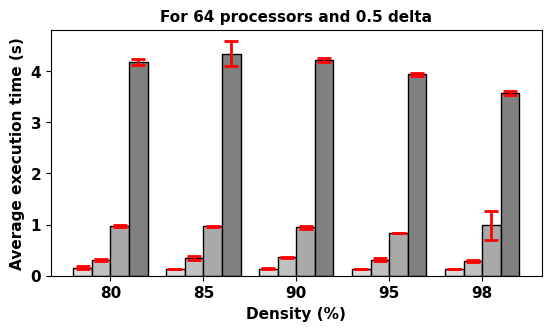

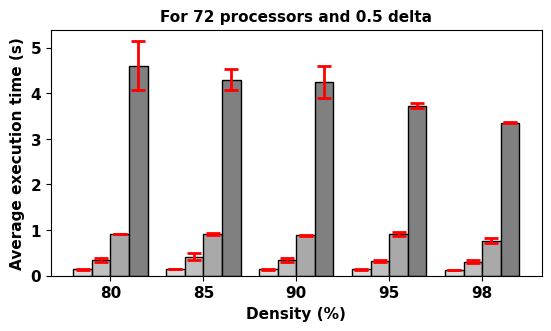

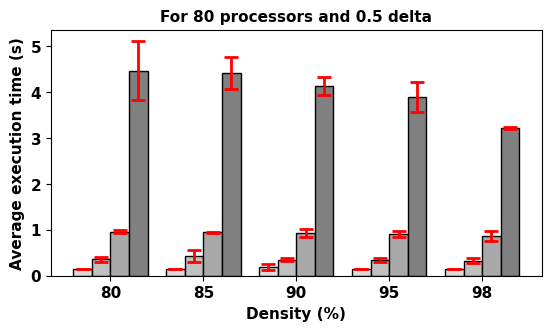

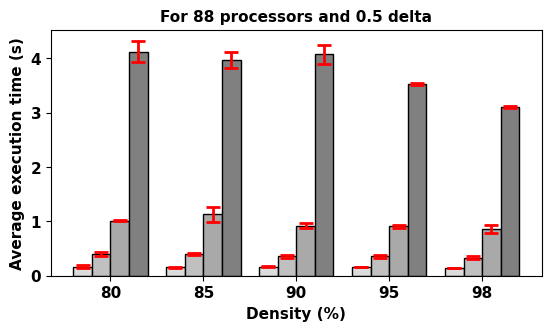

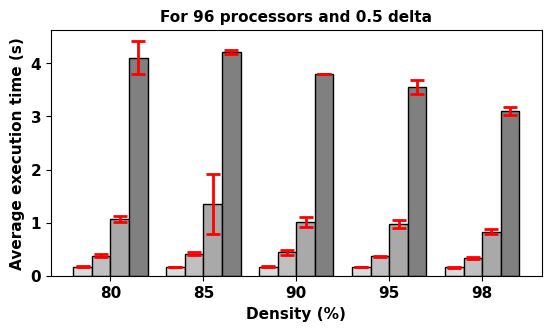

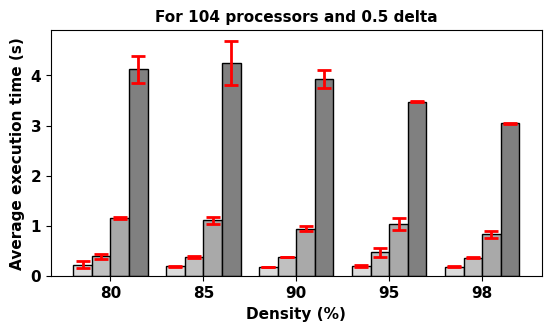

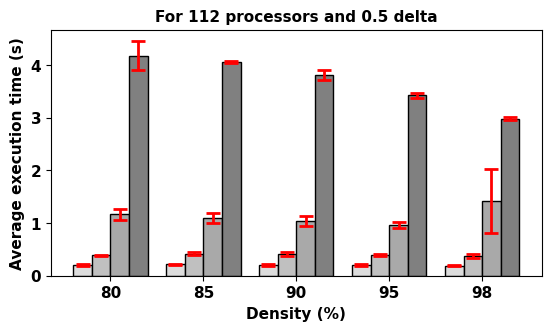

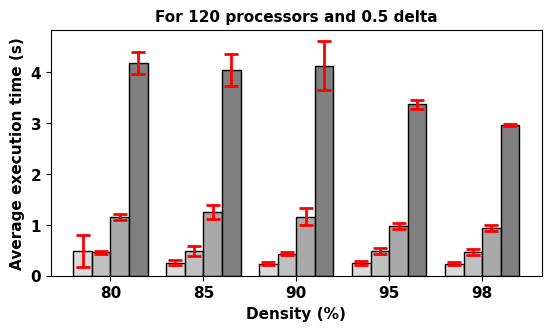

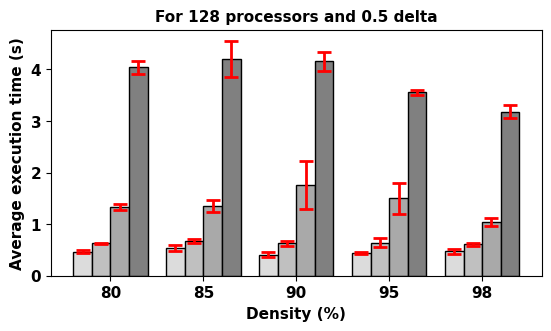

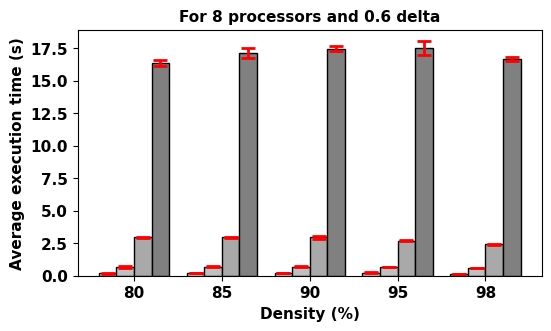

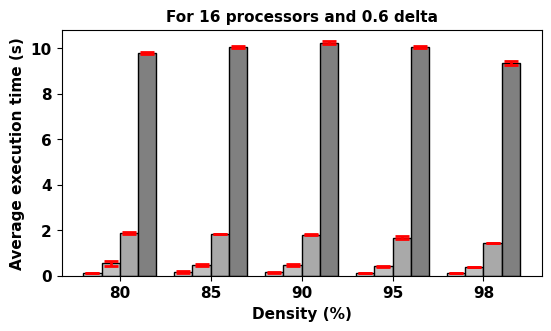

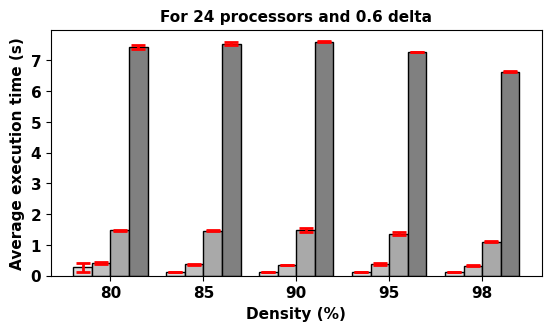

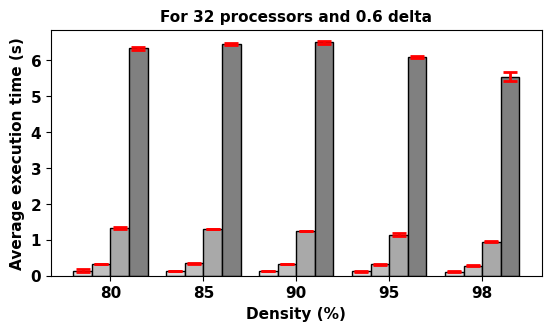

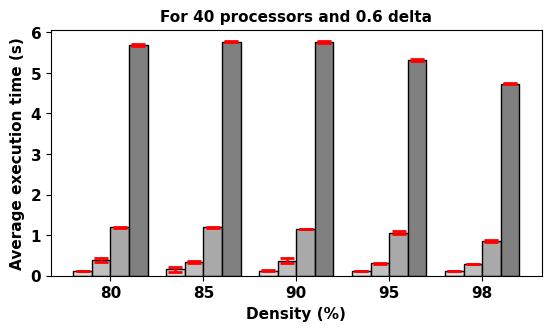

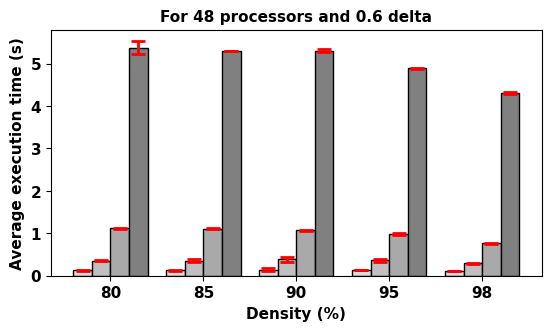

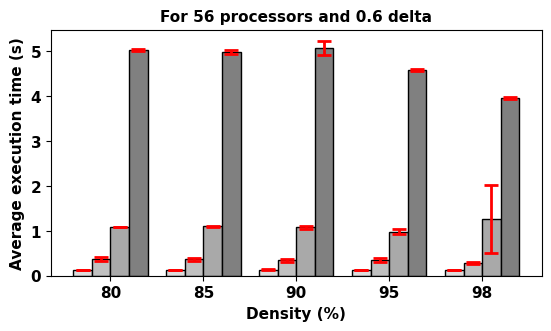

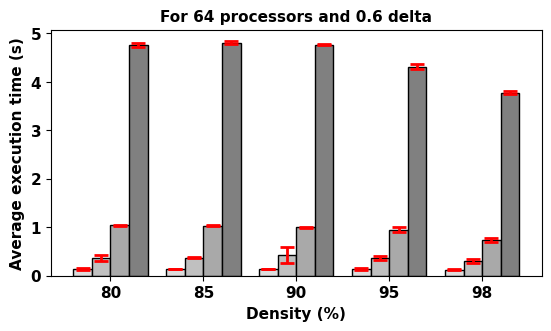

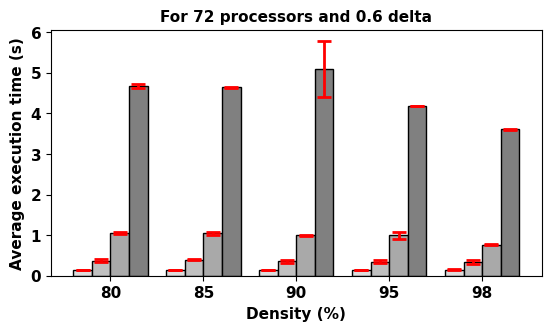

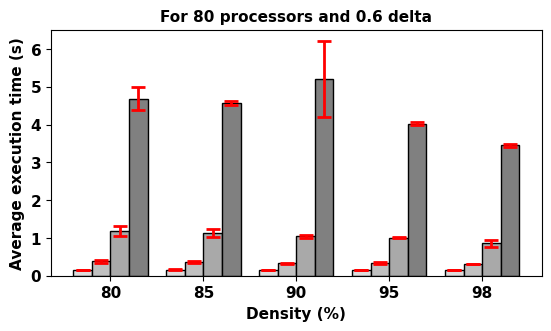

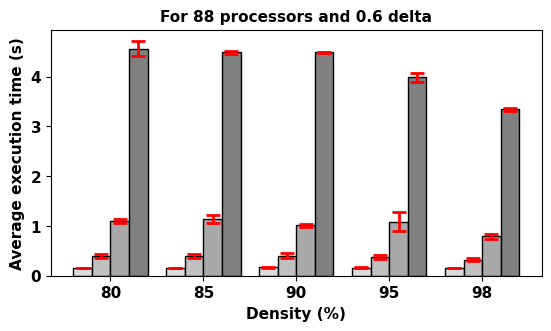

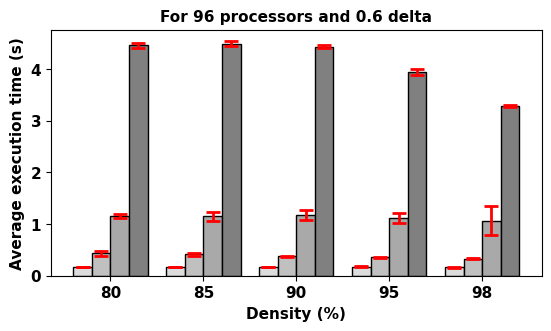

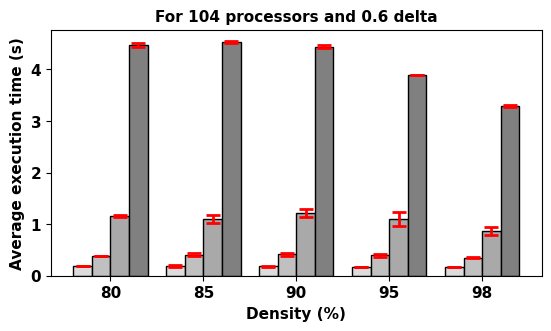

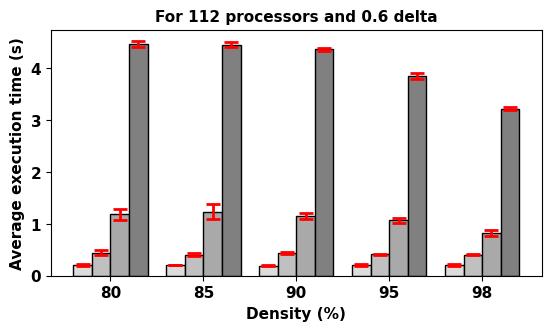

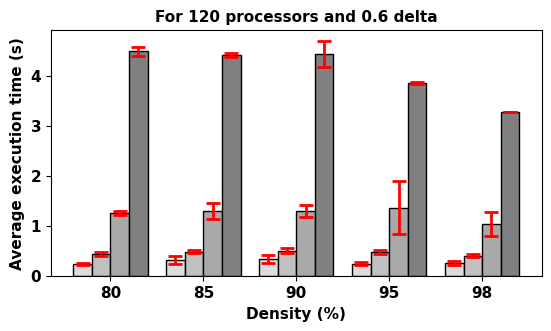

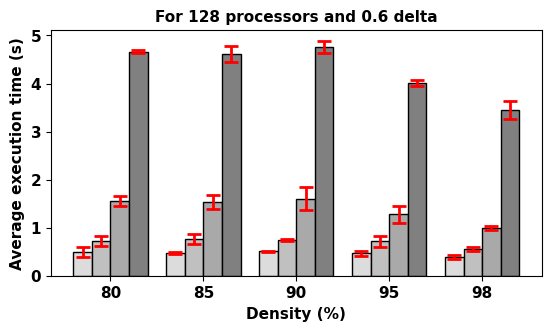

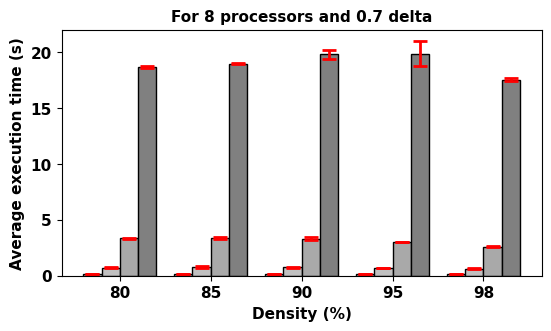

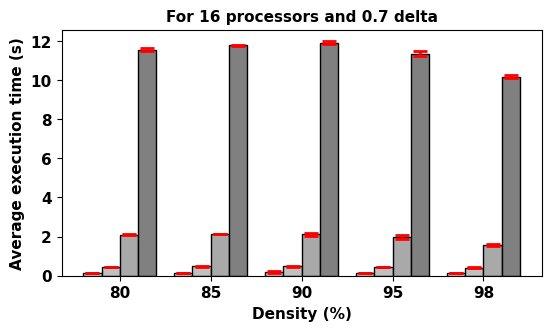

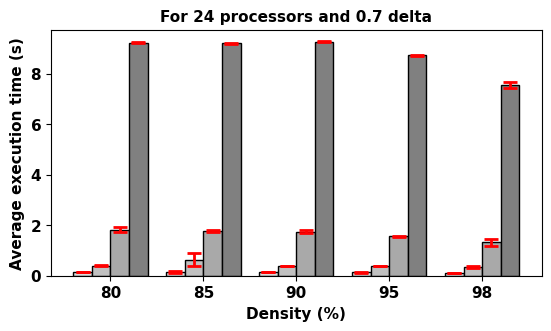

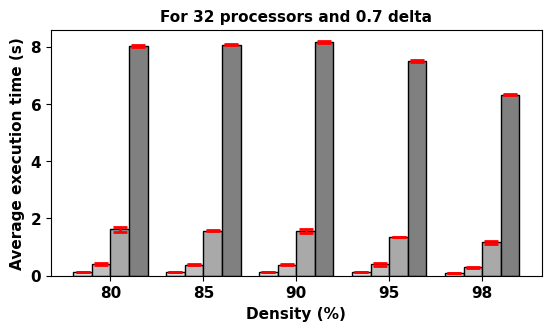

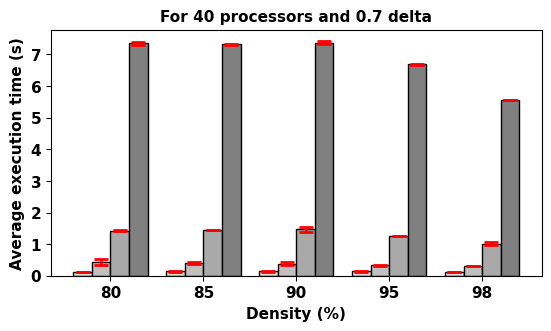

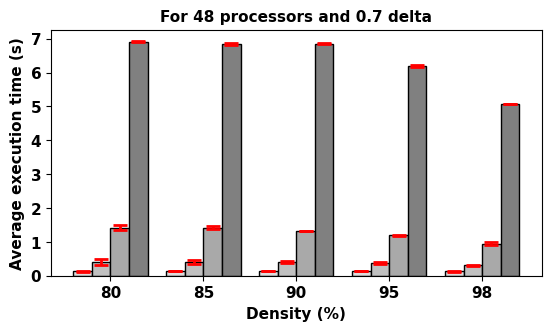

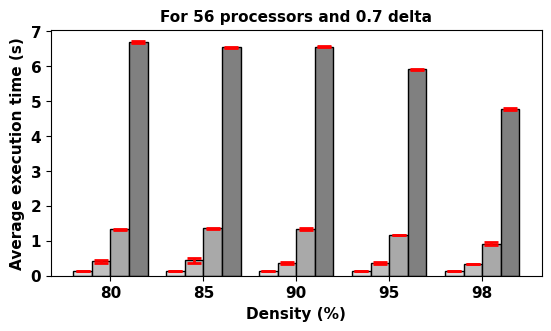

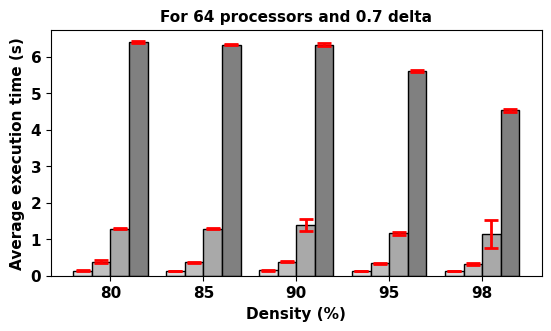

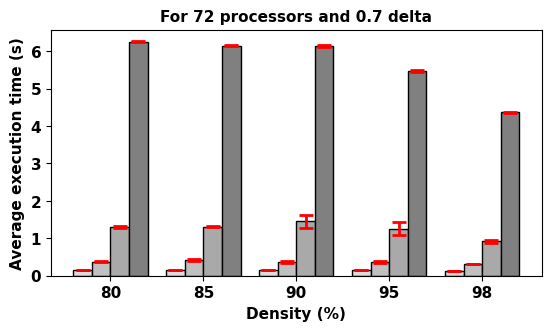

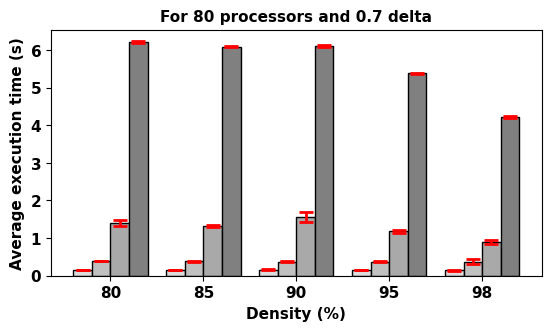

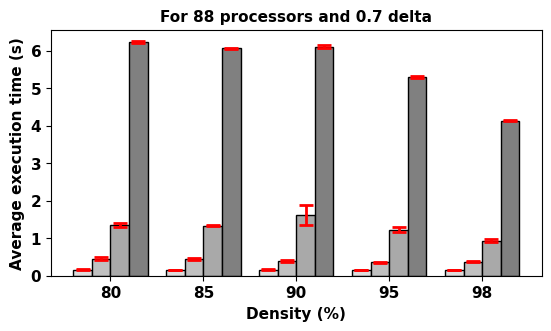

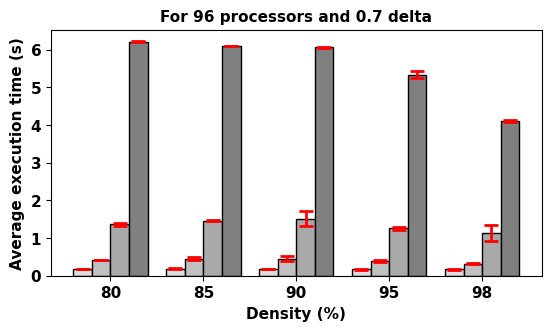

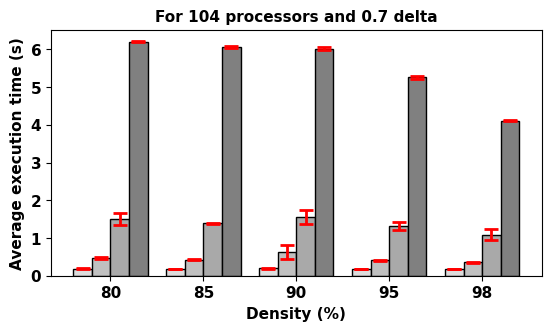

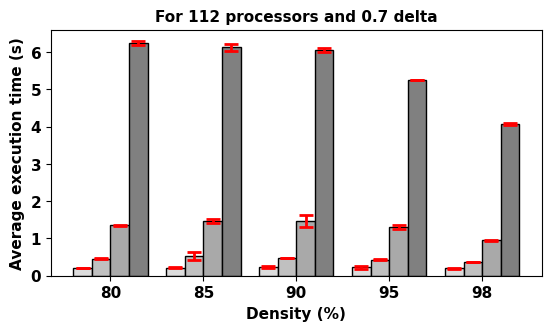

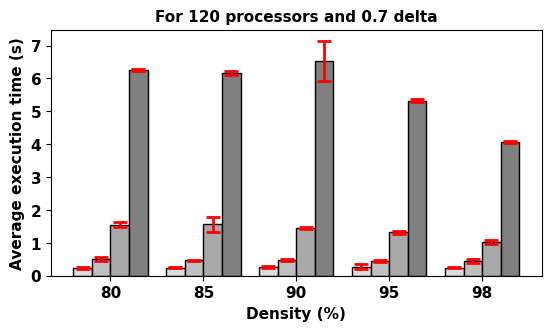

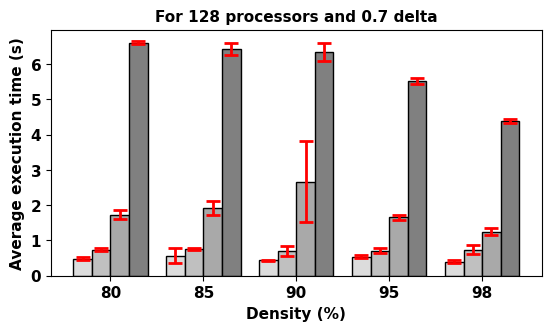

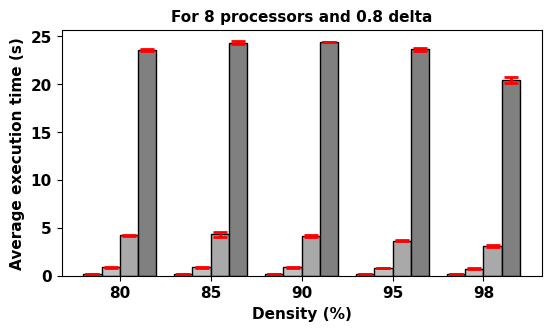

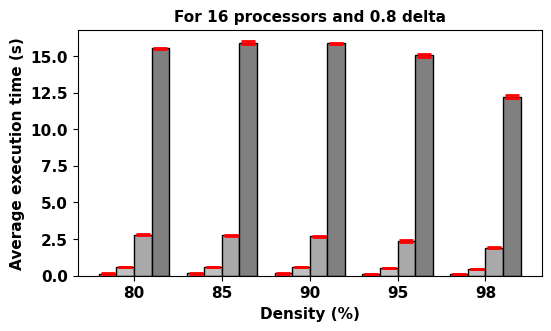

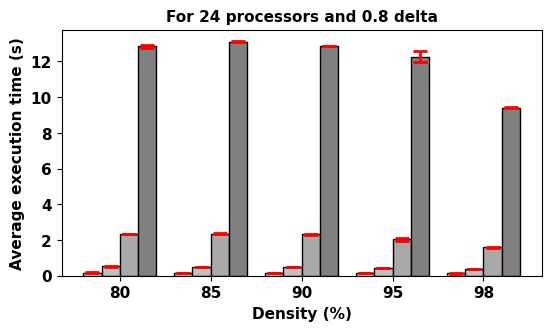

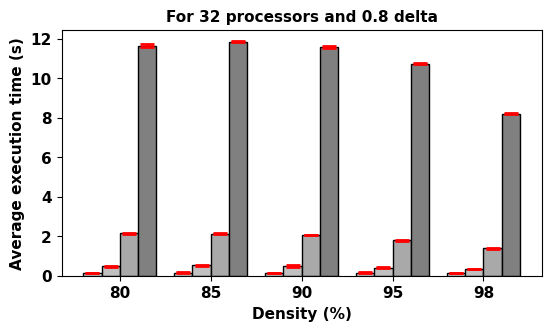

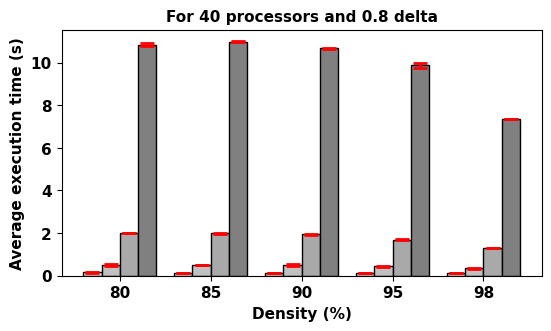

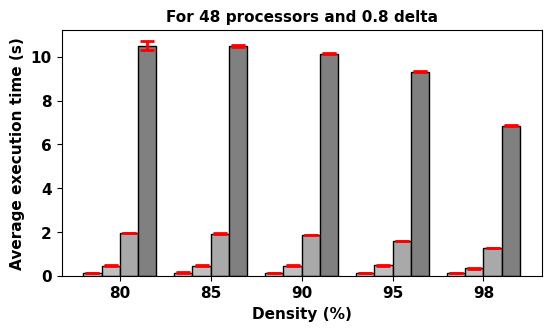

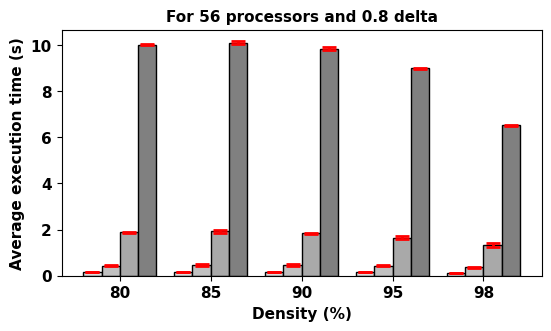

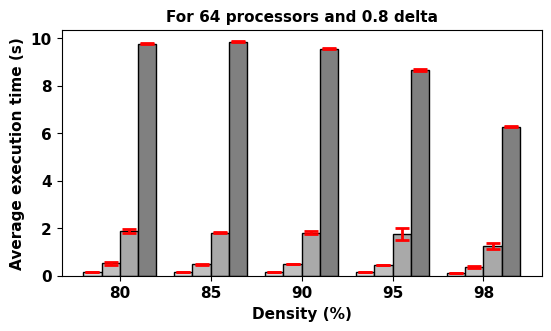

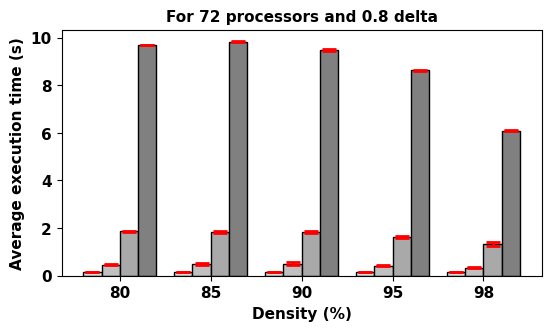

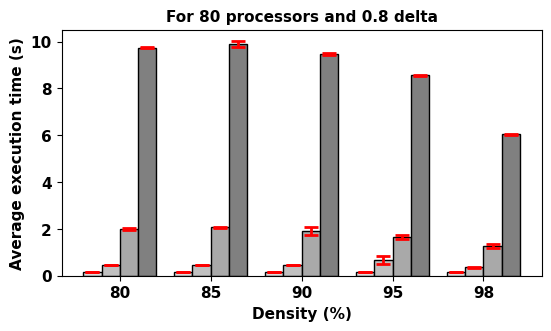

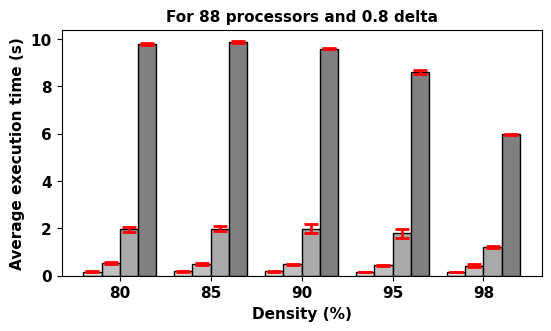

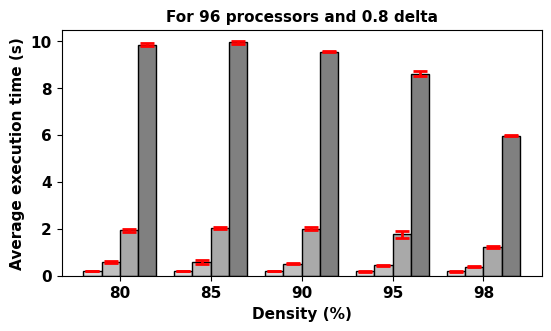

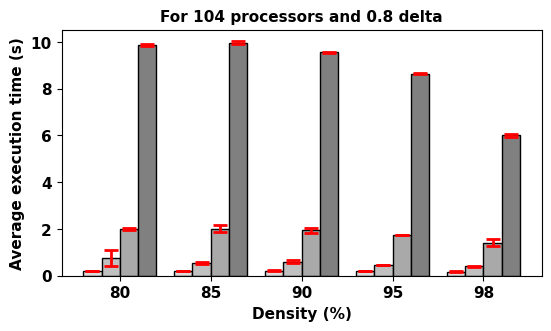

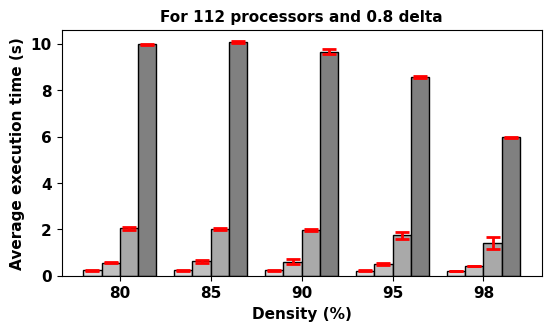

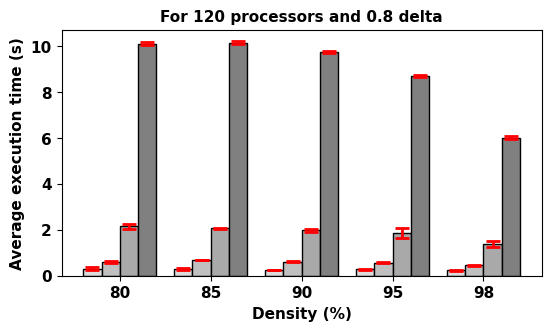

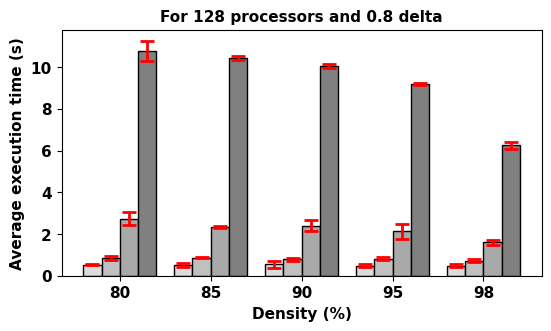

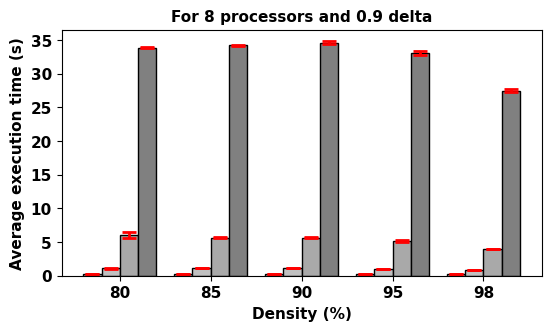

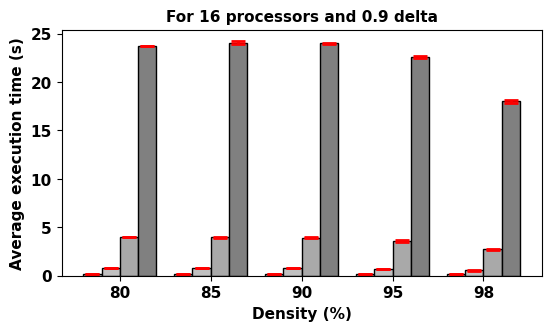

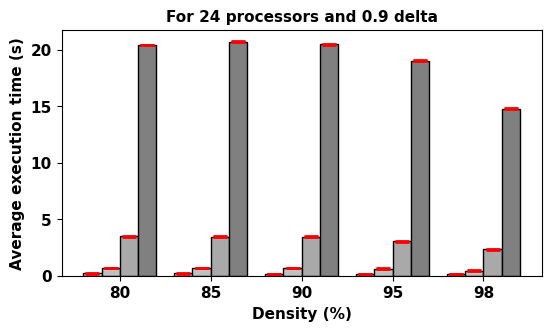

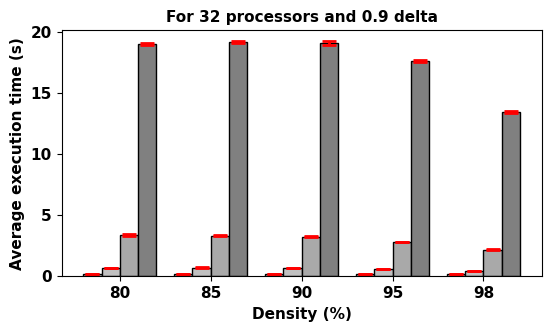

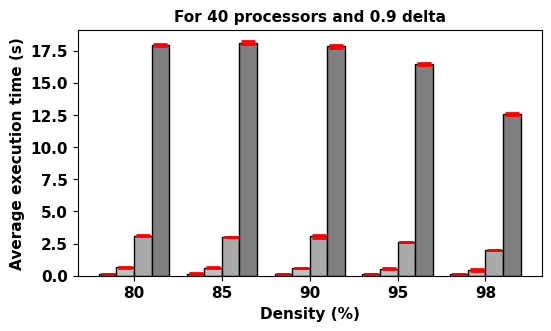

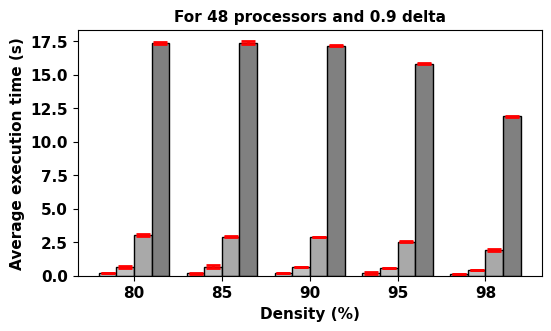

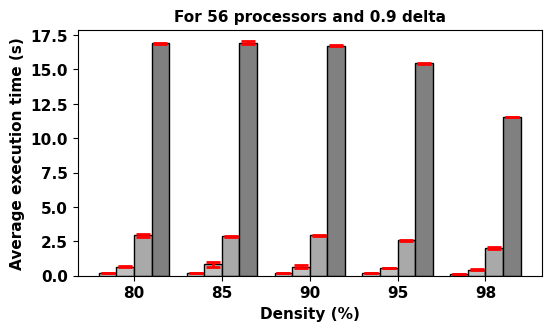

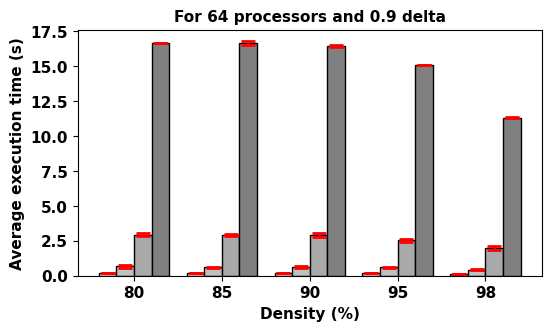

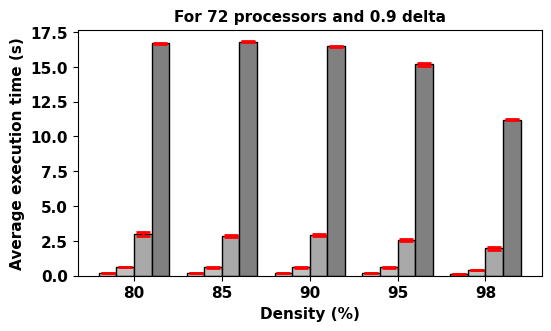

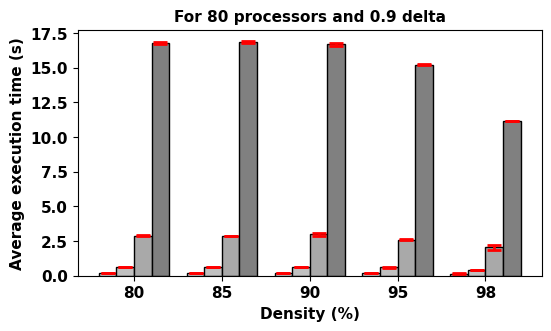

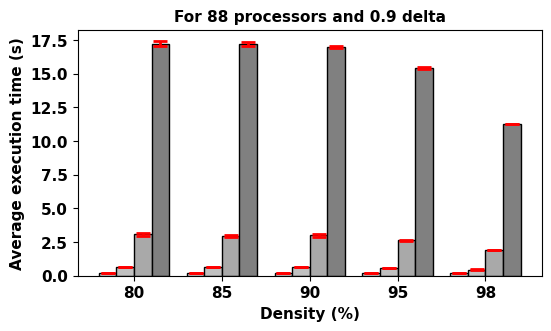

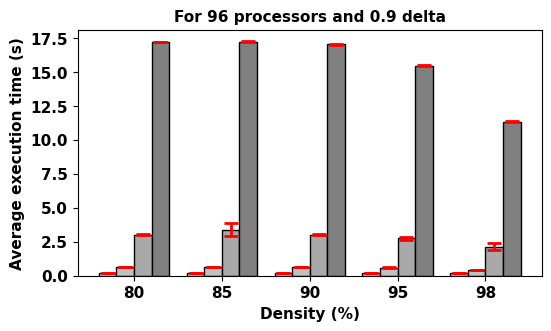

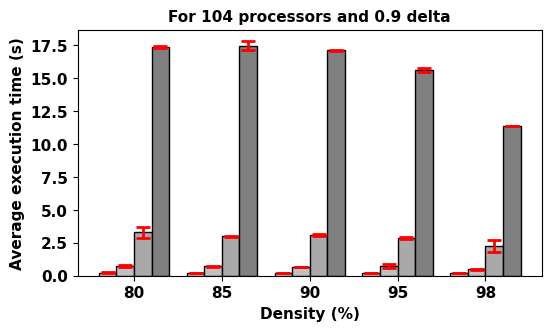

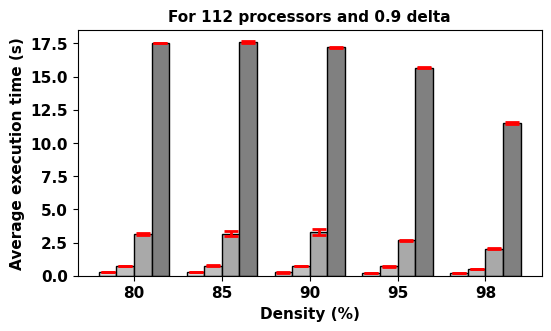

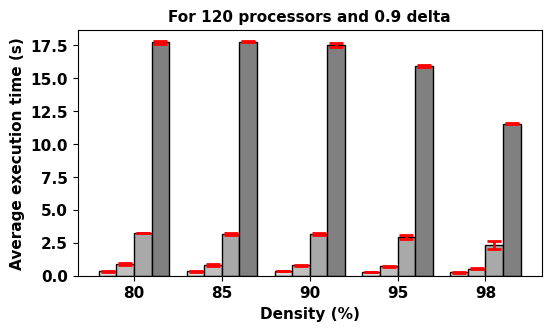

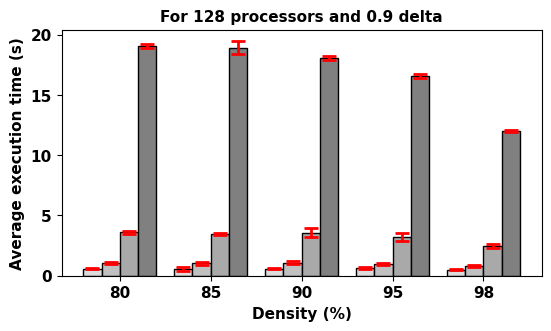

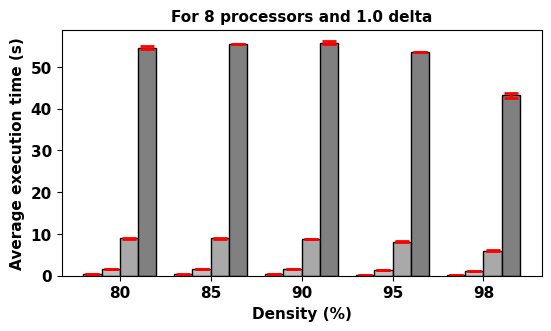

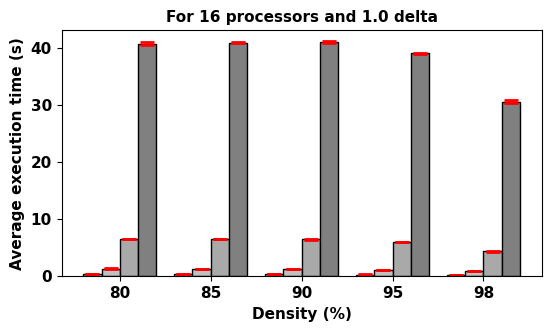

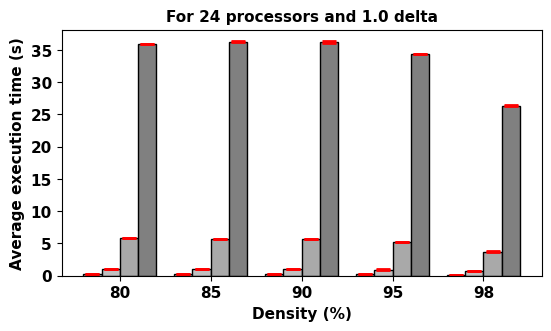

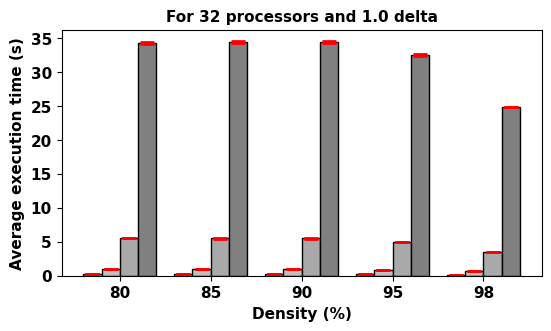

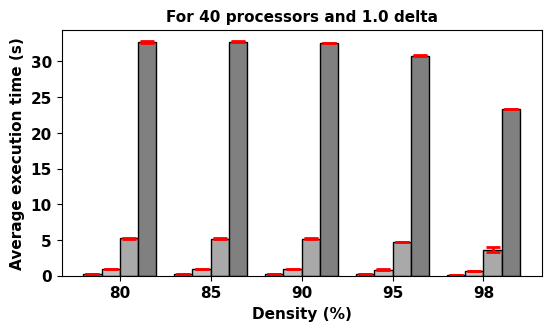

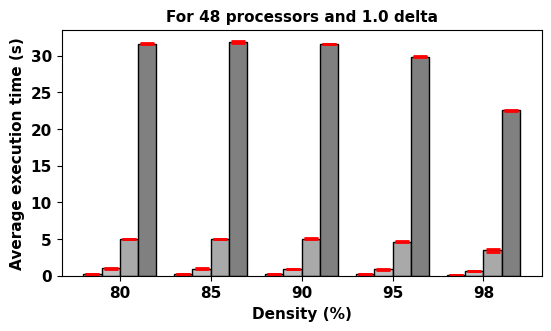

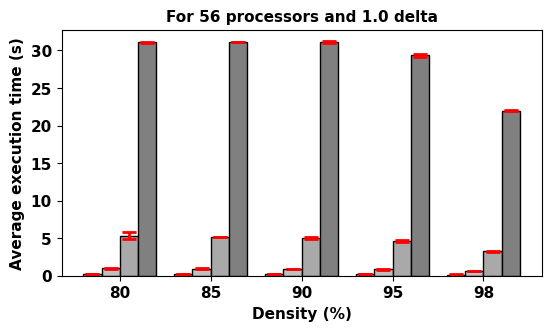

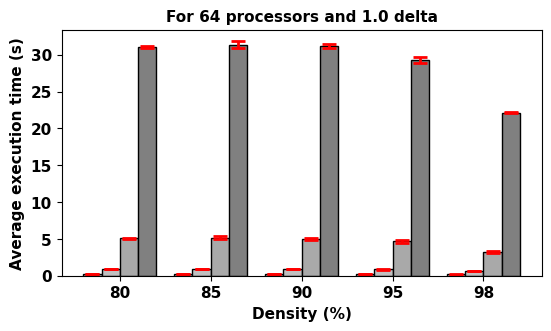

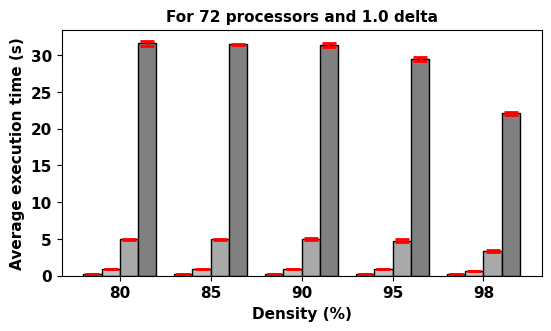

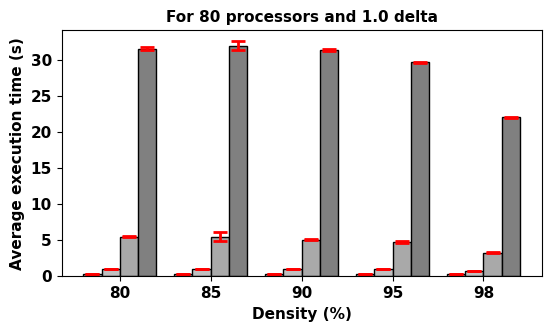

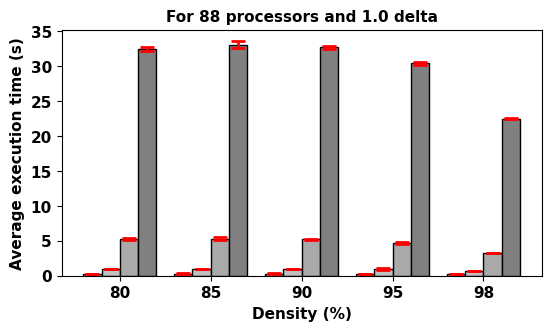

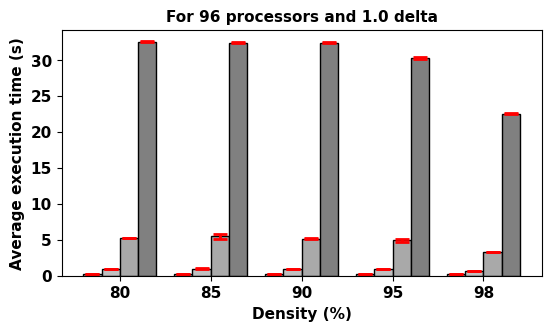

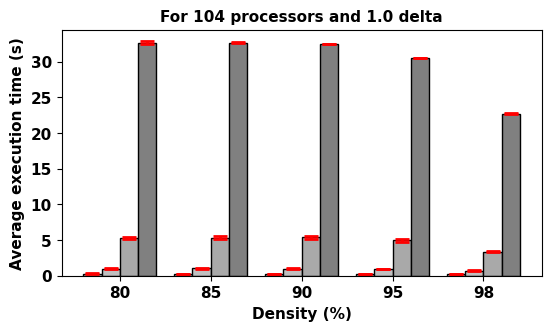

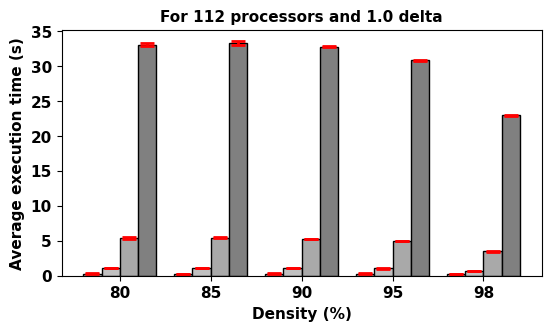

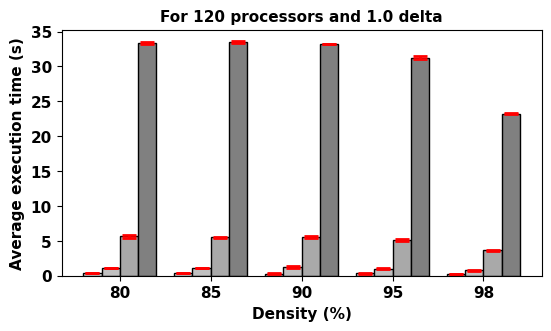

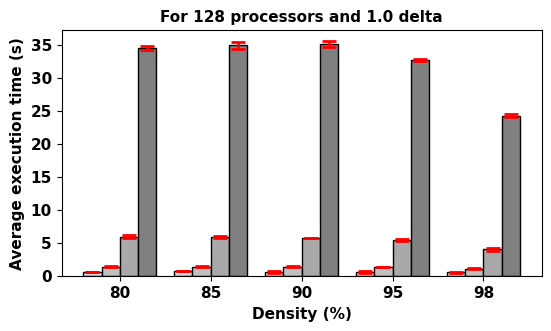

In [55]:
# we want to show that with increasing density increases the execution time therefore we plot for fixed cores and fixed delta
# x axis is density and y axis is execution time for 3 different nodes

e = 1
# density2.remove(100)
density = sorted(density2)
for de in delta:
     for c in cores:
        plotData = {}
        plotStd = {}
        for n in nodes:
            plotData[n] = []
            plotStd[n] = []
            for d in density:
                plotData[n].append(np.mean(avgExeTime[(n,d,e,c,de)]))
                plotStd[n].append(statistics.stdev(avgExeTime[(n,d,e,c,de)]))

        bar_width = 0.2  # Width of each bar
        x = np.arange(len(density2))  # X-axis values
        f, axes = plt.subplots(constrained_layout=True, figsize=[5.4, 3.2])
        i = 0
        for n in nodes:
            power = nodes1[i]
            plt.bar(x + i * bar_width - (0.5 * bar_width), plotData[n], width=bar_width, label= f"{power}", color = color[i], edgecolor = 'k', yerr=plotStd[n], error_kw=dict(elinewidth=2, capsize=5, capthick=2, ecolor = 'red'))
            i = i + 1

        fc = 11
        # Adding labels, title, and legend
        plt.xlabel('Density (%)', fontsize=11, weight = 'bold')
        plt.ylabel('Average execution time (s)', fontsize=11, weight = 'bold')
        plt.title(f'For {c} processors and {de} delta', fontsize=11, weight = 'bold')
        plt.xticks(x + bar_width, density, fontsize=11, weight = 'bold')
        plt.yticks(fontsize=11, weight = 'bold')
#         plt.legend(ncol = 6, fontsize=11, loc = 'upper center', bbox_to_anchor = (0.5, 1.17))
#         plt.ylim(0,60)
#         plt.savefig(f'plots/avg_execution_time_vs_density_for_delta_{de}_cores_{c}.pdf', dpi=300)
        plt.show()

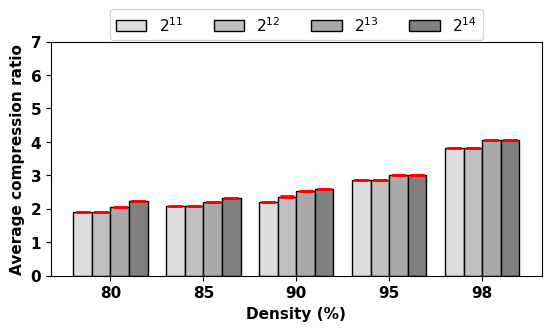

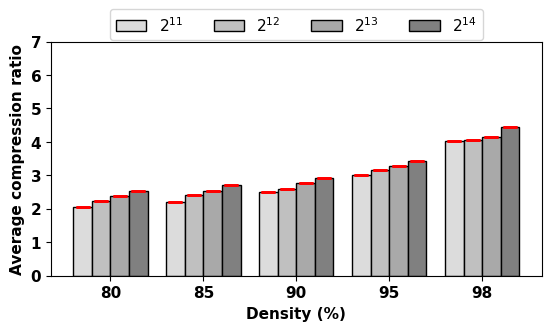

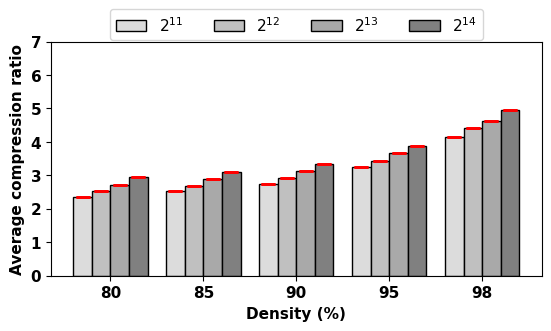

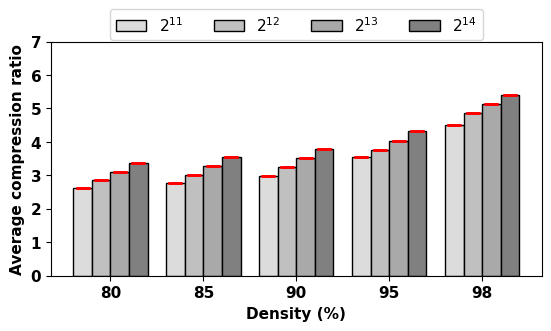

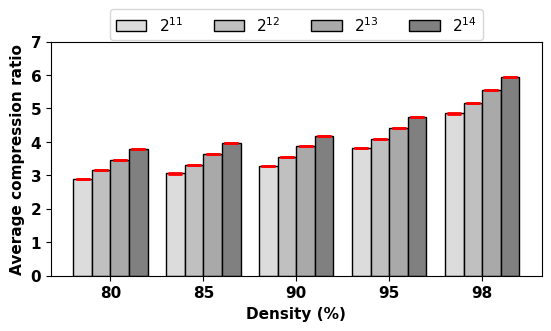

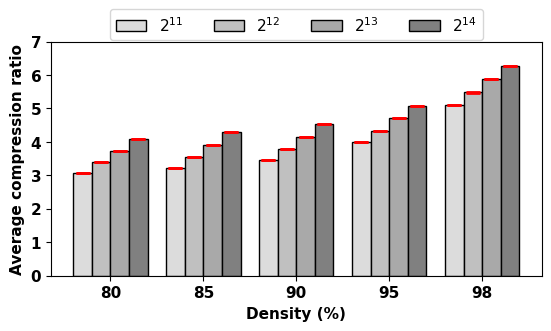

In [45]:
# we want to show that with increasing density increases the compression ratio therefore we plot for fixed cores and fixed delta
# x axis is density and y axis is execution time for 3 different nodes

e = 1
# density2.remove(100)
density = sorted(density2)
c = 8
for de in delta:
    plotData = {}
    plotStd = {}
    for n in nodes:
        plotData[n] = []
        plotStd[n] = []
        for d in density:
            plotData[n].append(np.mean(avgCompRatio[(n,d,e,c,de)]))
            plotStd[n].append(statistics.stdev(avgCompRatio[(n,d,e,c,de)]))

    bar_width = 0.2  # Width of each bar
    x = np.arange(len(density2))  # X-axis values
    f, axes = plt.subplots(constrained_layout=True, figsize=[5.4, 3.2])
    i = 0
    
    for n in nodes:
        power = nodes1[i]
        plt.bar(x + i * bar_width - (0.5 * bar_width), plotData[n], width=bar_width, label= f"{power}", color = color[i], edgecolor = 'k', yerr=plotStd[n], error_kw=dict(elinewidth=3, capsize=5, capthick=2, ecolor = 'red'))
        i = i + 1

    fc = 11
    # Adding labels, title, and legend
    plt.xlabel('Density (%)', fontsize=11, weight = 'bold')
    plt.ylabel('Average compression ratio', fontsize=11, weight = 'bold')
#     plt.title(f'For {c} processors and {de} delta', fontsize=11, weight = 'bold')
    plt.xticks(x + bar_width, density, fontsize=11, weight = 'bold')
    plt.yticks(fontsize=11, weight = 'bold')
    plt.legend(ncol = 6, fontsize=11, loc = 'upper center', bbox_to_anchor = (0.5, 1.17))
    plt.ylim(0,7)
    plt.savefig(f'plots/avg_compression_ratio_vs_density_for_delta_{de}_cores_{c}.pdf', dpi=300)
    plt.show()

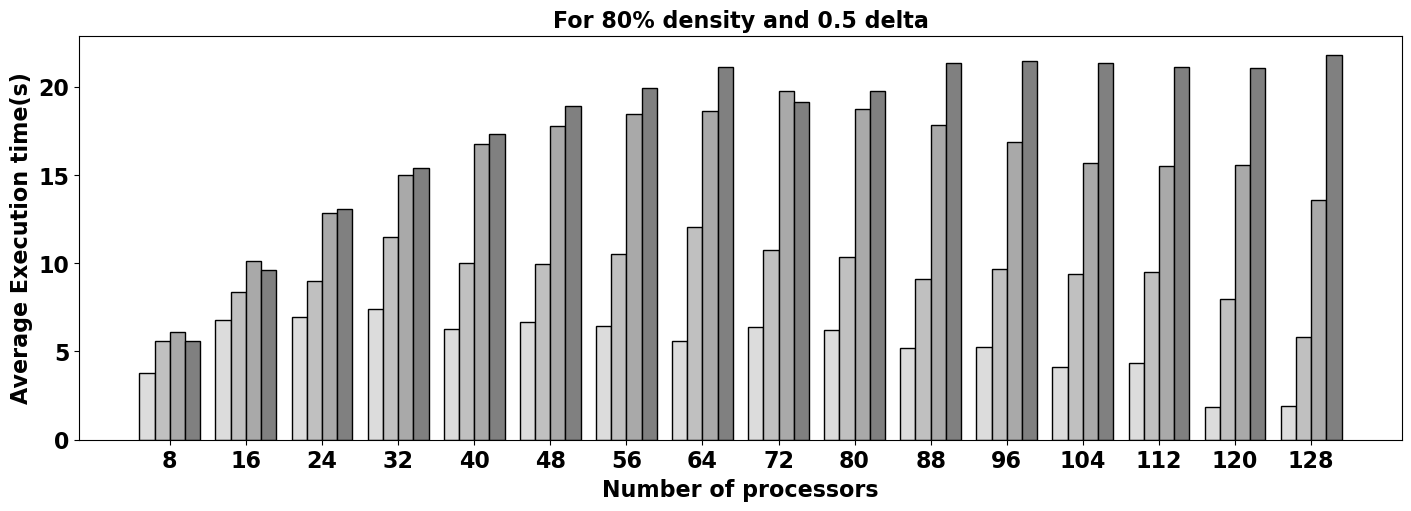

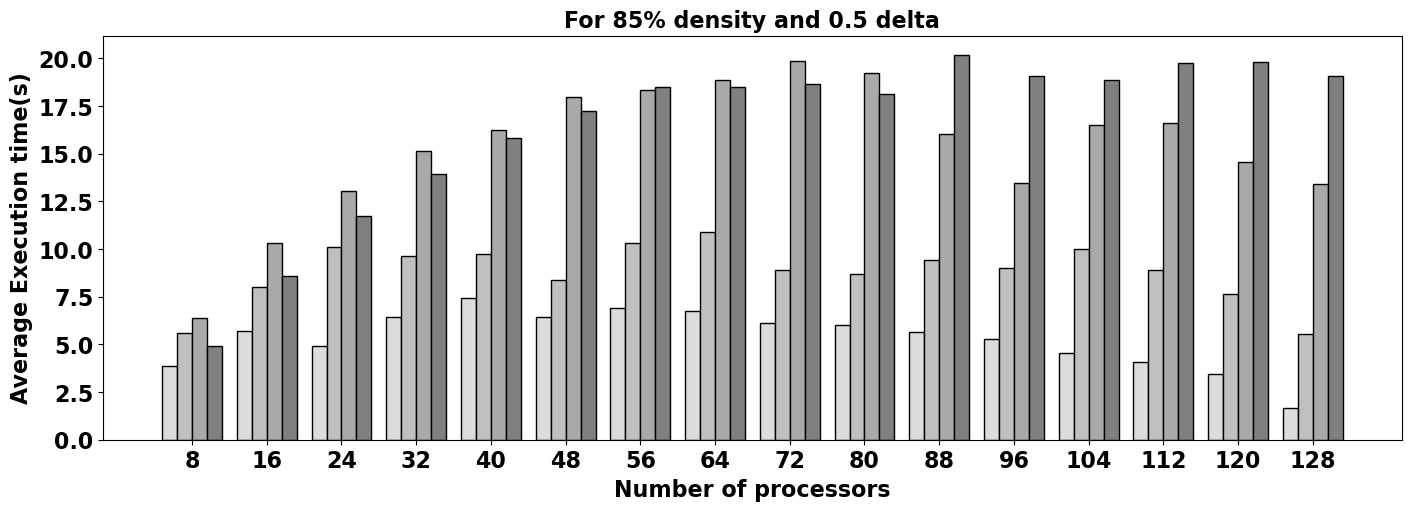

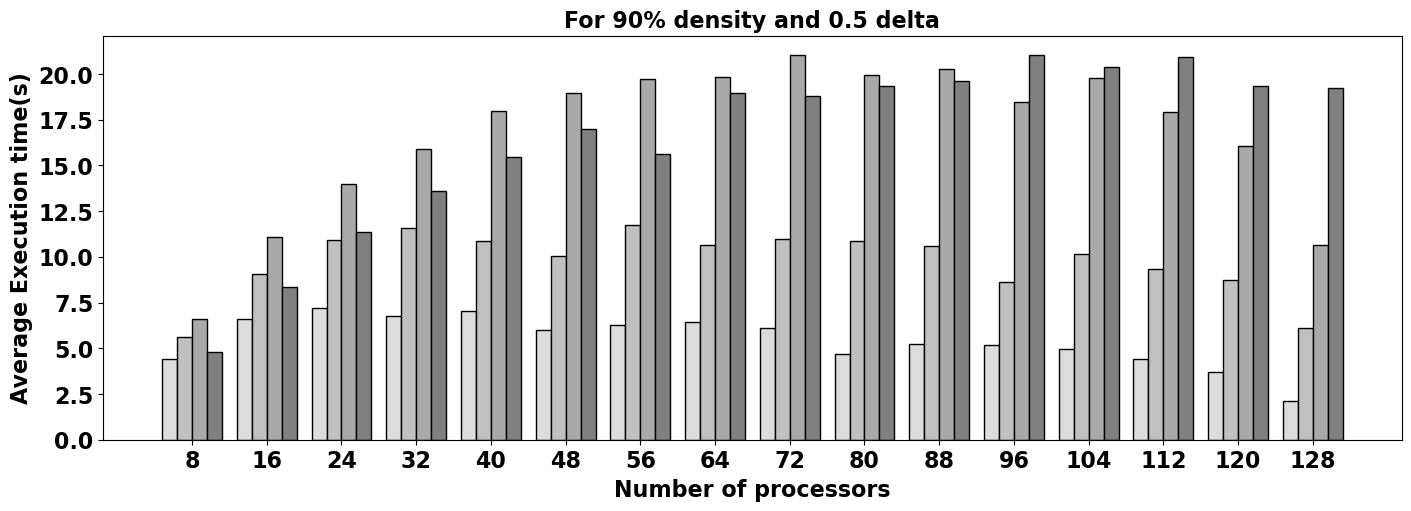

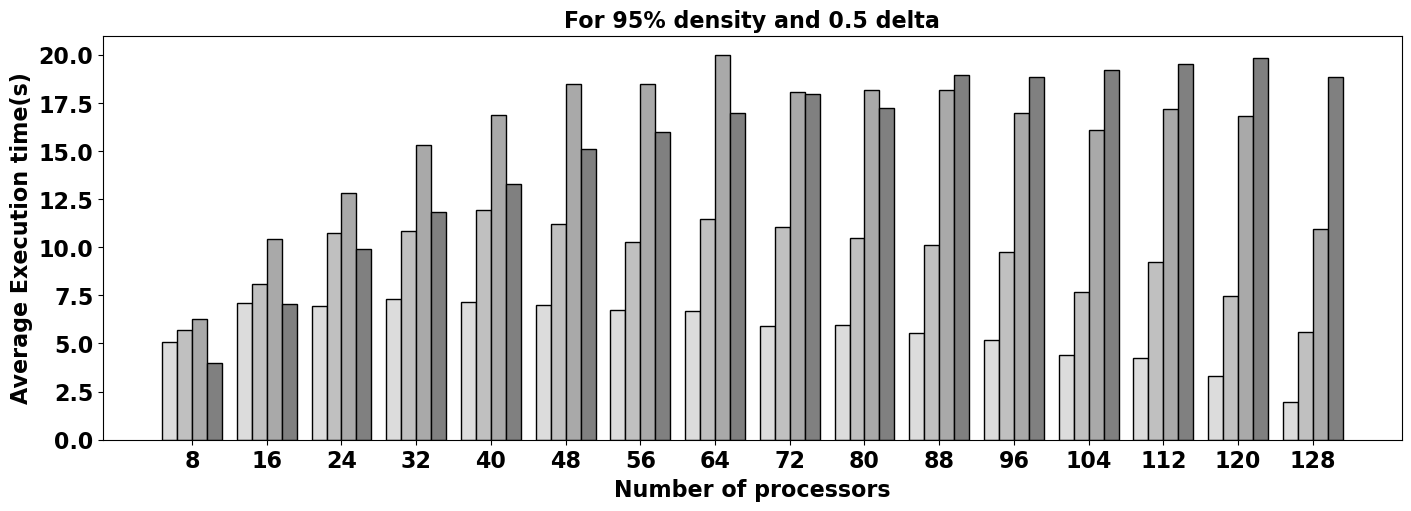

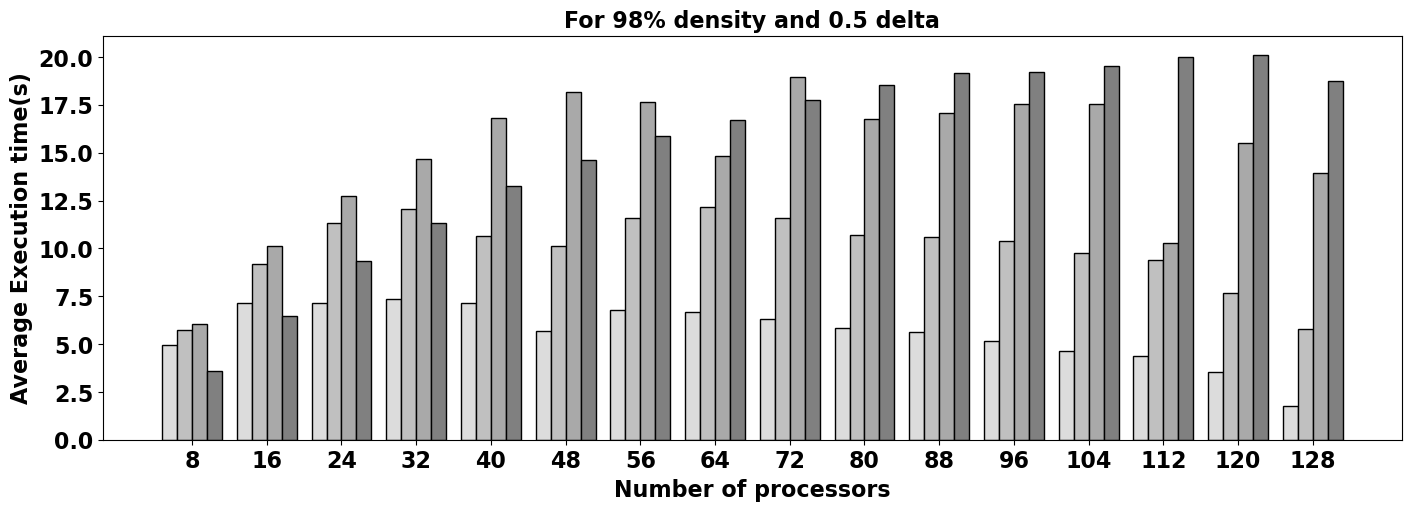

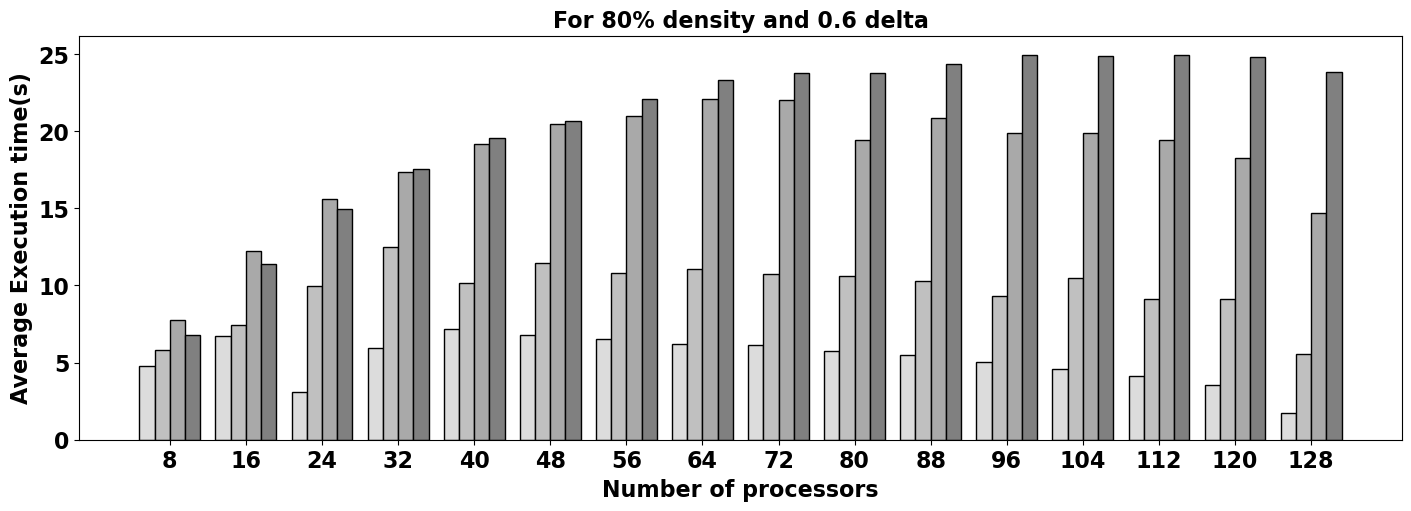

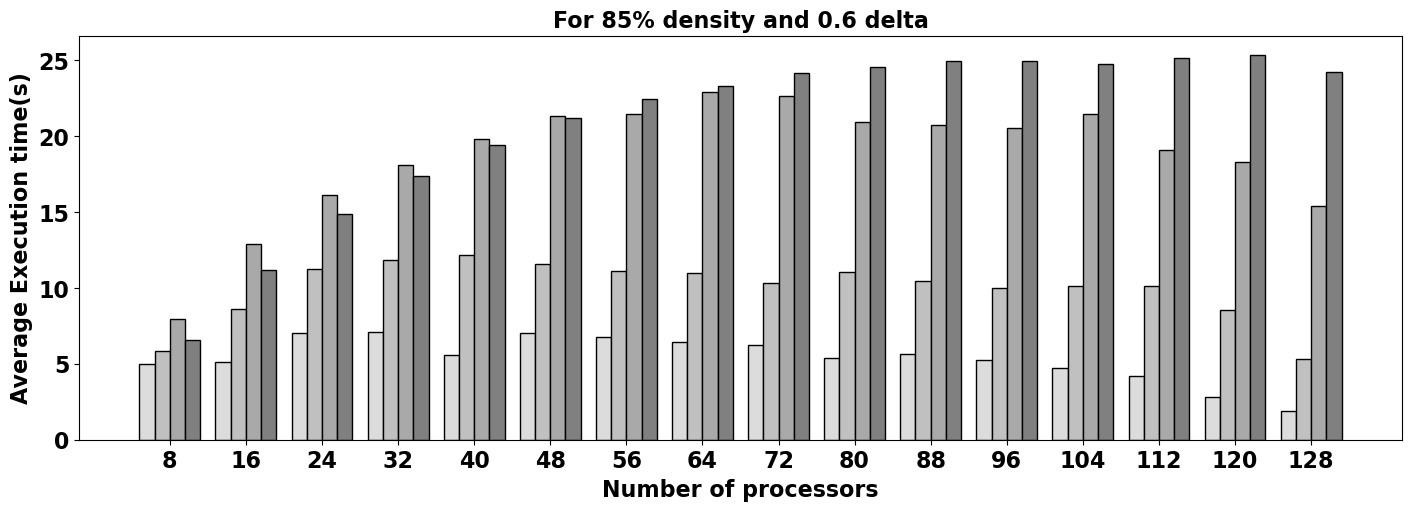

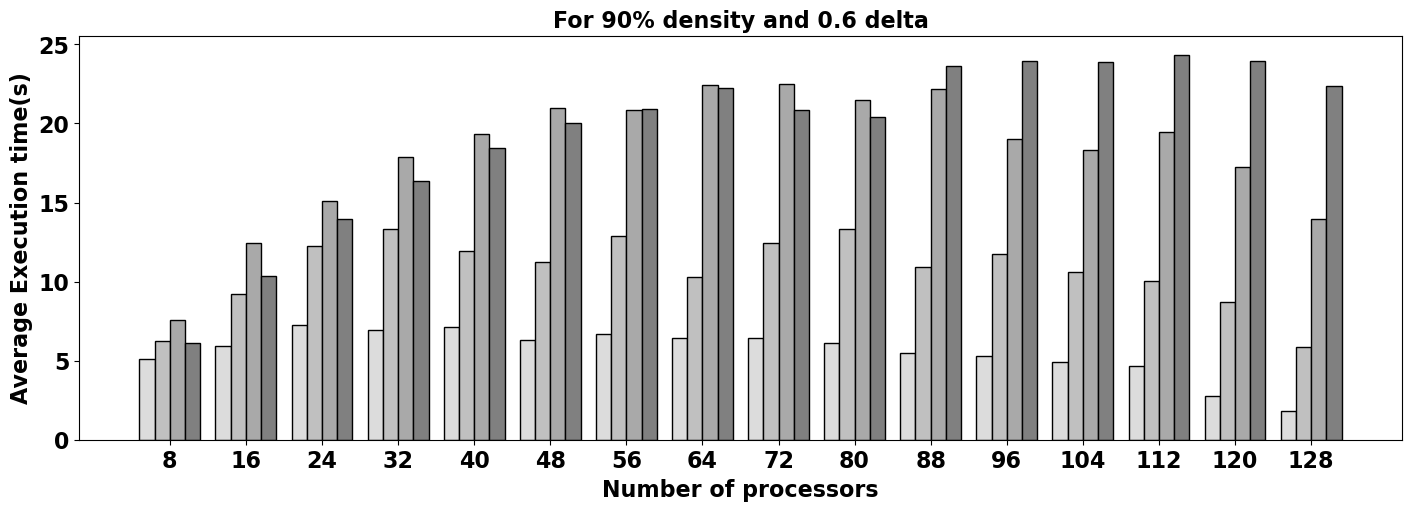

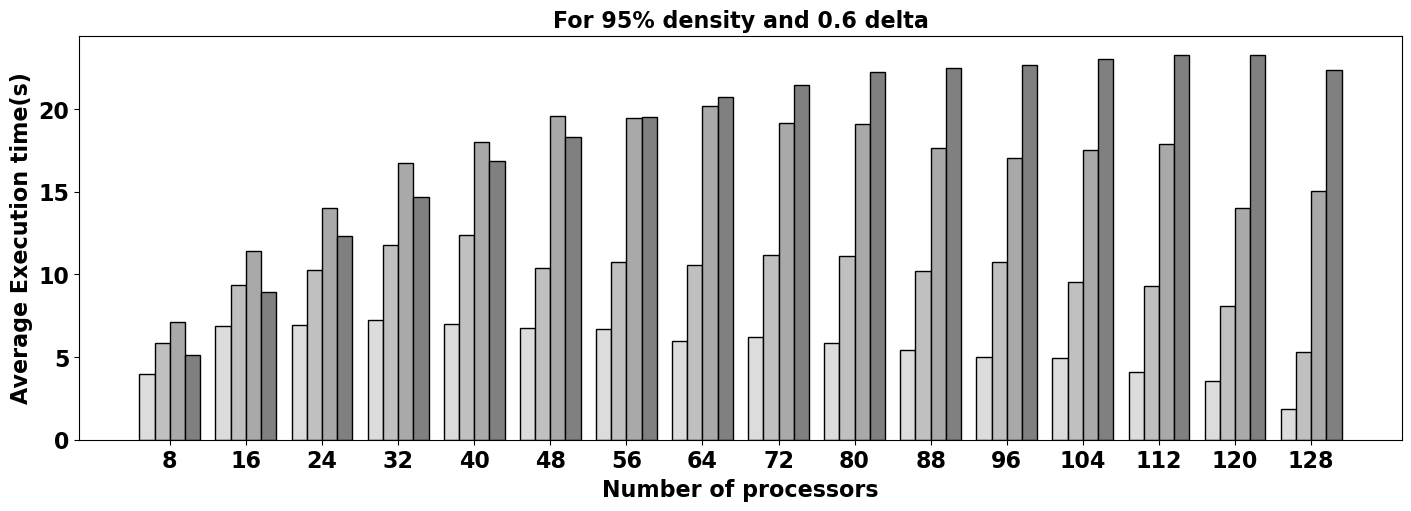

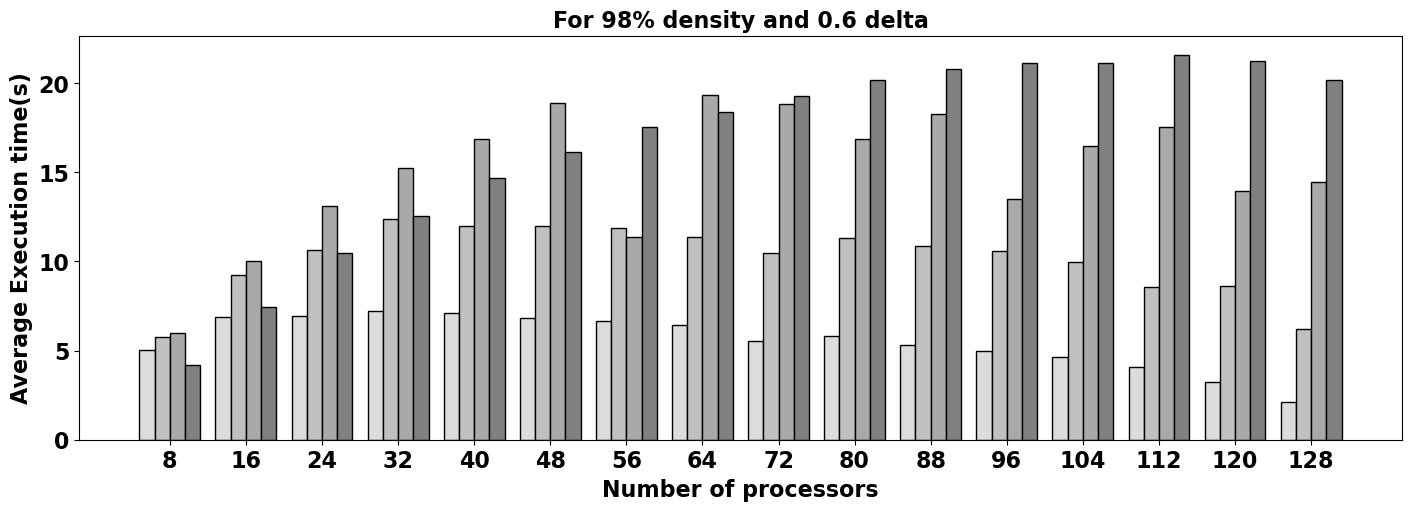

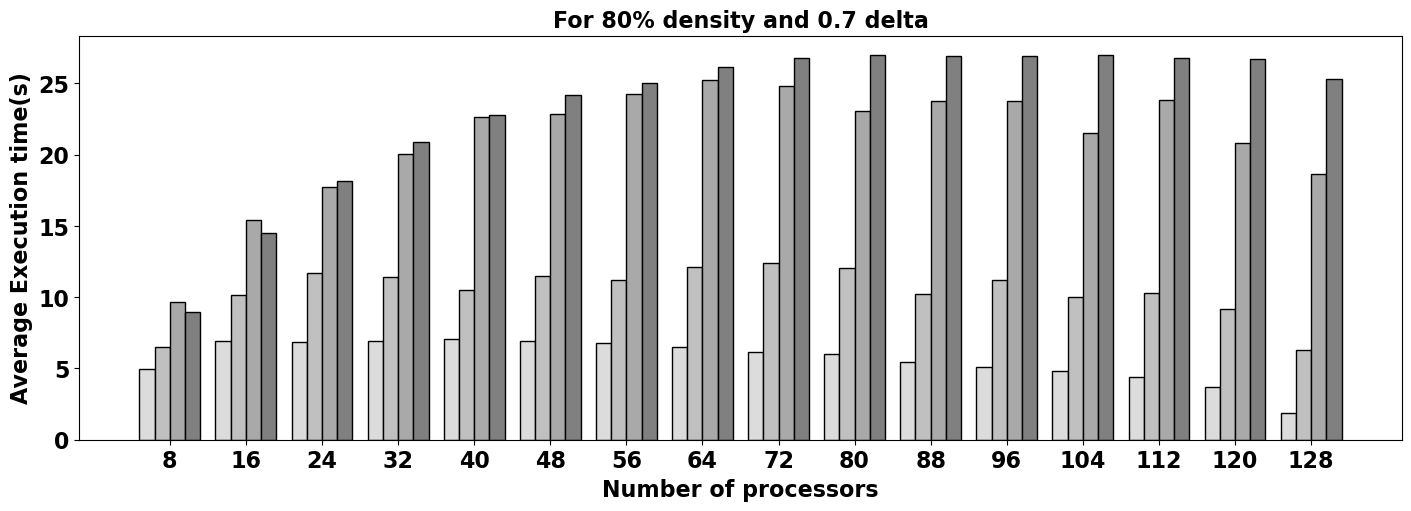

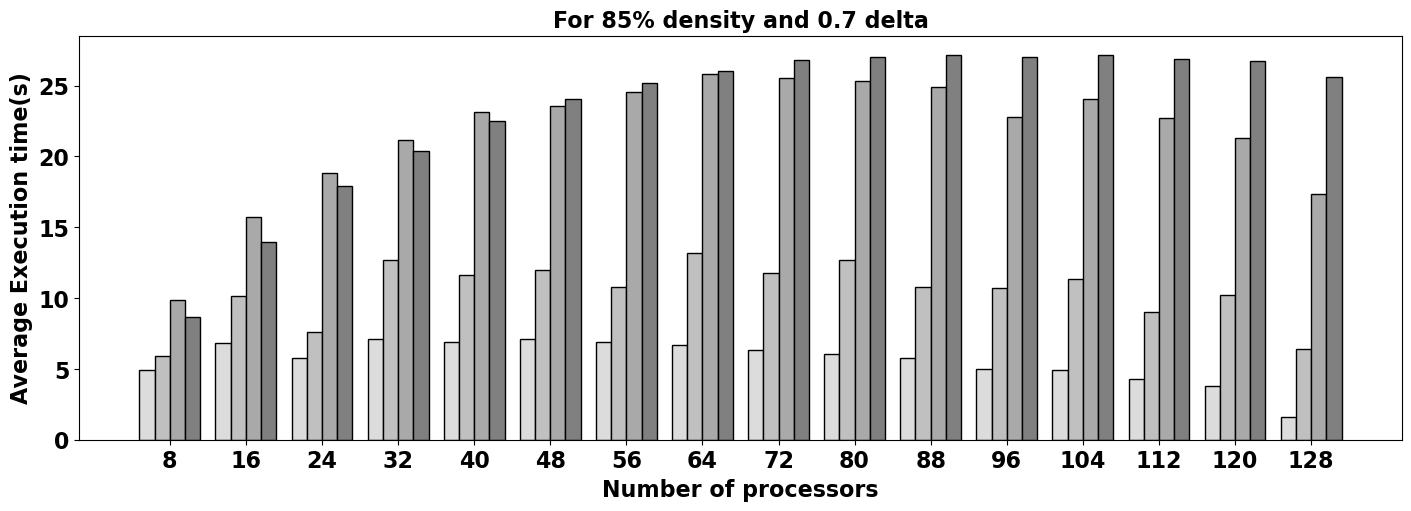

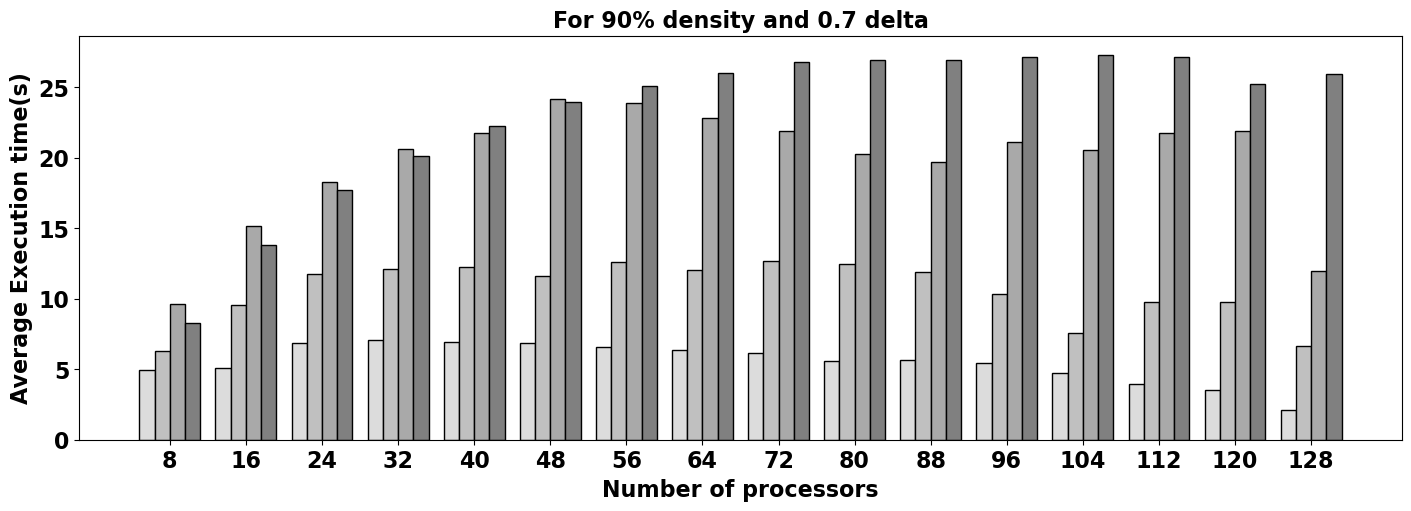

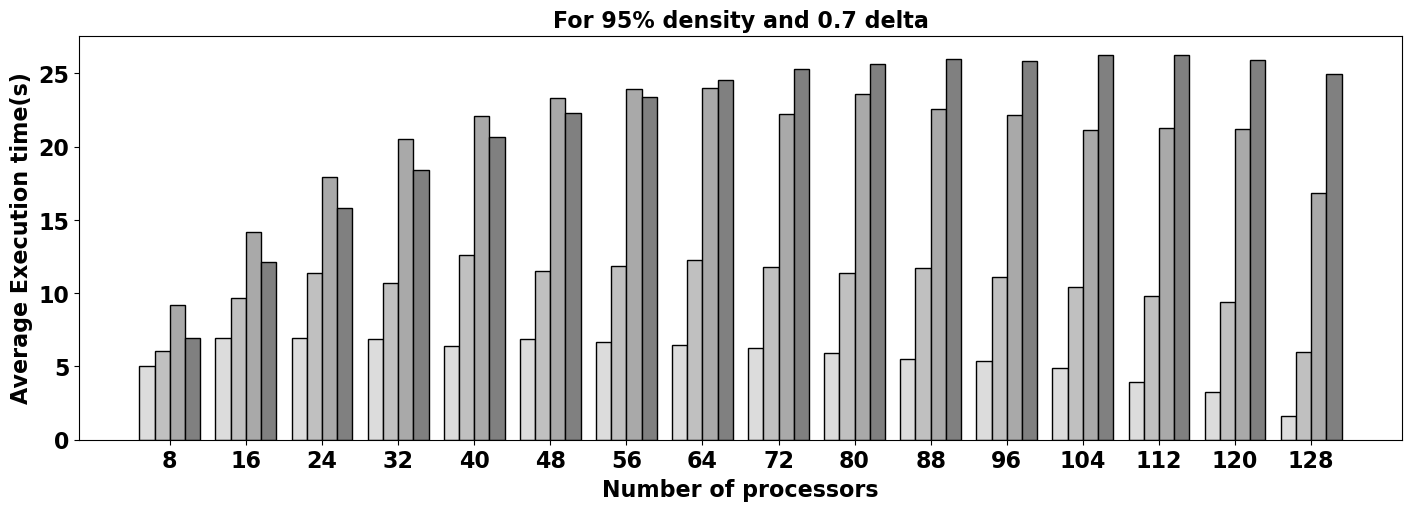

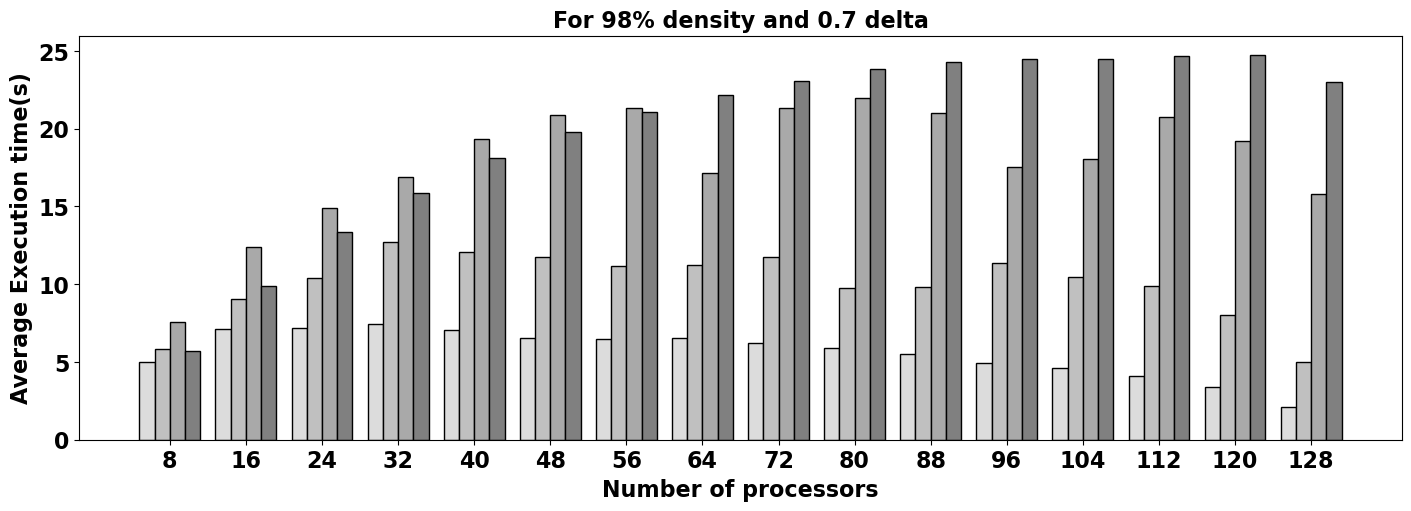

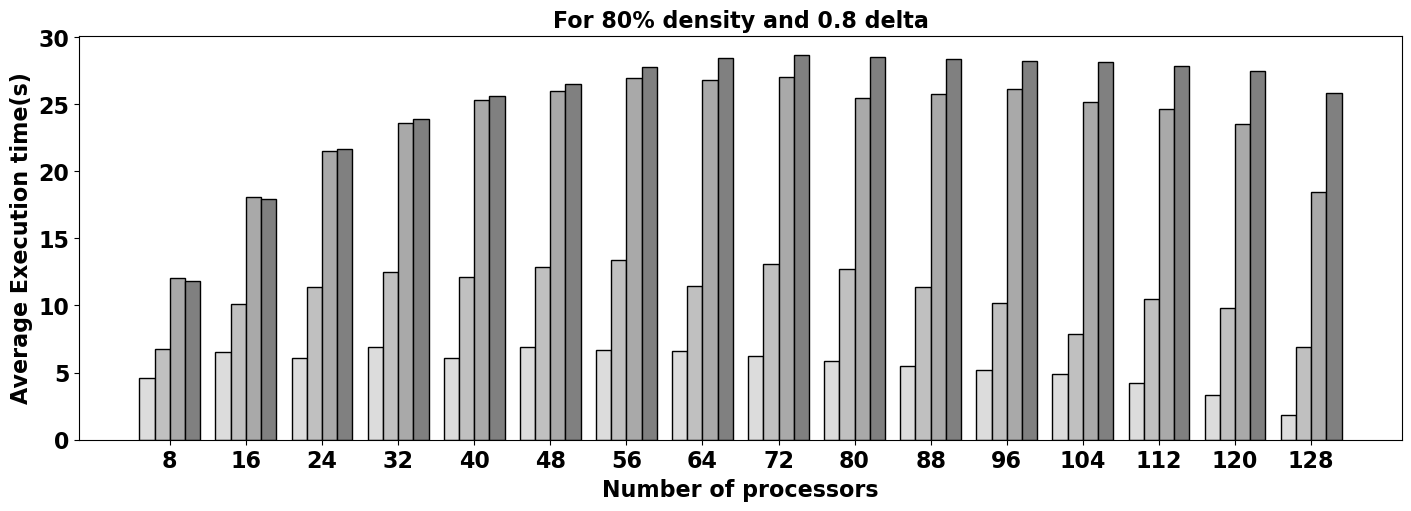

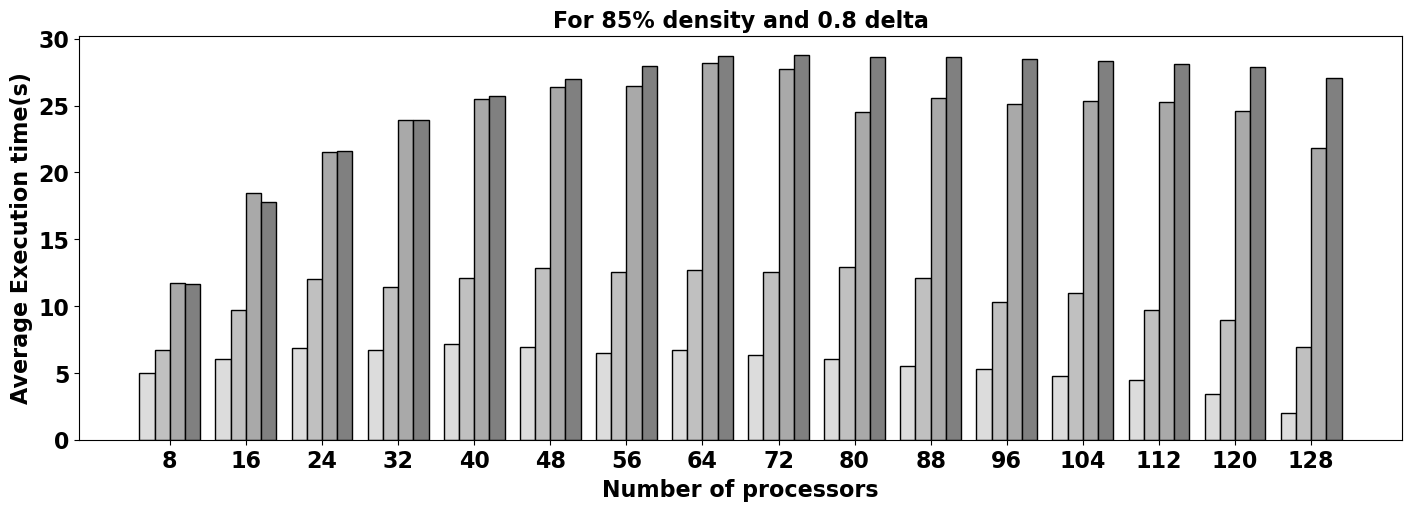

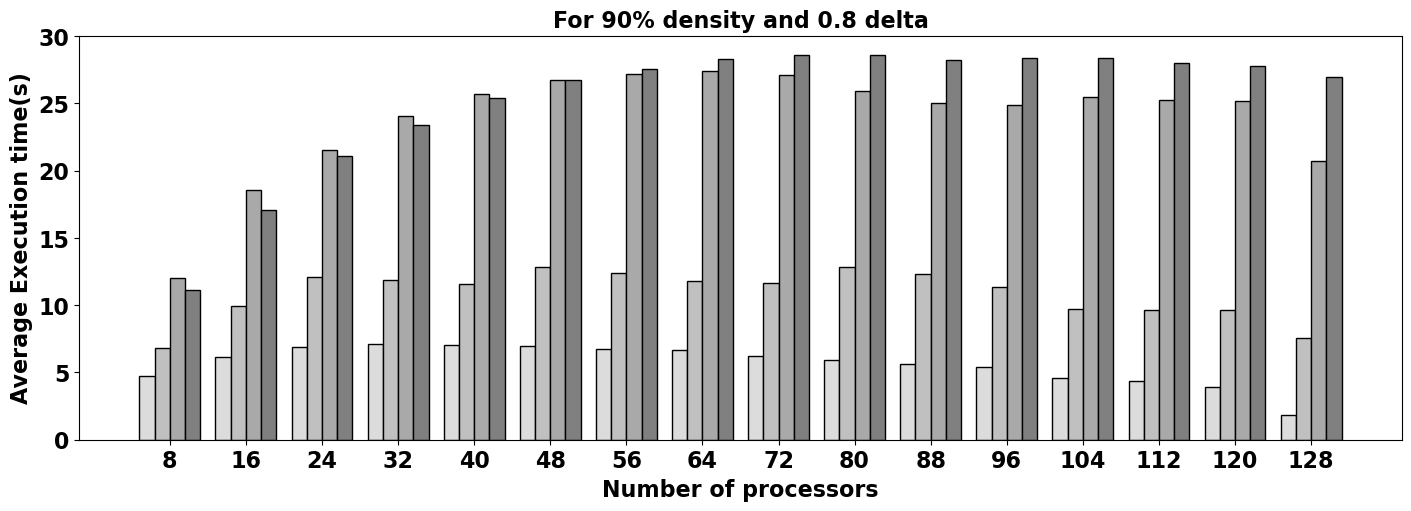

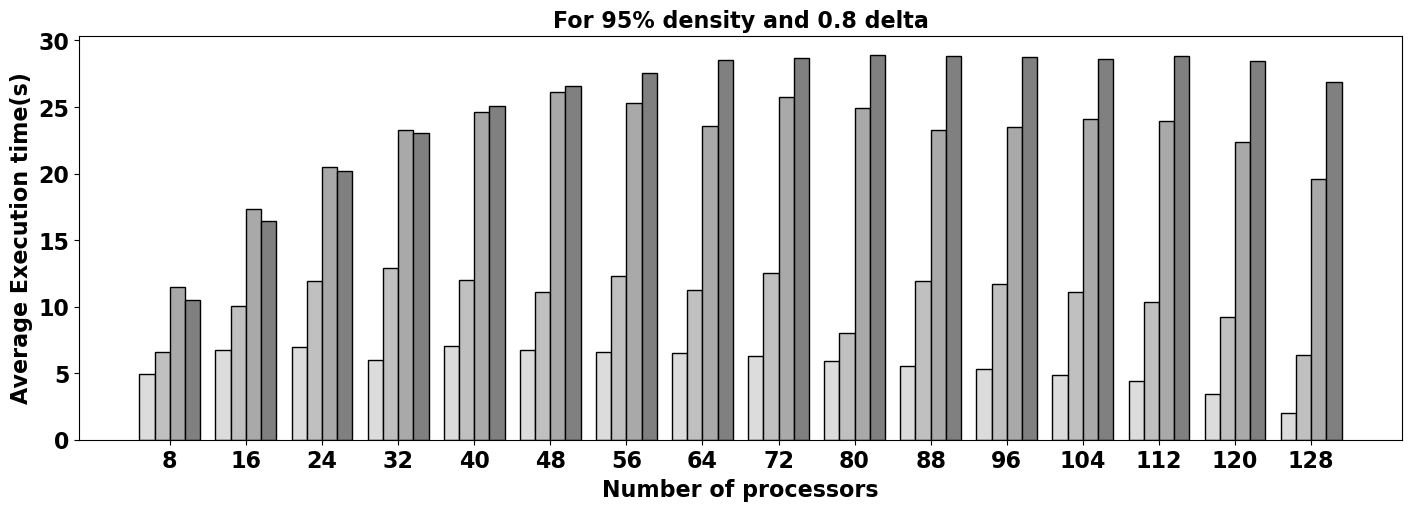

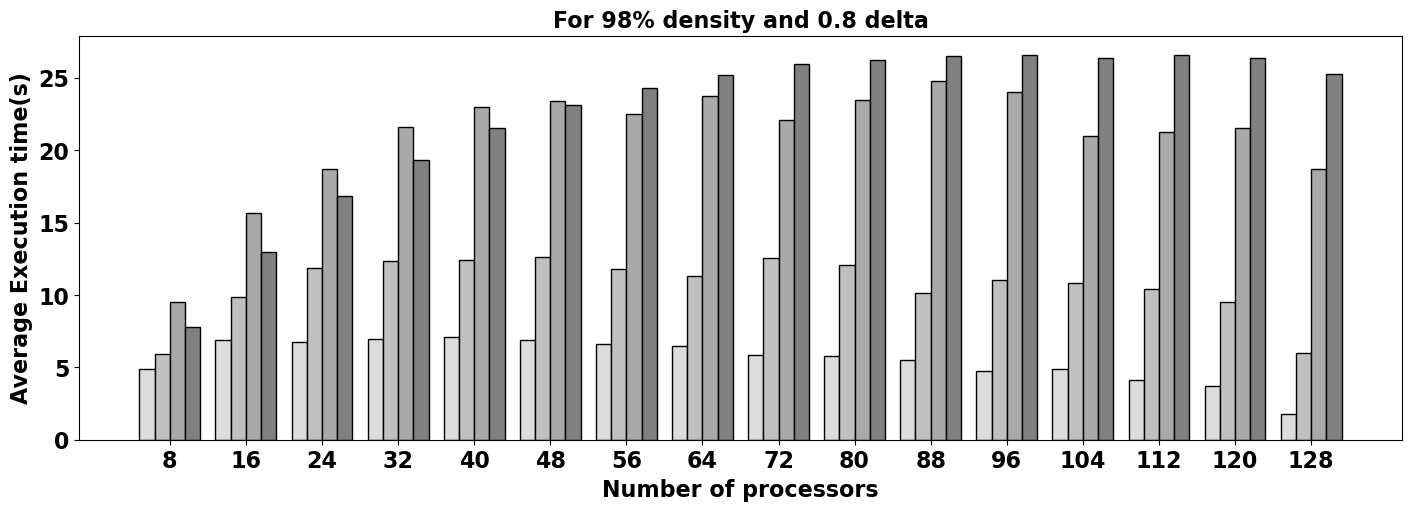

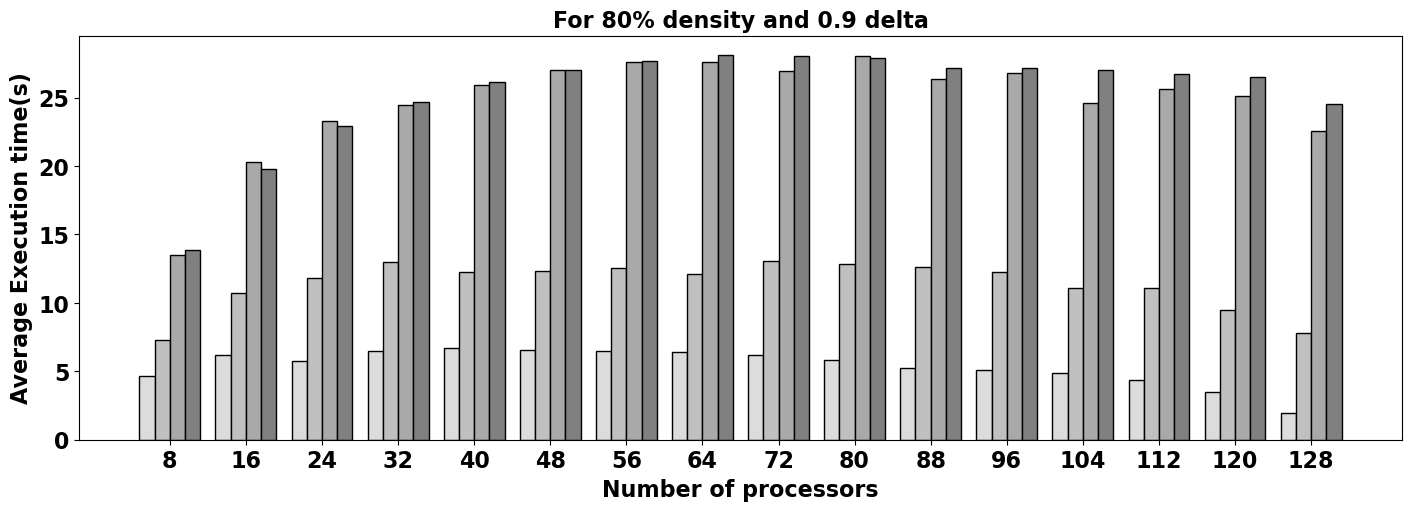

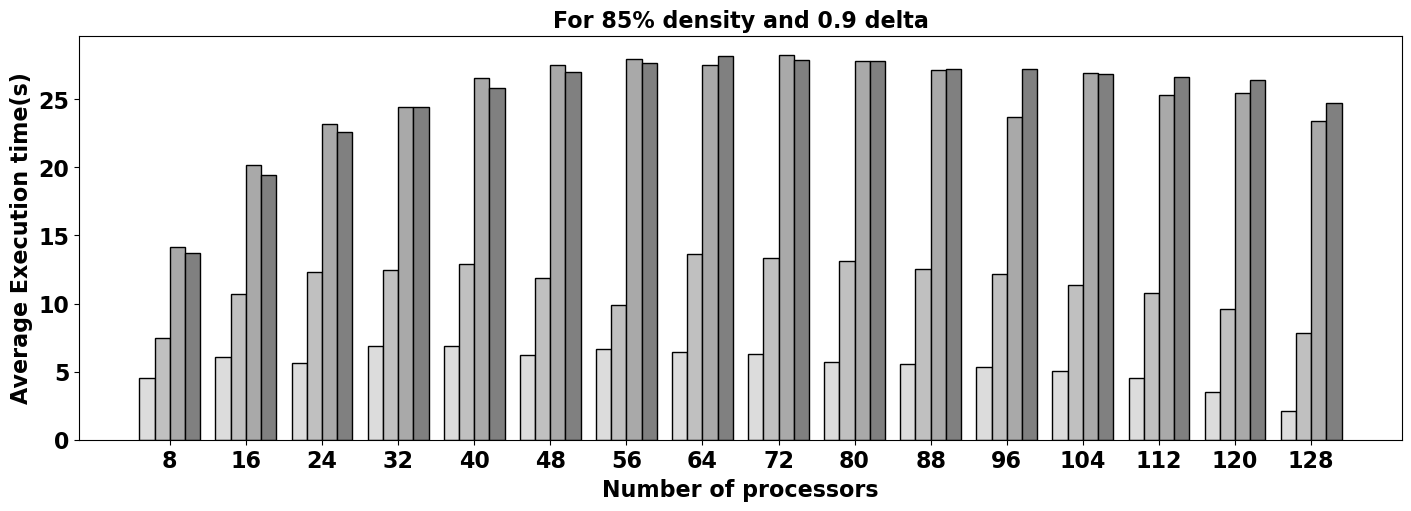

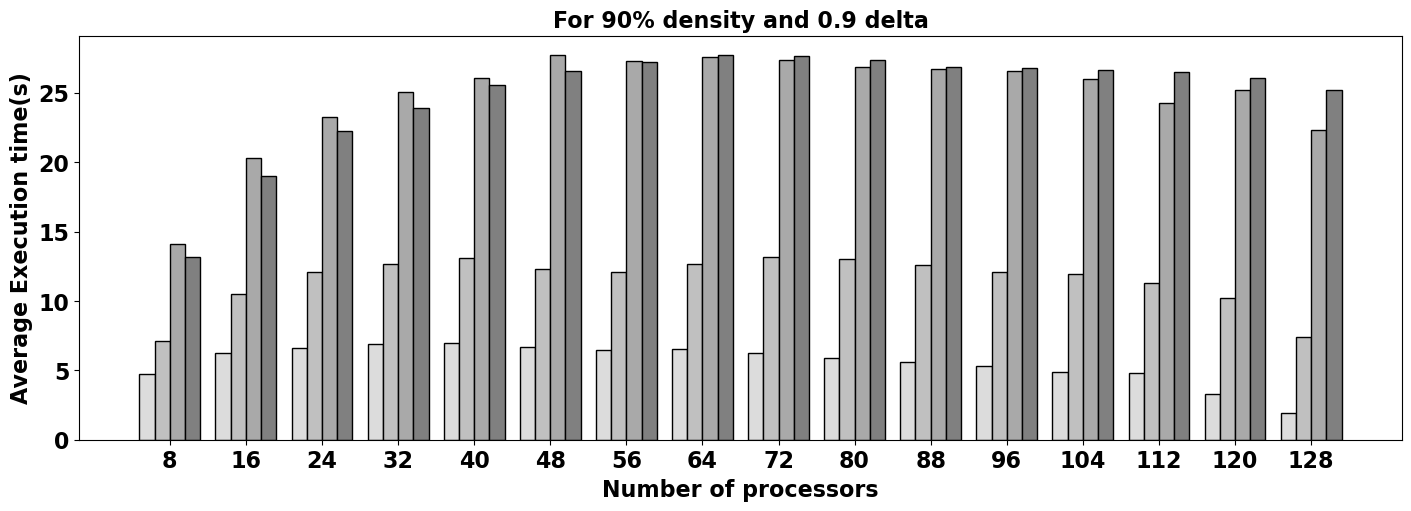

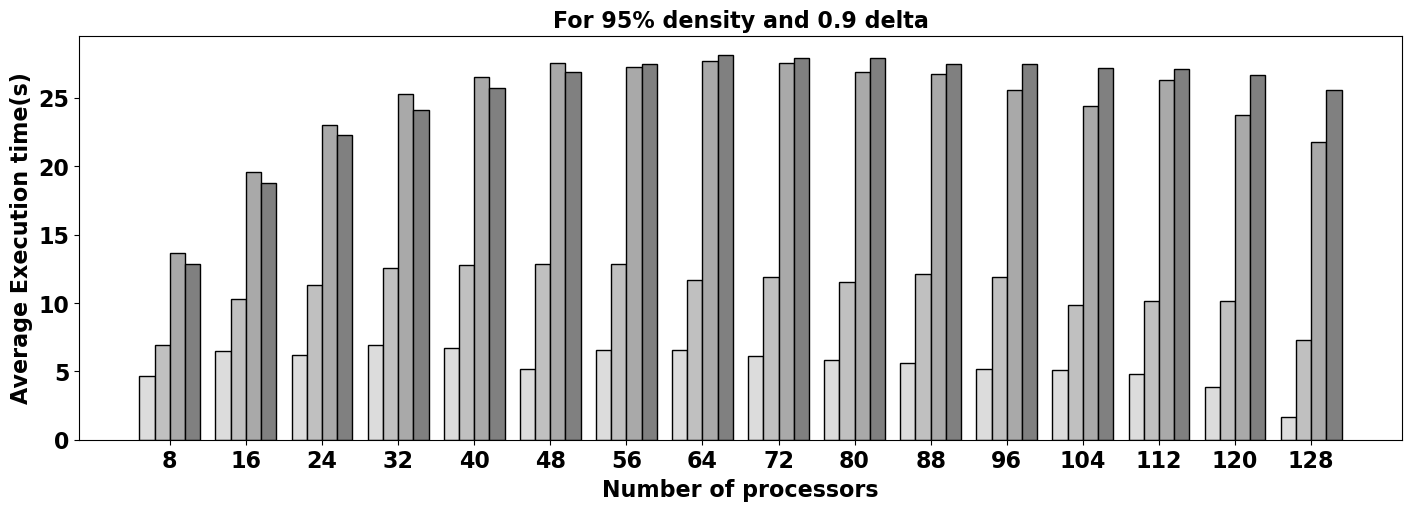

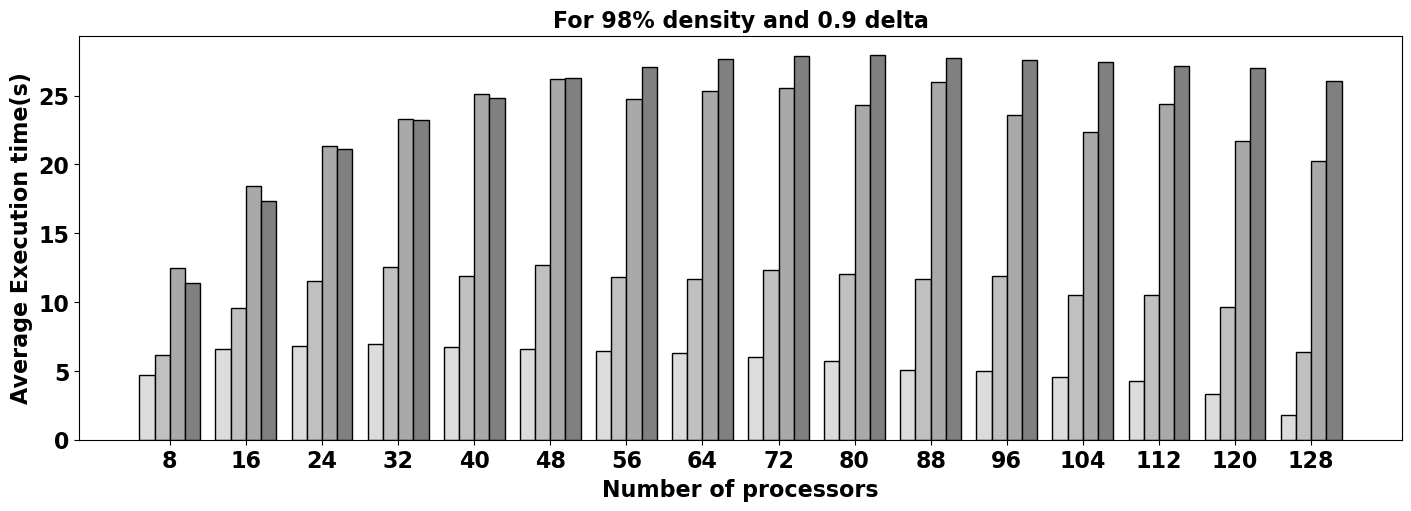

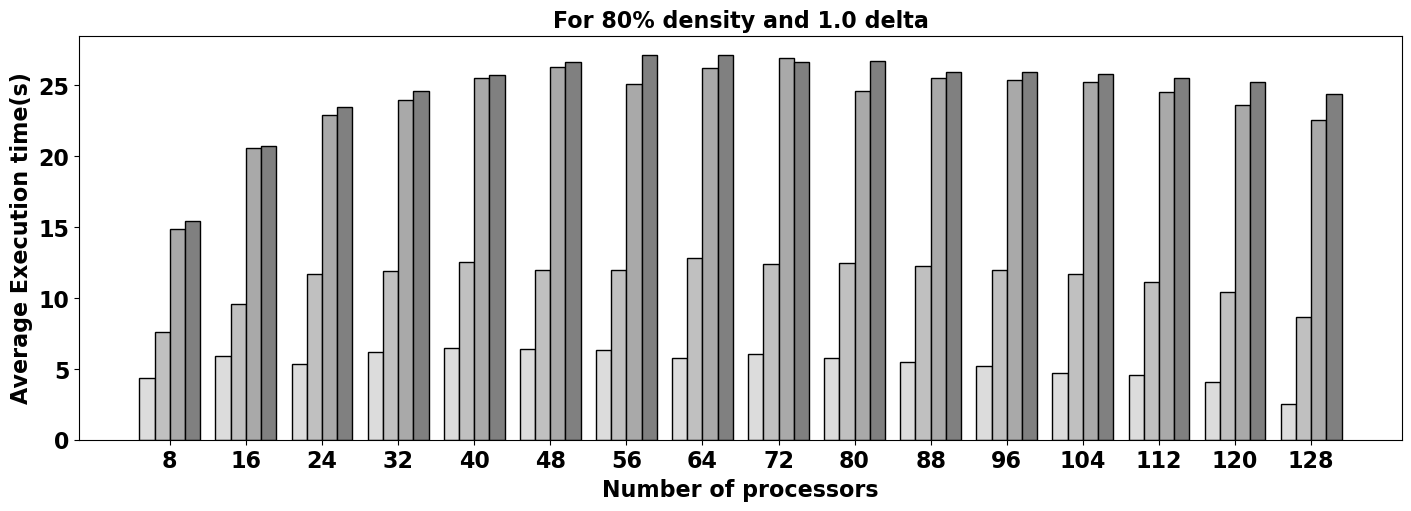

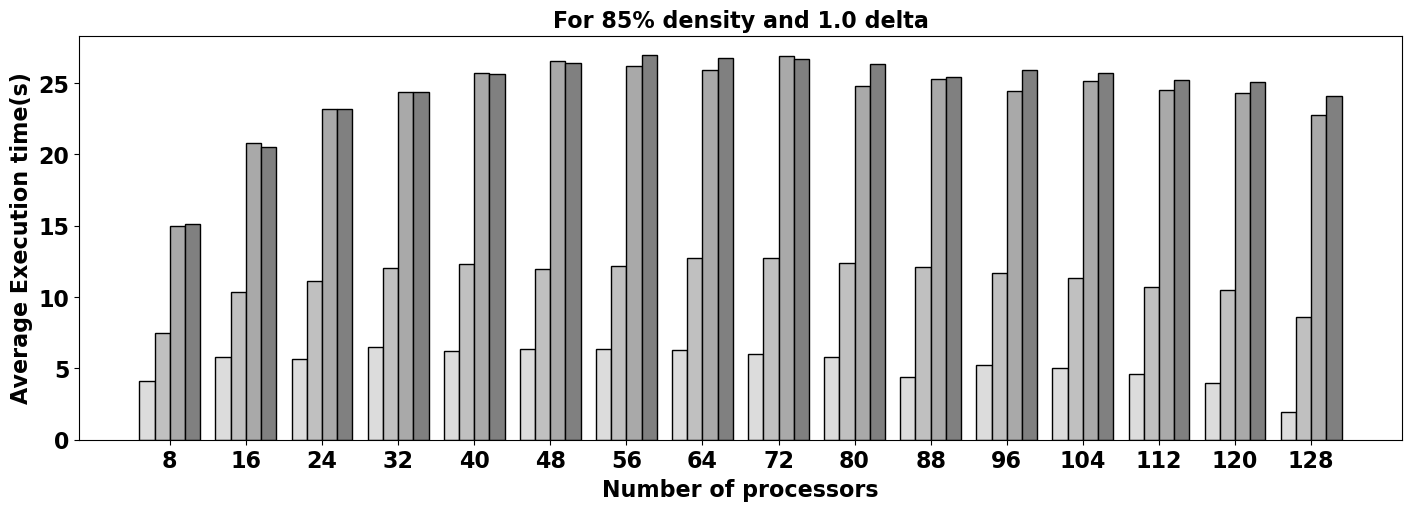

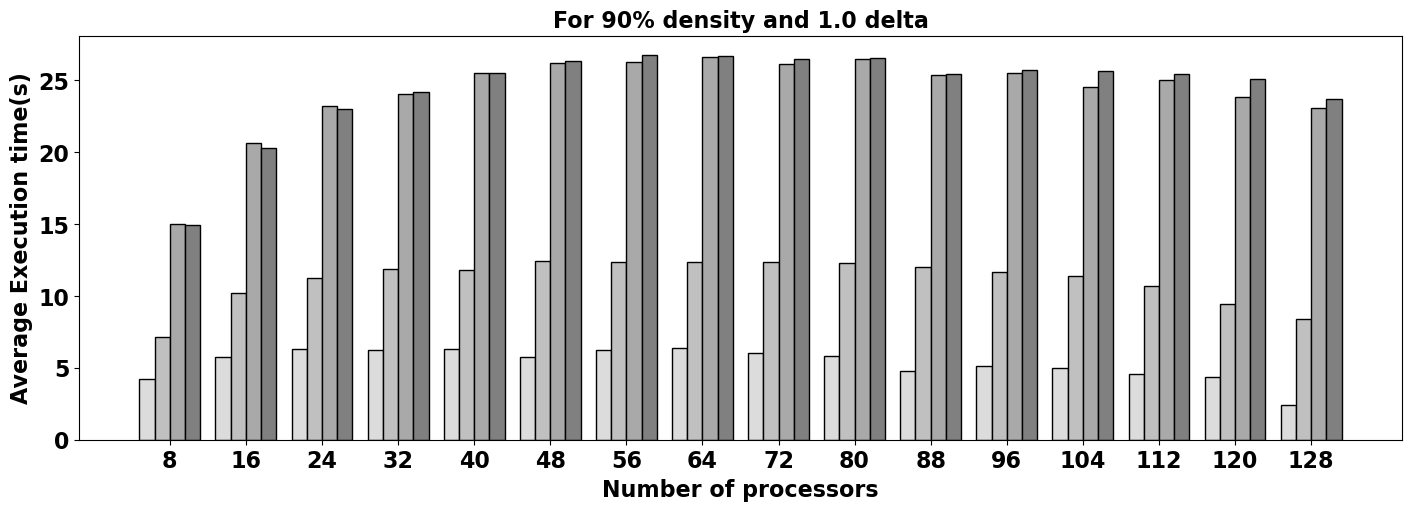

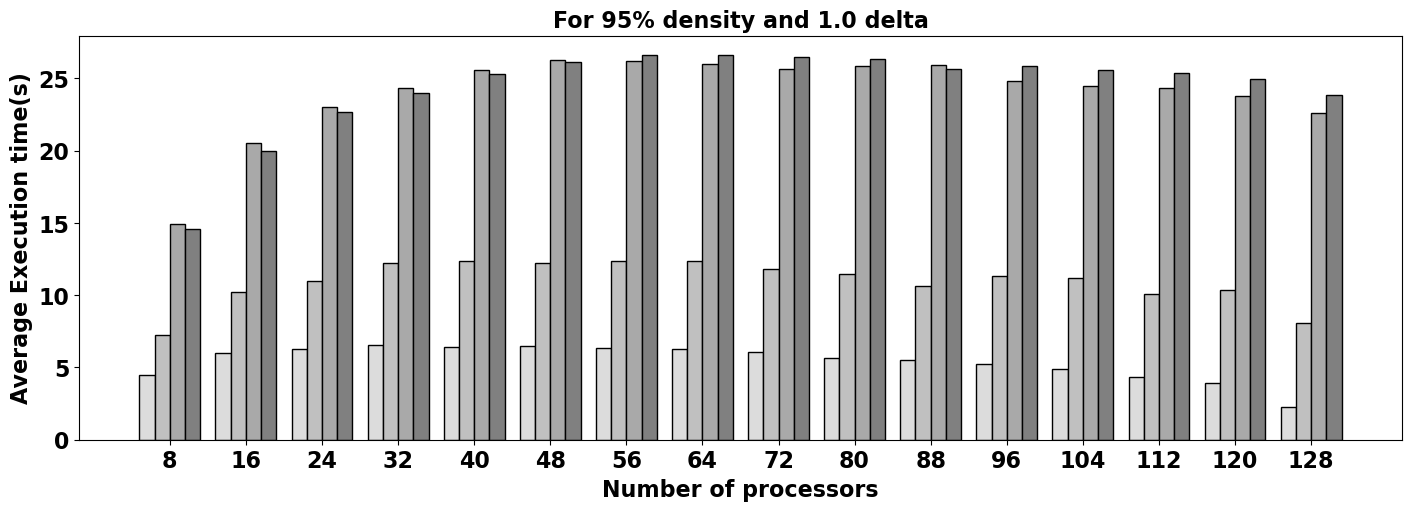

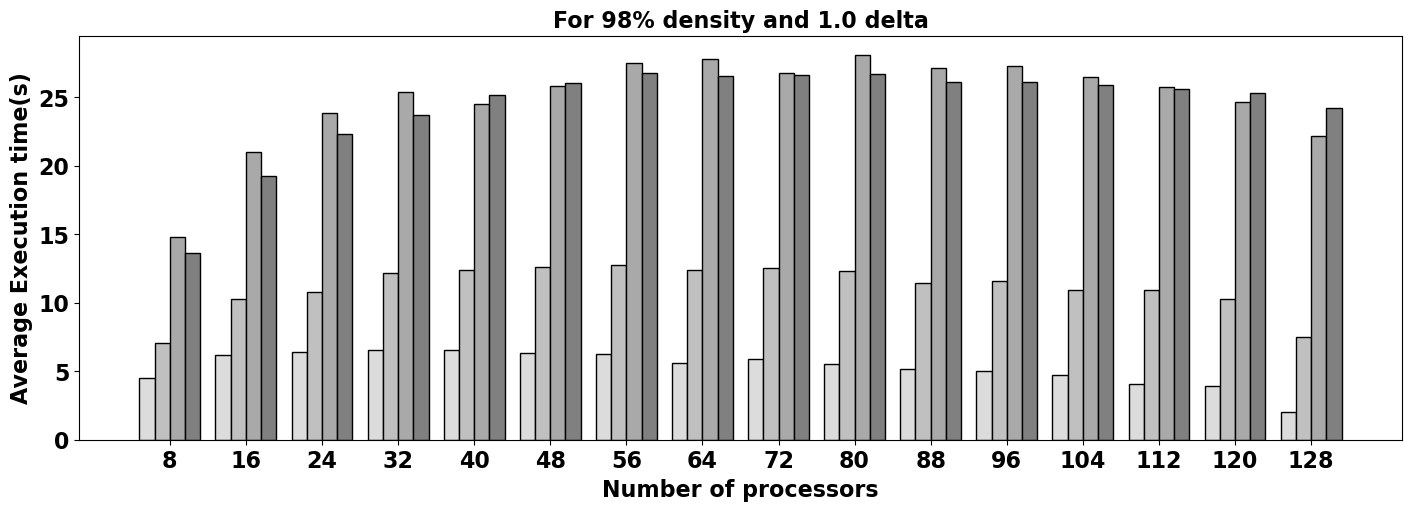

In [59]:
# we want to show that with increasing cores decreses the execution time therefore we plot for fixed density and fixed delta
# x axis is cores and y axis is execution time for 3 different nodes
# seq_avgExeTime[(n,d,e,de)]
e = 1
density2 = density
# density2.remove(100)
for de in delta:
    for d in density2:
        plotData = {}
#         plotStd = {}
        for n in nodes:
            plotData[n] = []   
#             plotStd[n] = []
            for c in cores:
                plotData[n].append(np.mean(seq_avgExeTime[(n,d,e,de)])/np.mean(avgExeTime[(n,d,e,c,de)]))
#                 plotStd[n].append(statistics.stdev(avgExeTime[(n,d,e,c,de)]))

        bar_width = 0.2  # Width of each bar
        x = np.arange(len(cores))  # X-axis values
        f, axes = plt.subplots(constrained_layout=True, figsize=[14, 5])
        i = 0
        
        for n in nodes:
            power = nodes1[i]
            plt.bar(x + i * bar_width - (0.5 * bar_width), plotData[n], width=bar_width, label= f"{power}", color = color[i], edgecolor = 'k')
            i = i + 1

        fc = 11
        # Adding labels, title, and legend
        plt.xlabel('Number of processors', fontsize=16, weight = 'bold')
        plt.ylabel('Average Execution time(s)', fontsize=16, weight = 'bold')
        plt.title(f'For {d}% density and {de} delta', fontsize=16, weight = 'bold')
        plt.xticks(x + bar_width, cores, fontsize=16, weight = 'bold')
        plt.yticks(fontsize=16, weight = 'bold')
#         plt.legend(ncol = 6, fontsize=16, loc = 'upper center', bbox_to_anchor = (0.5, 1.15))
#         plt.ylim(0, 60)
#         plt.savefig(f'plots/speedup_vs_cores_density_{d}_delta_{de}.pdf', dpi=300)
        plt.show()

In [57]:
n = 16384
d = 80
e = 1
c = 8
de = 0.5

print("seq:", np.mean(seq_avgExeTime[(n,d,e,de)]), "par:", np.mean(avgExeTime[(n,d,e,c,de)]), "speedup:", np.mean(seq_avgExeTime[(n,d,e,de)])/np.mean(avgExeTime[(n,d,e,c,de)]))

seq: 4.634902857142857 par: 15.77485 speedup: 0.29381597017675964
